# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: **10.5**

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla Q(w) = \dfrac{1}{\ell} 2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

np.random.seed(13)

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/76777399/ 


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/76777895/ 


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/76777965/ 


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/76778025/ 


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/76777017/ 

Ник: **vladislav.rubanoff**

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

In [9]:
data.shape, data.isnull().any().any()  # no NaN

((241190, 10), False)

In [10]:
# check
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [11]:
# объяснение того, почему kilometer отнесен в категориальные признаки, будет ниже
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []

In [12]:
# bias добавится позднее, поскольку ниже я добавлю несколько новых признаков
#
# data['bias'] = 1
# other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [13]:
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, train_size=0.5, random_state=13)

In [14]:
X_train.shape, X_val.shape, X_test.shape

((192952, 9), (24119, 9), (24119, 9))

*Посмотрим на расрпеделение таргета и сарвним его с логарифмированным видом:*

In [15]:
y_train_log = np.log1p(y_train)

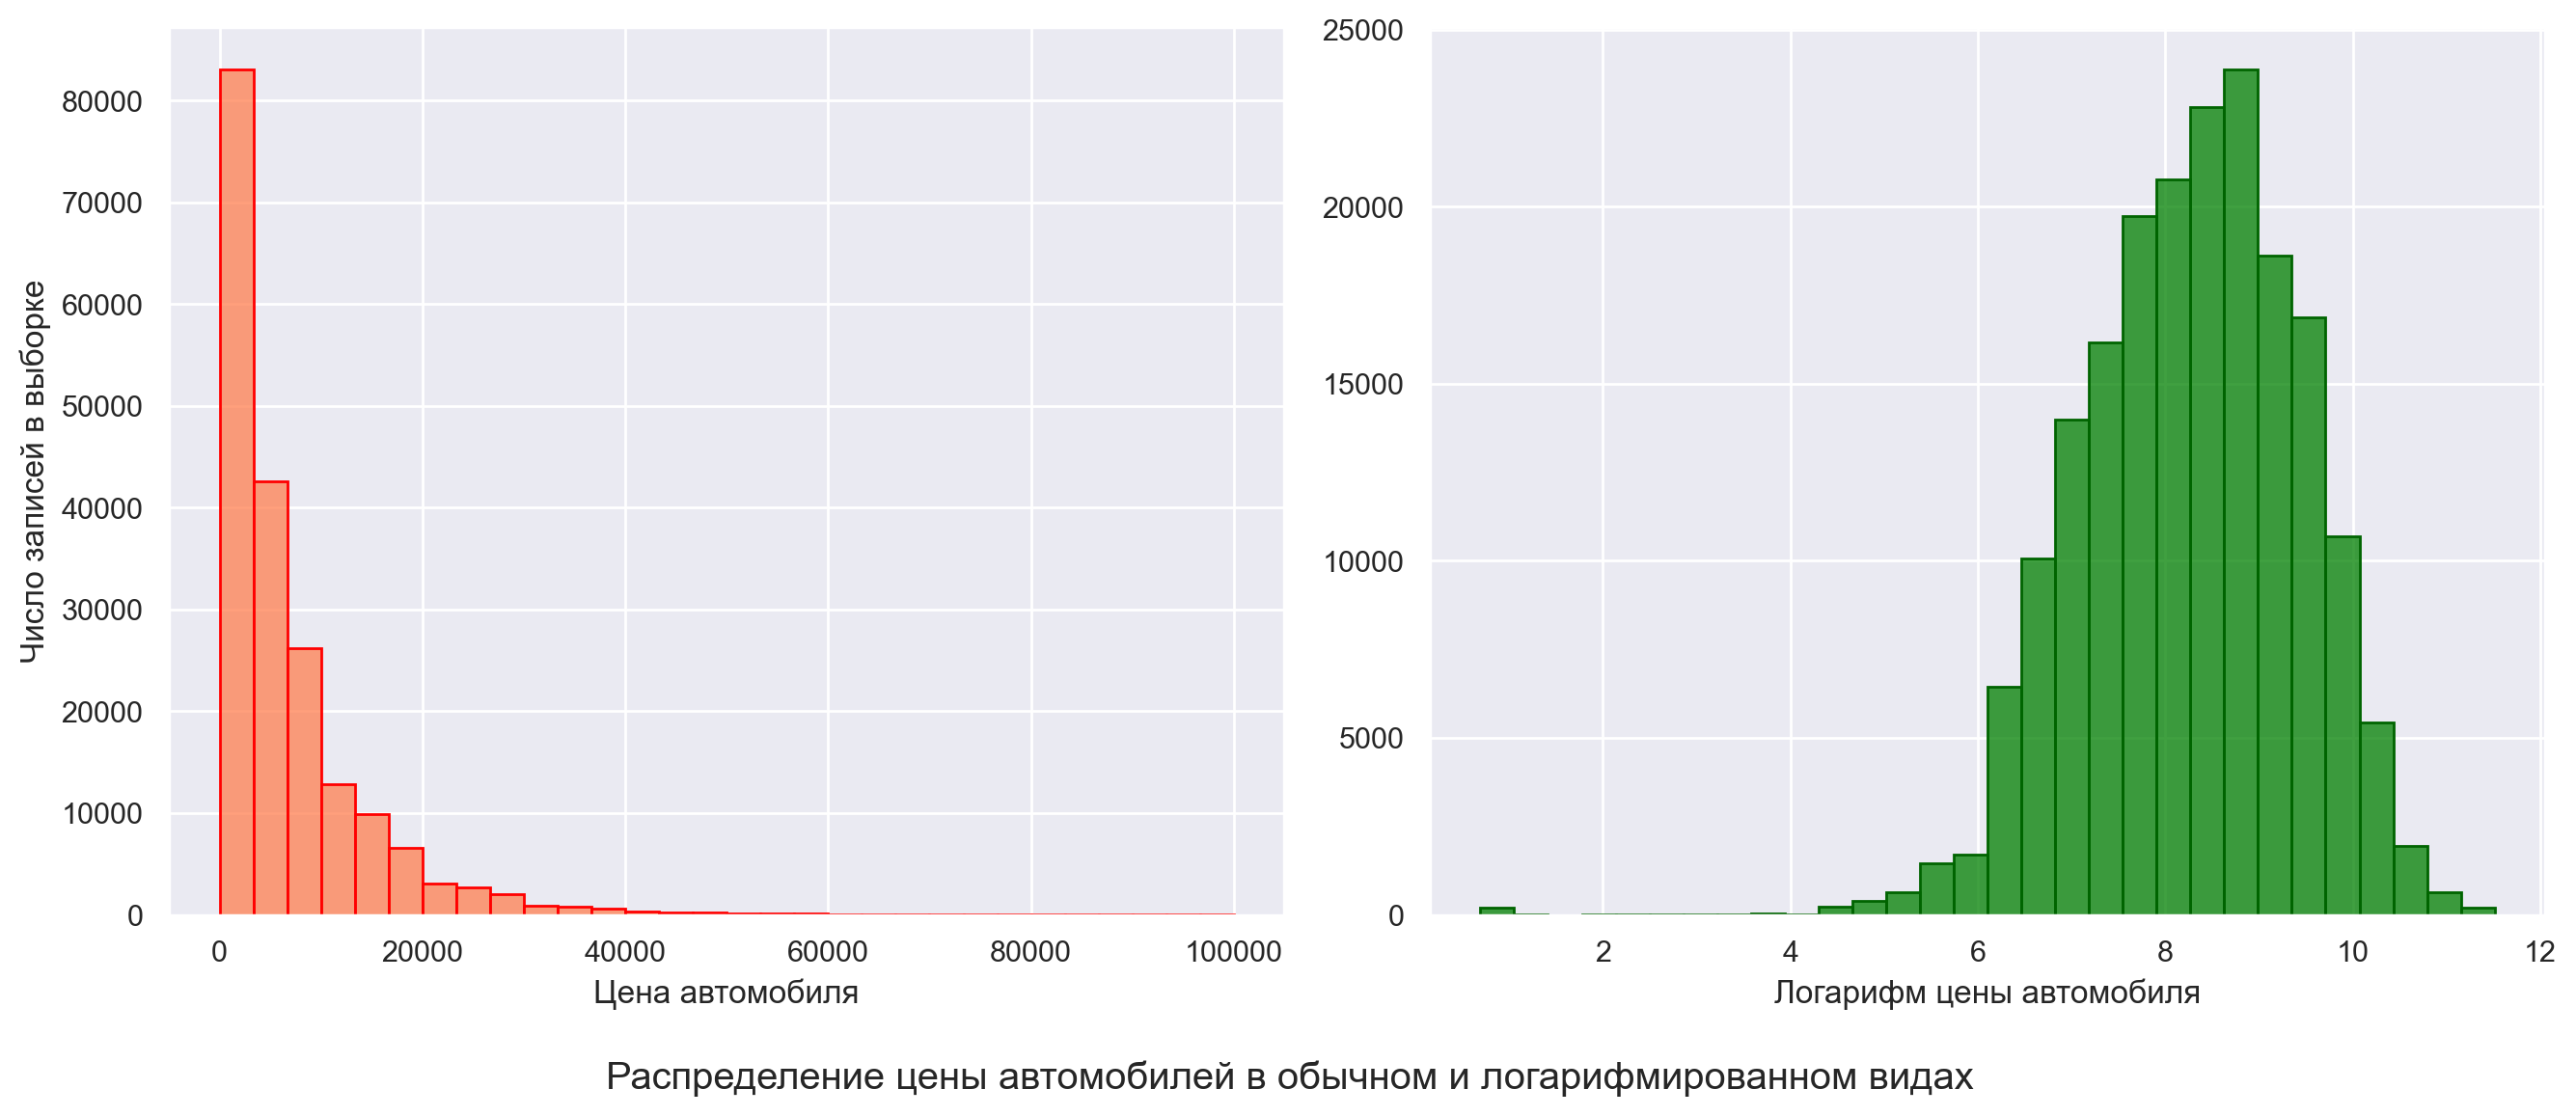

In [16]:
# идея для кода: https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn

fig, axs = plt.subplots(ncols=2, figsize=(15, 6.5))

sns.histplot(y_train,
             bins=30,
             ax=axs[0], 
             color='coral',
             edgecolor='red')
axs[0].set_ylabel('Число записей в выборке')
axs[0].set_xlabel('Цена автомобиля')

sns.histplot(y_train_log,
             bins=30,
             ax=axs[1], 
             color='green',
             edgecolor='darkgreen')
axs[1].set_ylabel('')
# axs[1].set_yticklabels('')
axs[1].set_xlabel('Логарифм цены автомобиля')

fig.suptitle('Распределение цены автомобилей в обычном и логарифмированном видах', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

Распределение слева (изначальное) явно кажется более неудачным, в то время как распределение справа (логарифмированное) близко к нормальному. Предлагаю **логарифмировать таргет**.

Однако можно заметить объекты с аномально высокой и маленькой ценами: проверим их.

In [370]:
# статистическая граница выбросов

q_005 = np.quantile(y_train_log, q=0.005)
q_995 = np.quantile(y_train_log, q=0.995)
q_25 = np.quantile(y_train_log, q=0.25)
q_75 = np.quantile(y_train_log, q=0.75)

delta = q_75 - q_25
b_u = q_75 + delta*1.5
b_d = q_25 - delta*1.5

print(f'Статистический интервал типичных значений: [{round(b_d, 3)}; {round(b_u, 3)}]')
print(f'Квантиль уровня 0.005: {round(q_005, 3)}')
print(f'Квантиль уровня 0.995: {round(q_995, 3)}')

Статистический интервал типичных значений: [5.012; 11.561]
Квантиль уровня 0.005: 5.17
Квантиль уровня 0.995: 10.749


*Теперь посмотрим на дорогие и дешевые машины. Временно добавим в обучающую выборку значение целевой переменной для удобства представления информации.*

In [17]:
X_train['price'] = y_train
X_train['log_price'] = y_train_log

In [372]:
X_train.loc[y_train_log < 5]

brand     model vehicleType    gearbox fuelType  \
181545     volkswagen      golf  kleinwagen    manuell   benzin   
130488     volkswagen      golf  kleinwagen    manuell   benzin   
73494         renault    scenic         bus    manuell   diesel   
58849            opel    vectra   limousine    manuell   benzin   
56048           volvo    andere   limousine    manuell   benzin   
...               ...       ...         ...        ...      ...   
63033             bmw       3er       kombi  automatik   diesel   
120404           fiat     punto  kleinwagen    manuell   benzin   
7655    mercedes_benz  e_klasse   limousine  automatik   benzin   
223366           opel    vectra       kombi    manuell   benzin   
189265           seat     ibiza   limousine    manuell   benzin   

       notRepairedDamage  kilometer  powerPS  autoAgeMonths  price  log_price  
181545                ja     150000       60            225    100   4.615121  
130488                ja      80000      180            208      1   0.693147  
73494               nein     150000       82            132      1   0.693147  
58849                 ja       5000      101            232      1   0.693147  
56048               nein     150000      140            220      1   0.693147  
...                  ...        ...      ...            ...    ...        ...  
63033               nein     150000      200            103      1   0.693147  
120404                ja     150000       60            224    120   4.795791  
7655                  ja     150000      279            229      1   0.693147  
223366                ja     150000      170            223      1   0.693147  
189265                ja     150000       60            229    100   4.615121  

[631 rows x 11 columns]

Видим, что здесь много объявлений с ценой 1 (похоже на кликбейт) и с ценами 100, 120 и т.д. Мне кажется, что такие (нереальные) цены были специально выставлены владельцами для привлечения внимания.

Во-первых, посмотрим на объявления, которые стоят больше 1:

In [373]:
X_train.loc[(1 < y_train_log) & (y_train_log < 5)]

brand    model vehicleType    gearbox fuelType notRepairedDamage  \
181545  volkswagen     golf  kleinwagen    manuell   benzin                ja   
53161   mitsubishi     colt  kleinwagen    manuell   benzin              nein   
212833        ford   fiesta  kleinwagen    manuell   benzin              nein   
197910     citroen   andere  kleinwagen  automatik   diesel              nein   
154456        seat    ibiza  kleinwagen    manuell   benzin                ja   
...            ...      ...         ...        ...      ...               ...   
183201     renault   twingo  kleinwagen    manuell   benzin                ja   
4423          seat  cordoba   limousine    manuell   benzin                ja   
163692        opel    corsa  kleinwagen    manuell   benzin              nein   
120404        fiat    punto  kleinwagen    manuell   benzin                ja   
189265        seat    ibiza   limousine    manuell   benzin                ja   

        kilometer  powerPS  autoAgeMonths  price  log_price  
181545     150000       60            225    100   4.615121  
53161      150000       75            232     99   4.605170  
212833     150000       55            239     40   3.713572  
197910     150000       99            290     50   3.931826  
154456     150000       75            193      5   1.791759  
...           ...      ...            ...    ...        ...  
183201     150000       58            232    120   4.795791  
4423       150000       75            304    100   4.615121  
163692     150000       60            229    100   4.615121  
120404     150000       60            224    120   4.795791  
189265     150000       60            229    100   4.615121  

[415 rows x 11 columns]

Во-вторых, посмотрим на среднюю стоимость некоторых машин с аномальной ценой: например, Volkswagen Golf и Opel Corsa с похожими характеристиками:

In [374]:
X_train.loc[(X_train['model'] == 'golf') & (X_train['vehicleType'] == 'kleinwagen') & (X_train['gearbox'] == 'manuell') \
    & (X_train['autoAgeMonths'] > 150) & (X_train['notRepairedDamage'] == 'ja')]['price'].mean()

739.8241379310344

In [375]:
X_train.loc[(X_train['model'] == 'corsa') & (X_train['vehicleType'] == 'kleinwagen') & (X_train['gearbox'] == 'manuell') \
    & (X_train['autoAgeMonths'] > 150) & (X_train['notRepairedDamage'] == 'nein')]['price'].mean()

1187.6636753804137

Контролируя все характеристики, видно, что средняя стоимость таких авто сильно отличается от 100*. Предлагаю считать такие случаи выбросами (как и авто со стоимостью, равной 1).

**в описании данных не была дана валюта и порядок цен. Учитывая происхождение данных и распределение цен, я думаю, что цены указаны в евро.*

Далее посмотрим на **дорогие автомобили**:

In [376]:
X_train.loc[y_train_log > 11.3]

brand     model vehicleType    gearbox fuelType  \
4990    mercedes_benz        sl      cabrio  automatik   benzin   
108786           audi    andere      cabrio  automatik   benzin   
43668         porsche       911      cabrio    manuell   benzin   
42456         porsche       911      cabrio  automatik   benzin   
73774         porsche       911       coupe    manuell   benzin   
...               ...       ...         ...        ...      ...   
33715   mercedes_benz    andere      cabrio  automatik   benzin   
219887        porsche       911      cabrio    manuell   benzin   
83934         porsche       911      cabrio  automatik   benzin   
166260        porsche       911      cabrio    manuell   benzin   
33628   mercedes_benz  v_klasse         bus  automatik   diesel   

       notRepairedDamage  kilometer  powerPS  autoAgeMonths  price  log_price  
4990                nein      40000      435             29  89000  11.396403  
108786              nein      20000      430             33  98500  11.497822  
43668               nein      40000      408             63  83000  11.326608  
42456               nein      60000      530             58  93911  11.450113  
73774               nein      60000      286            225  99000  11.502885  
...                  ...        ...      ...            ...    ...        ...  
33715               nein      10000      170            544  89900  11.406464  
219887              nein     125000      286            218  89900  11.406464  
83934               nein      20000      385             83  90900  11.417526  
166260              nein     100000      272            255  87900  11.383966  
33628               nein      20000      163             17  89000  11.396403  

[80 rows x 11 columns]

In [377]:
X_train.loc[(X_train['model'] == '911') & (X_train['vehicleType'] == 'cabrio') & (X_train['gearbox'] == 'automatik') \
    & (X_train['kilometer'] < 20001) & (X_train['notRepairedDamage'] == 'nein')]['price'].mean()

83799.83333333333

Видно, что цена в этом случае довольно логичная. Это либо премиальные автомобили, цена для которых, в теории, не может быть ограничена сверху (коллекционные / эксклюзивные варианты), либо большие машины (автобусы).

Подытожу:
* меня больше смущают очень маленькие значения цены авто, т.к. цена дорогих машин кажется адекватной - это премиальные автомобили, но вот автомобили за 1 евро - это что-то странное
* насколько я знаю, Ebay устроен на системе аукционов. Т.е. владелец размещает стартовую цену, а покупатели делают "ставки" в зависимости от того, сколько они готовы заплатить за машину. В целом, я могу представить, как кто-то выставляет старую машину за очень низкую цену, надеясь получить хотя бы что-нибудь и освбободить гараж.
    * для проверки себя я зашел на немецкий сайт Ebay и посмотрел, есть ли там такие объявления. Здесь: https://www.ebay.de/itm/195494664562?hash=item2d8463d972:g:G4cAAOSw171io8Jk на данный момент цена составляет EUR 1,50*; однако в описании написано: "Wertgutachten liegt bei 12.500€" - что переводится как - "Оценка стоимости составляет €12,500". В целом, считаю свою гипотезу подтвежденной.


*upd. при проверке перед отправкой 30.11.22 цена составляет уже EUR 1.244,56 - это подтверждает гипотезу, т.к. мы не знаем, в какое время была совершена выгрузка данных.

Посмотрим на распределение очищенных данных:

In [18]:
print(f'Содержательно значение логарифма 5.012 равно: {round(np.expm1(5.012), 1)} euro')

y_train_clear = y_train.loc[y_train > np.expm1(5.012)]
y_train_log_clear = y_train_log.loc[y_train_log > 5.012]

Содержательно значение логарифма 5.012 равно: 149.2 euro


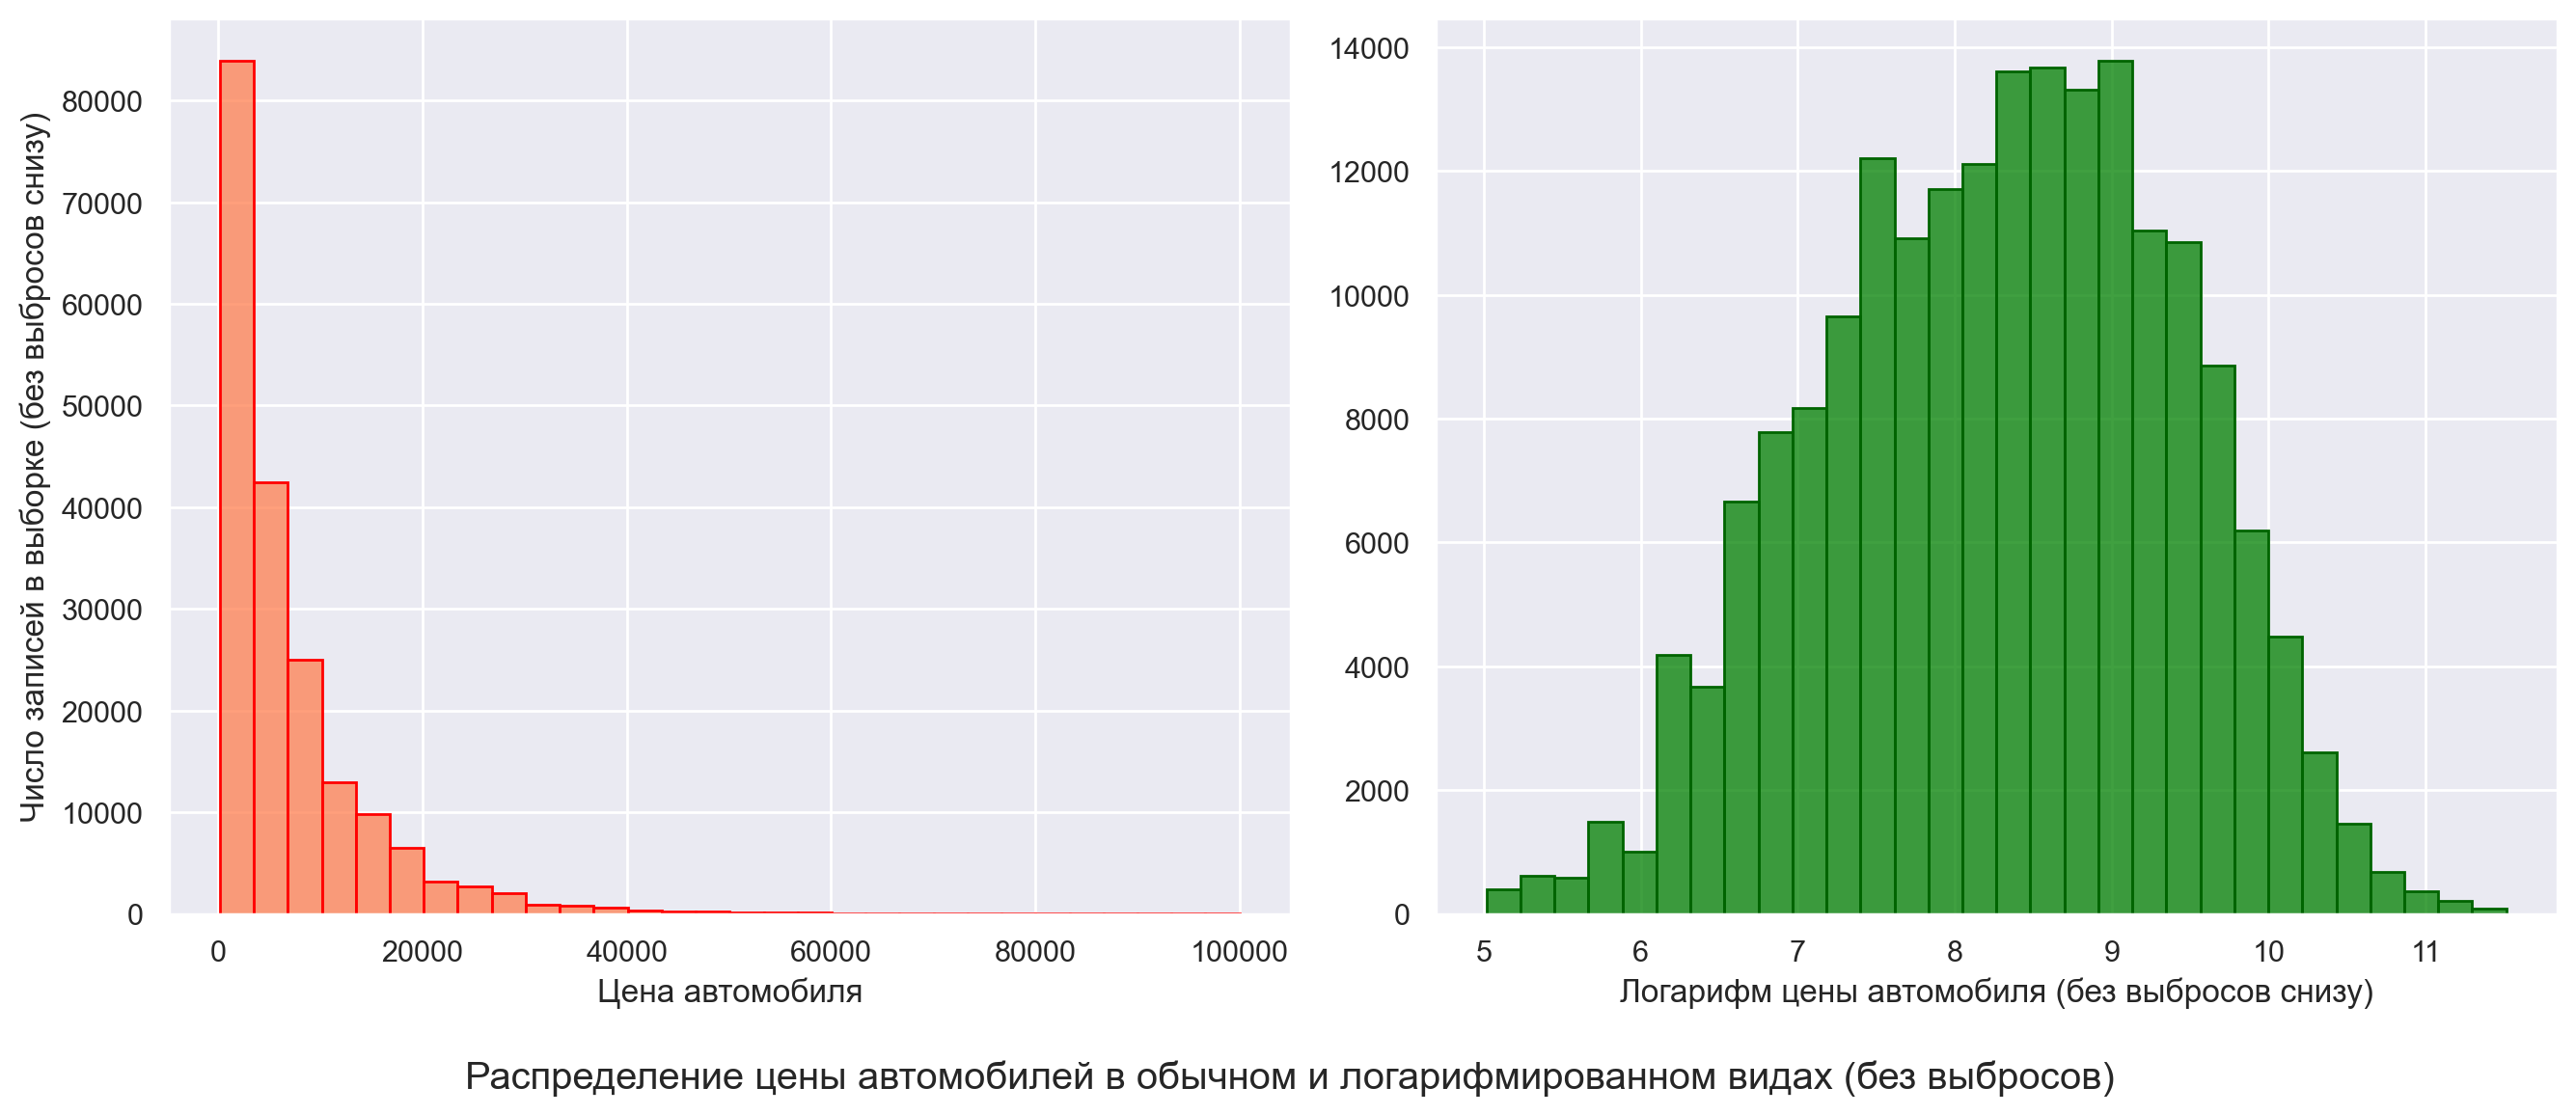

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6.5))

sns.histplot(y_train_clear,
             bins=30,
             ax=axs[0], 
             color='coral',
             edgecolor='red')
axs[0].set_ylabel('Число записей в выборке (без выбросов снизу)')
axs[0].set_xlabel('Цена автомобиля')

sns.histplot(y_train_log_clear,
             bins=30,
             ax=axs[1], 
             color='green',
             edgecolor='darkgreen')
axs[1].set_ylabel('')
axs[1].set_xlabel('Логарифм цены автомобиля (без выбросов снизу)')

fig.suptitle('Распределение цены автомобилей в обычном и логарифмированном видах (без выбросов)', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [20]:
# удалим аномальные значения
bad_price_ind = y_train_log.loc[y_train_log < 5.012].index
print(f'Плохих значений {len(bad_price_ind)} штук(а)')
X_train = X_train.drop(bad_price_ind)
y_train = y_train.drop(bad_price_ind)

Плохих значений 639 штук(а)


In [21]:
# логарифмируем таргет
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

*Далее посмотрим на другие признаки и их связь с таргетом:*

In [22]:
plot_data = X_train.copy()
plot_data = plot_data.drop('price', axis='columns')

In [383]:
plot_data.describe().T

count           mean           std         min  \
kilometer      192313.0  123726.009162  39801.165410  5000.00000   
powerPS        192313.0     131.386729     60.641384    51.00000   
autoAgeMonths  192313.0     144.472631     73.013586     1.00000   
log_price      192313.0       8.284263      1.110412     5.01728   

                         25%            50%           75%            max  
kilometer      100000.000000  150000.000000  150000.00000  150000.000000  
powerPS            90.000000     120.000000     160.00000     589.000000  
autoAgeMonths      92.000000     139.000000     192.00000     600.000000  
log_price           7.495542       8.340695       9.10498      11.512925

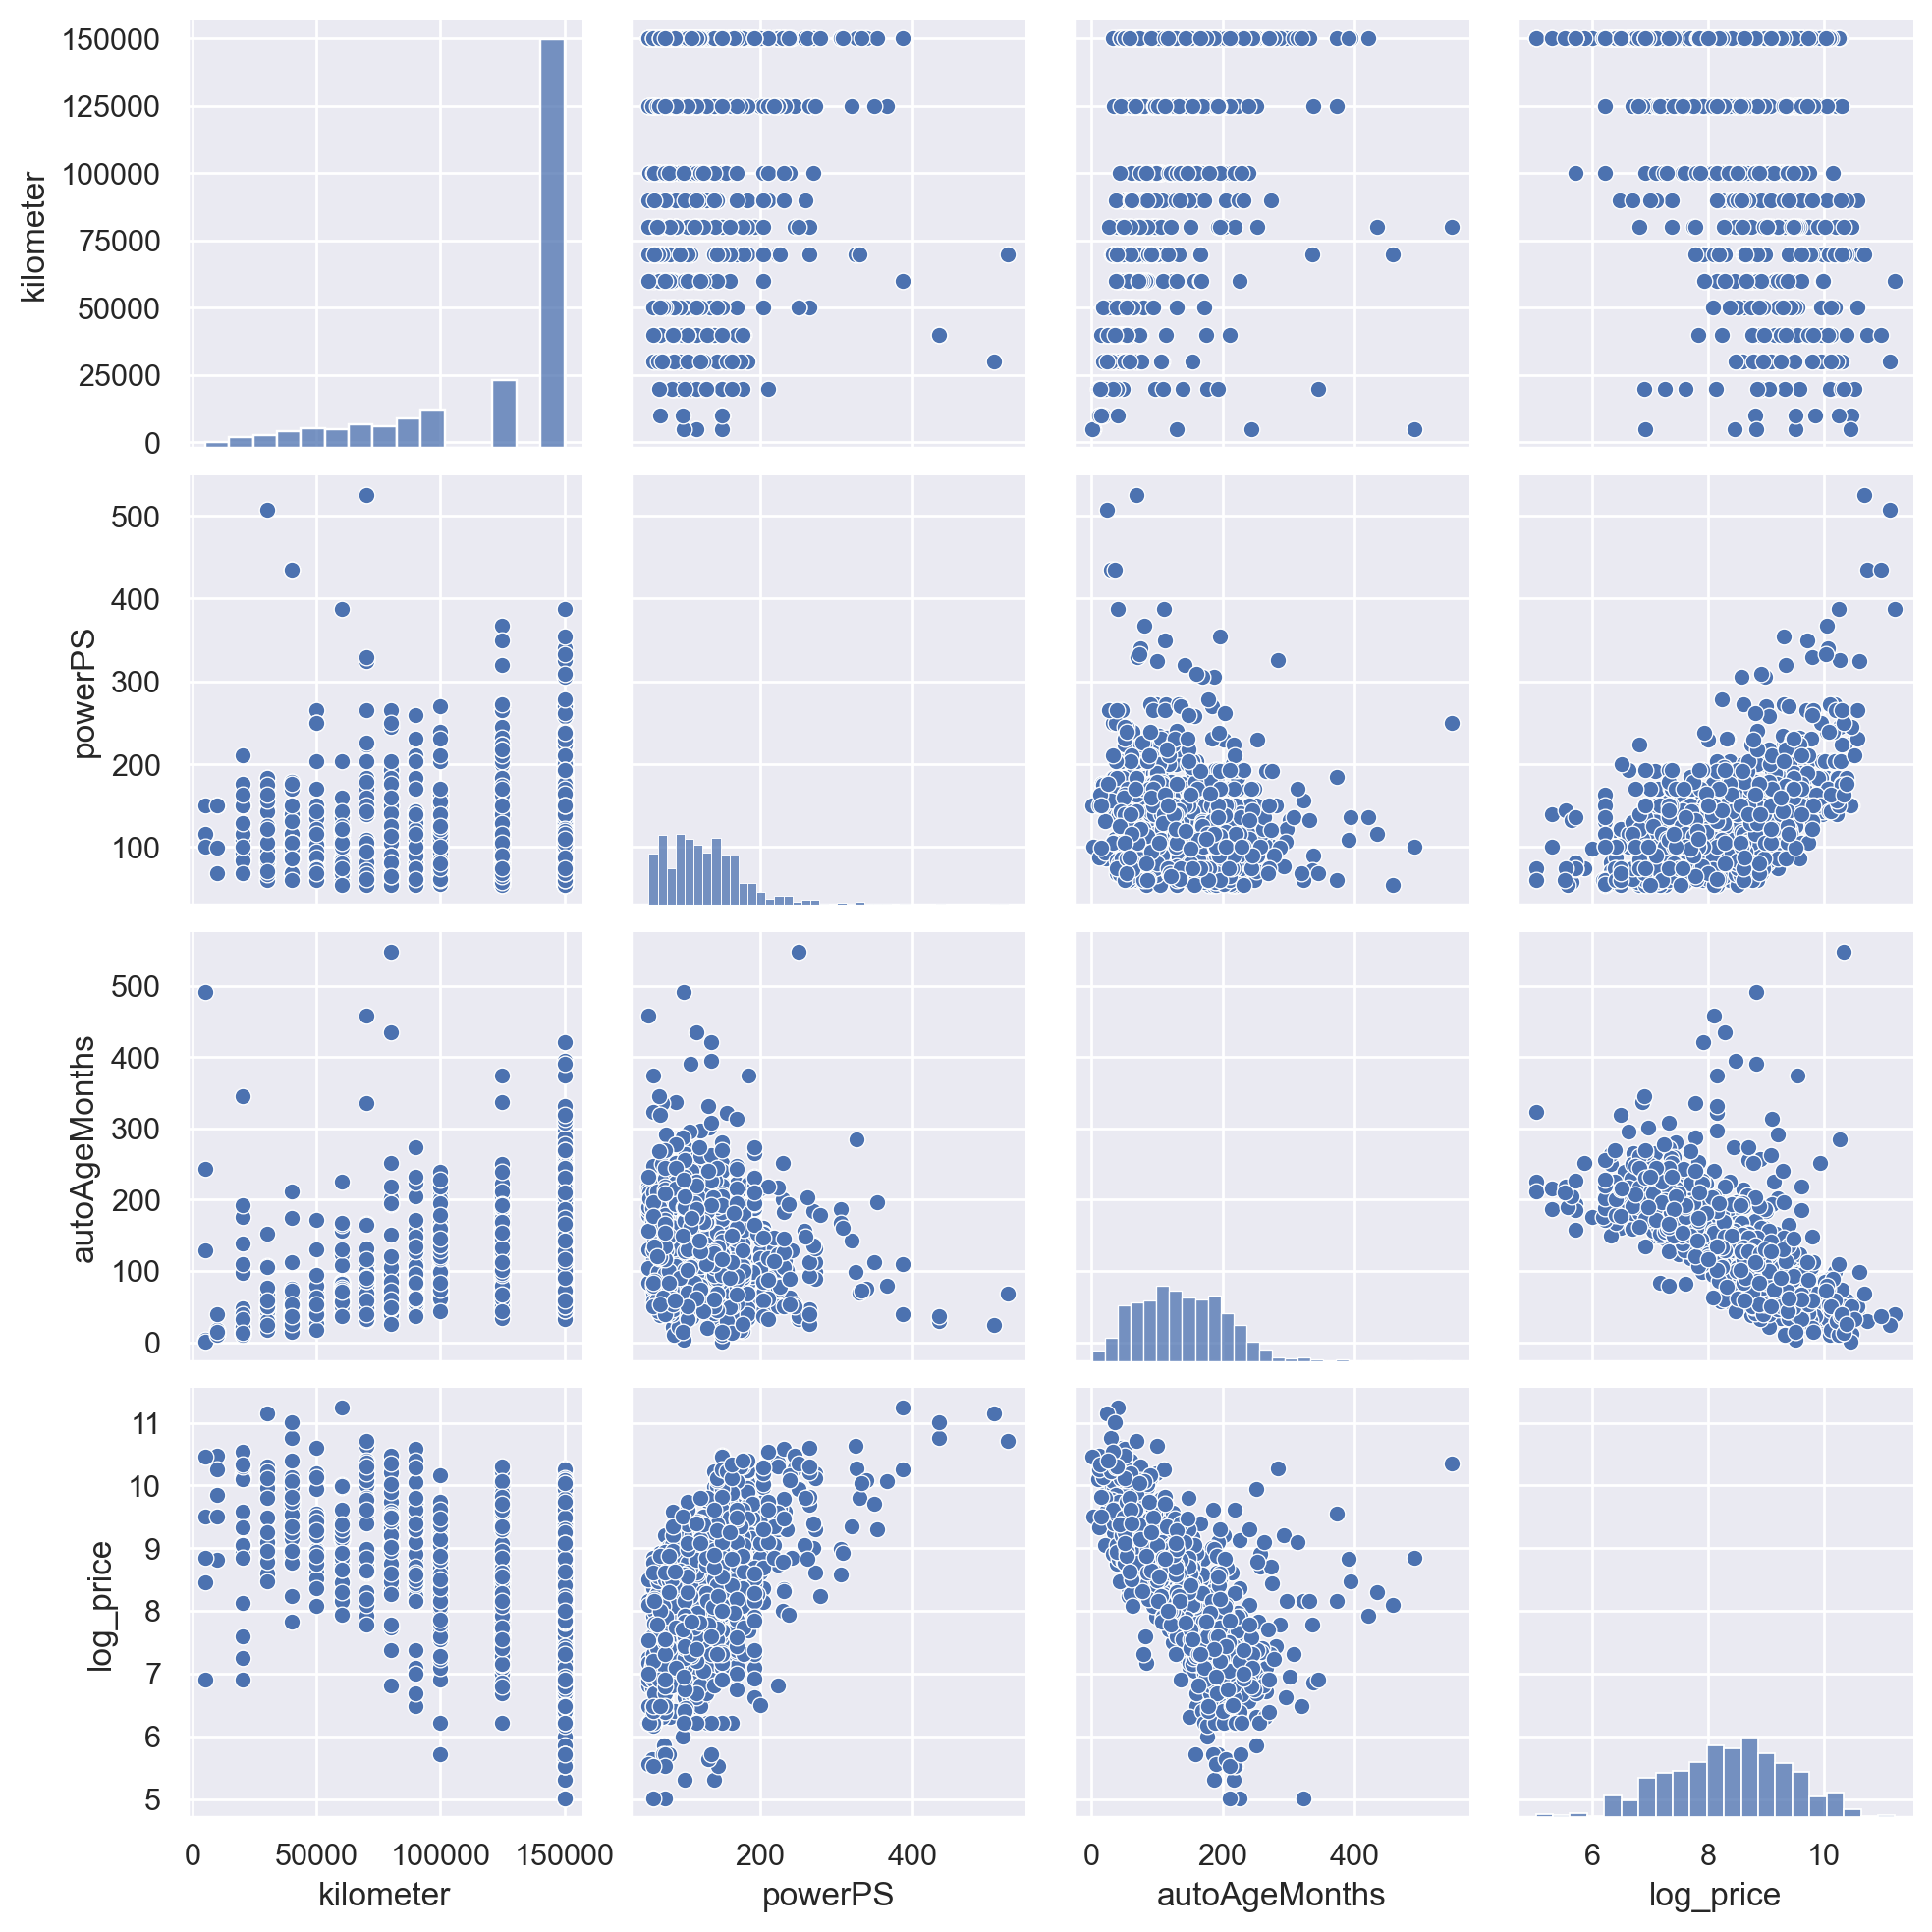

In [384]:
# представлена подвыборка, т.к. на всем датасете функция работает плохо
sns.pairplot(plot_data.sample(1000));

Можно сразу отметить следующее:
* распределение машин по пробегу сильно скошено вправо (логично, ведь это площадка для продажи б/у автомобилей)
* для `autoAgeMonths` есть очень старые машины (больше 500 месяцев), которые дорогие (раритетные). Нужны ли они нам в обучающей выборке?

Далее посмотрим на **корреляцию** между числовыми признаками:

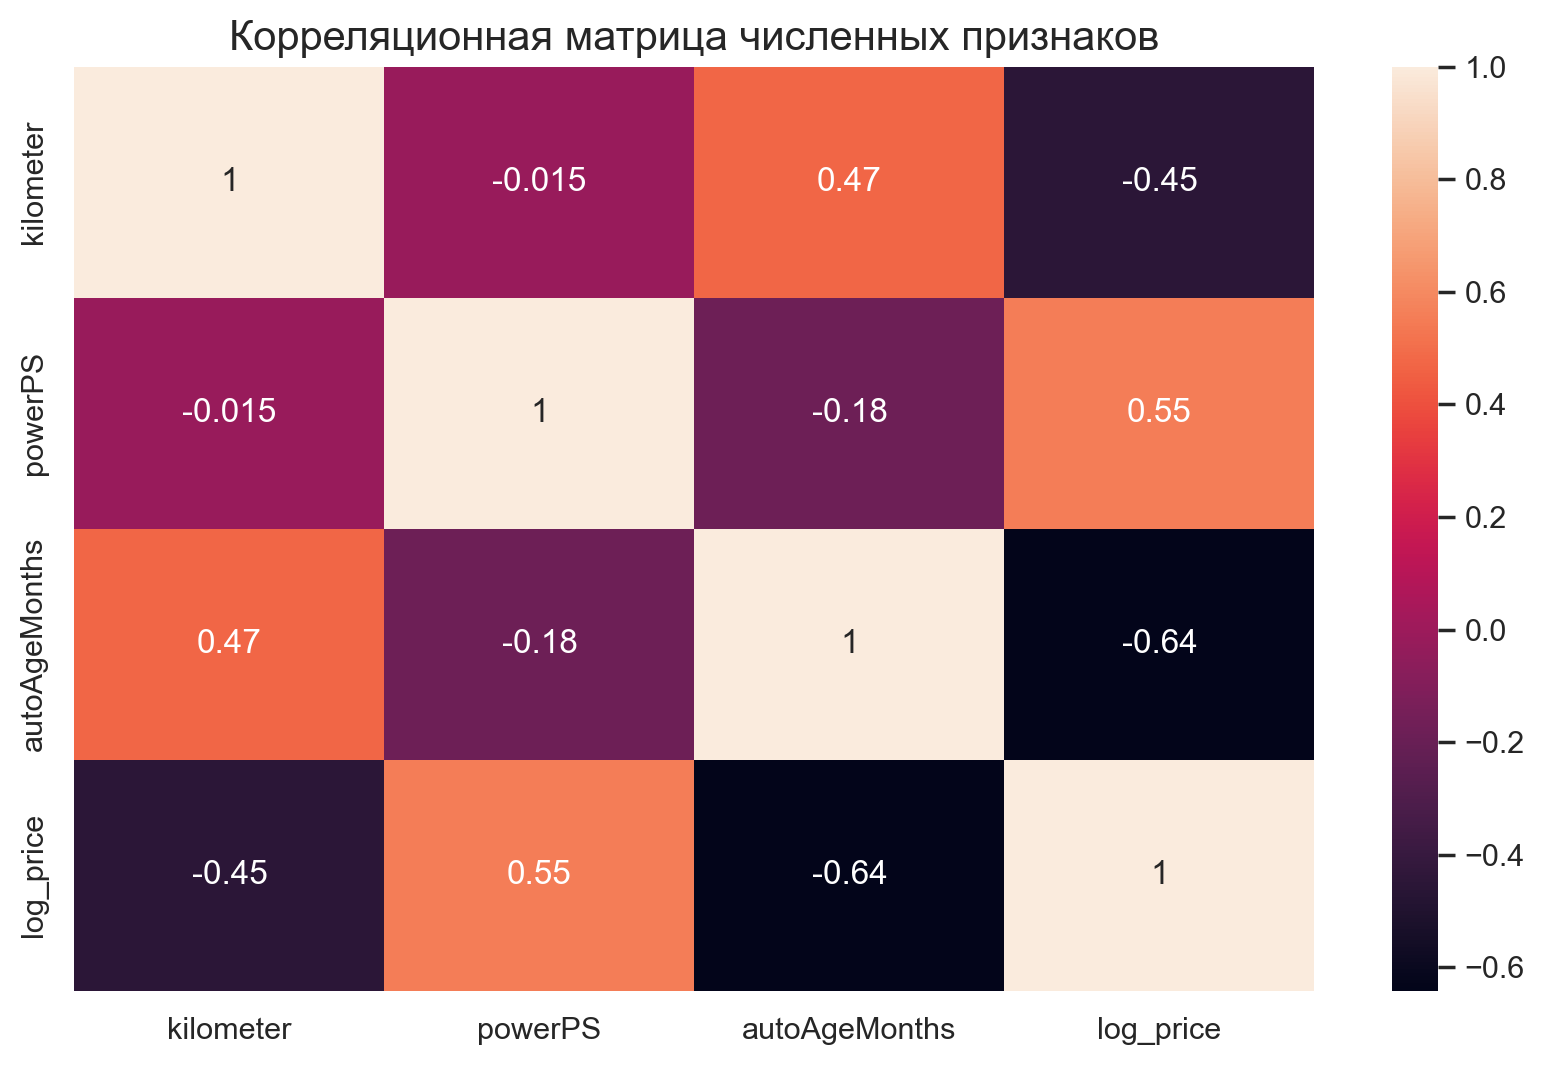

In [385]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(data=plot_data.corr(), ax=ax, annot=True)
ax.set_title('Корреляционная матрица численных признаков', fontsize=15);

С логарифмом цены высокая линейная связь прослеживается у всех численных признаков!

Тем не менее, я хотел бы объяснить, почему я предложил бы рассматривать `kilometer` как *категориальный признак*:

In [386]:
# частота значений
X_train['kilometer'].value_counts()

150000    117682
125000     21374
100000      8964
90000       7516
80000       6768
70000       6067
60000       5460
50000       4879
40000       4083
30000       3750
20000       3291
5000        1376
10000       1103
Name: kilometer, dtype: int64

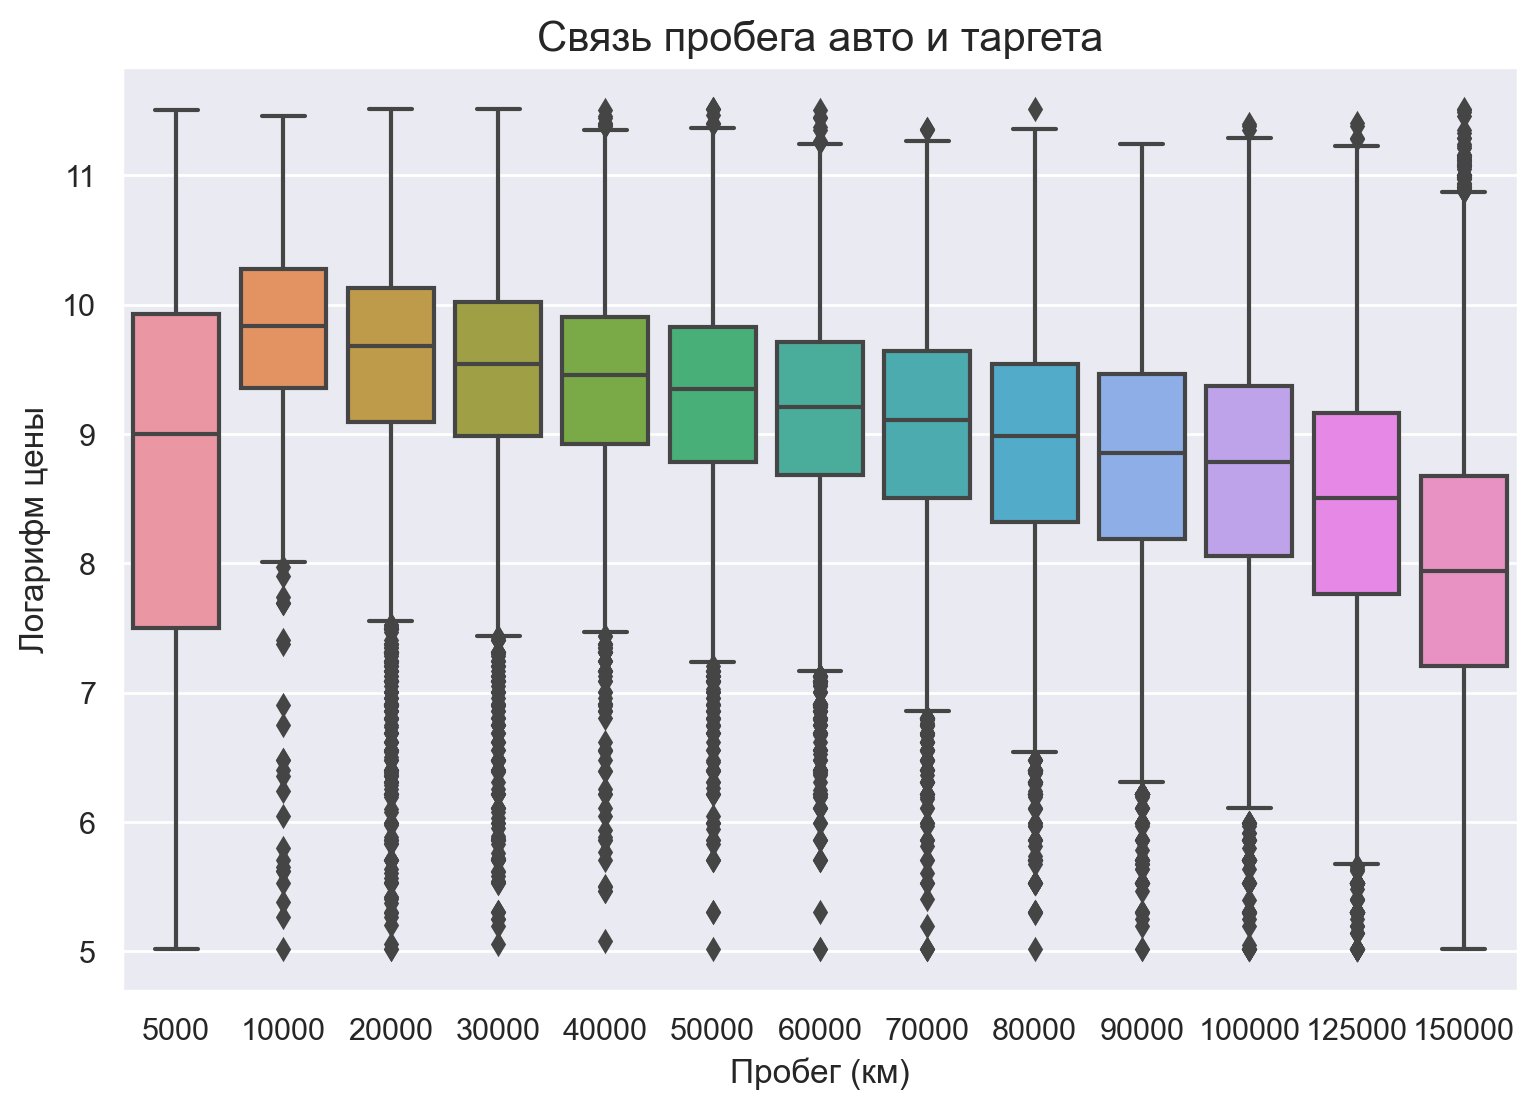

In [387]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data=X_train, x='kilometer', y=y_train)
ax.set_title('Связь пробега авто и таргета', fontsize=15)
plt.xlabel('Пробег (км)')
plt.ylabel('Логарифм цены');

Видно, что, в целом, прослеживается явная *линейная связь*, но автомобили с пробегом 5 тыс. км могут внести сильное мещение, т.к. среди них (что логично) есть как дешевые автомобили, так и дорогие. Учитывая то, как в данном датасете закодирован этот признак (не интервально, а кусочно), я бы предложил рассматривать его как **категориальный**. В результате при кодировании их получится не так много.

---

Далее я построю "ящики с усами" для других категориальных признаков:

In [388]:
categorical # посмотрим на категориальные признаки

['brand',
 'model',
 'vehicleType',
 'gearbox',
 'fuelType',
 'notRepairedDamage',
 'kilometer']

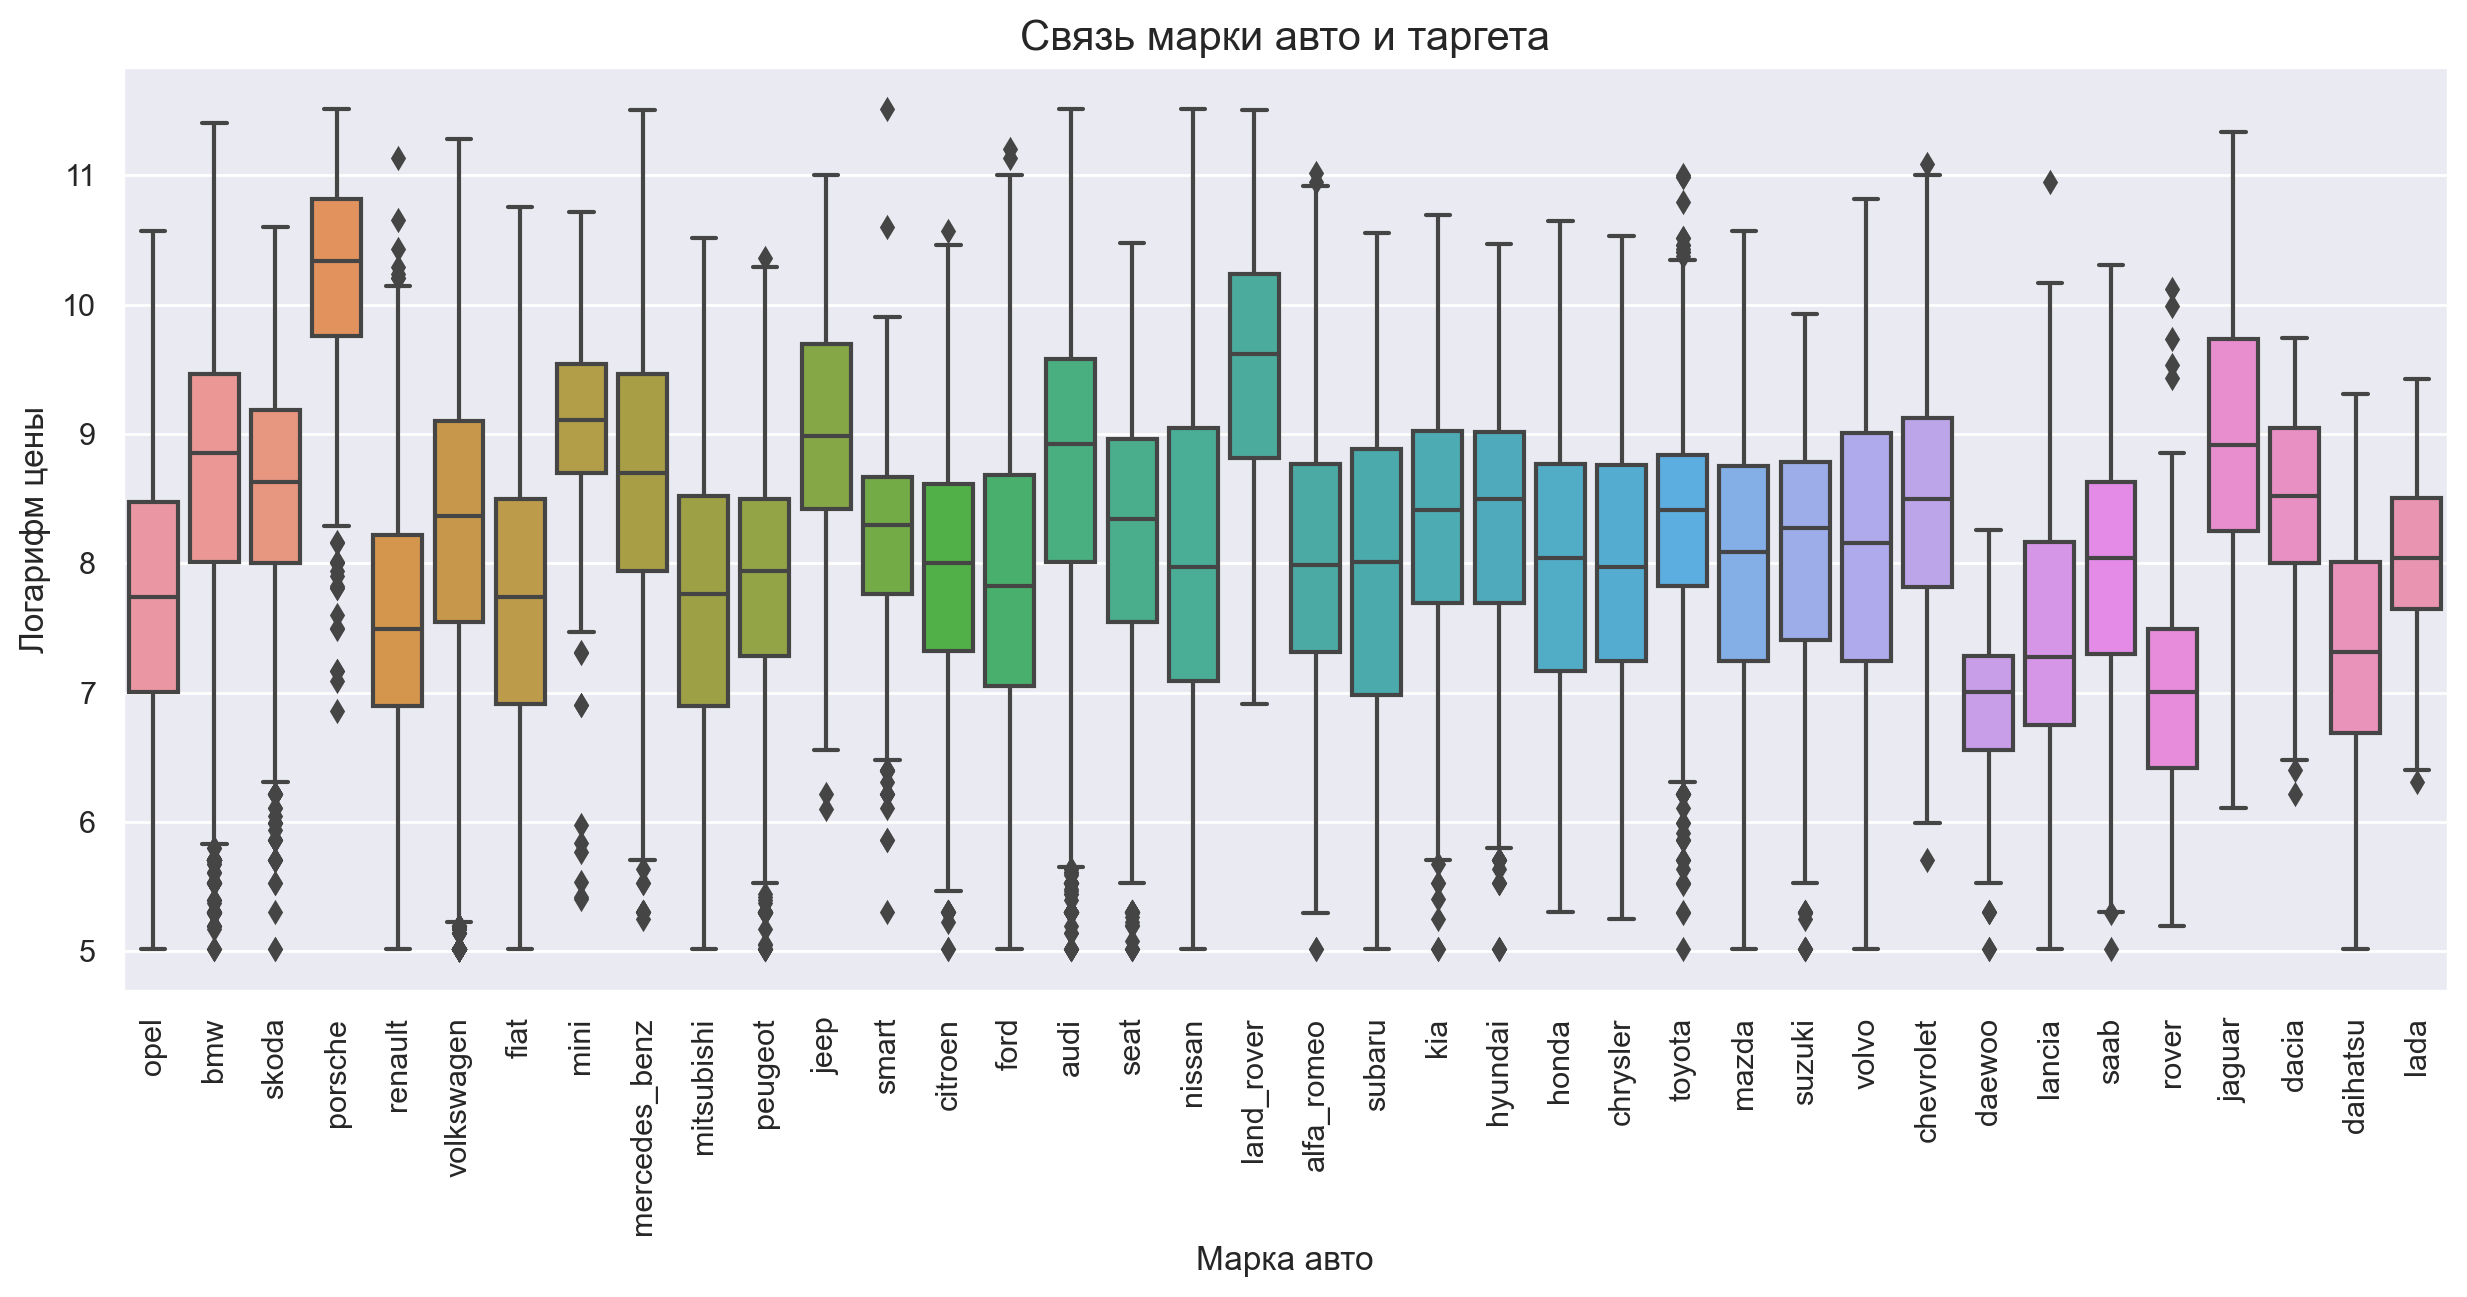

In [389]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(data=plot_data, x='brand', y='log_price')
ax.set_title('Связь марки авто и таргета', fontsize=15)
plt.xlabel('Марка авто')
plt.ylabel('Логарифм цены')
plt.xticks(rotation=90);

Данный график весьма хаотичный, но он призван показать, насколько различается средняя цена на разные автомобили. 

На самом деле, в ранжированном виде это выглядит следующим образом:

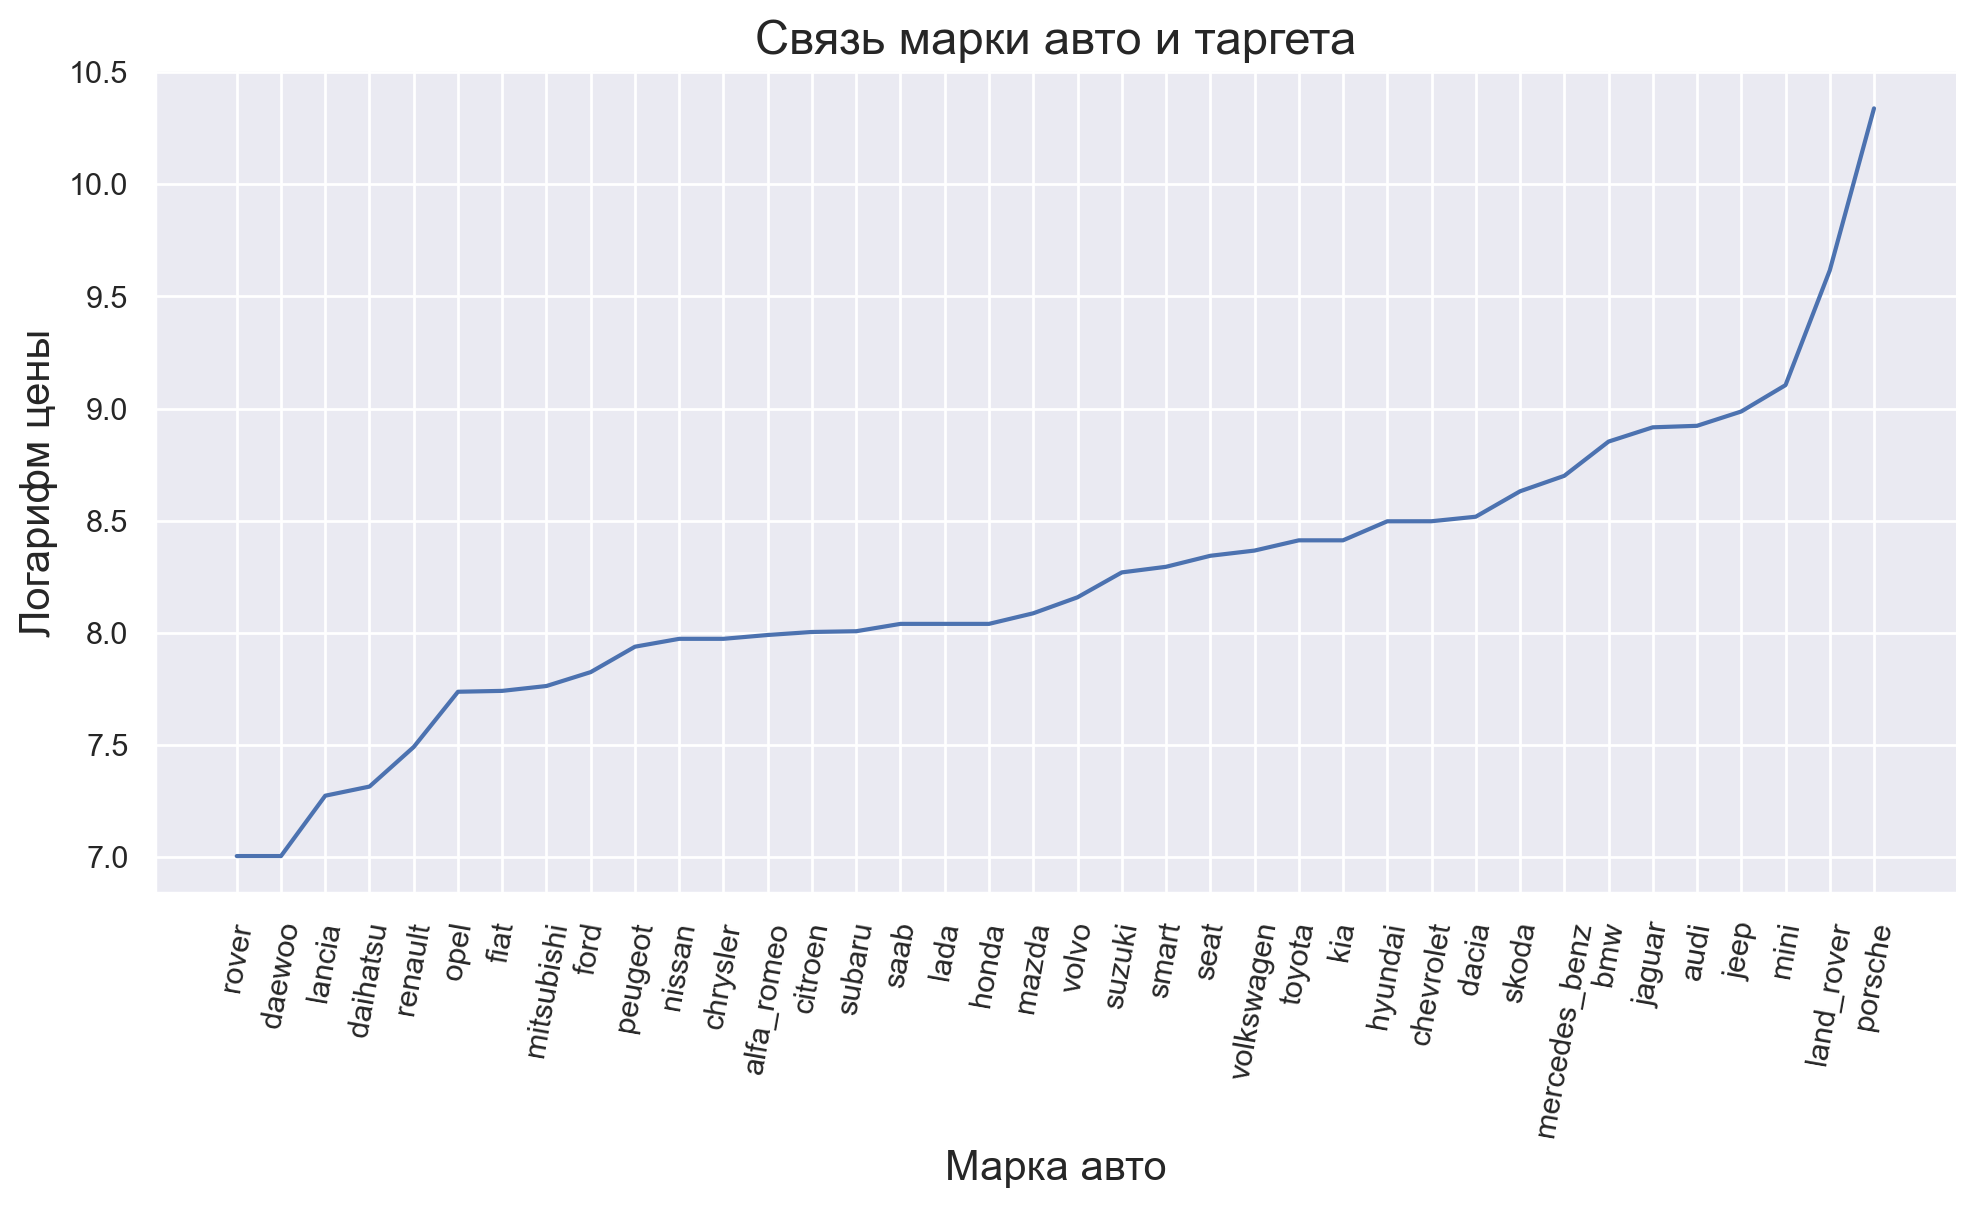

In [390]:
brands = plot_data.groupby('brand').median()['log_price'].to_frame().sort_values(by='log_price')

sns.relplot(x='brand',
            y='log_price',
            kind='line',
            height=5,
            aspect=2,
            data=brands)

plt.title('Связь марки авто и таргета', fontsize=17)

plt.xlabel('Марка авто', fontsize=15)
plt.ylabel('Логарифм цены', fontsize=15)
plt.xticks(rotation=80);

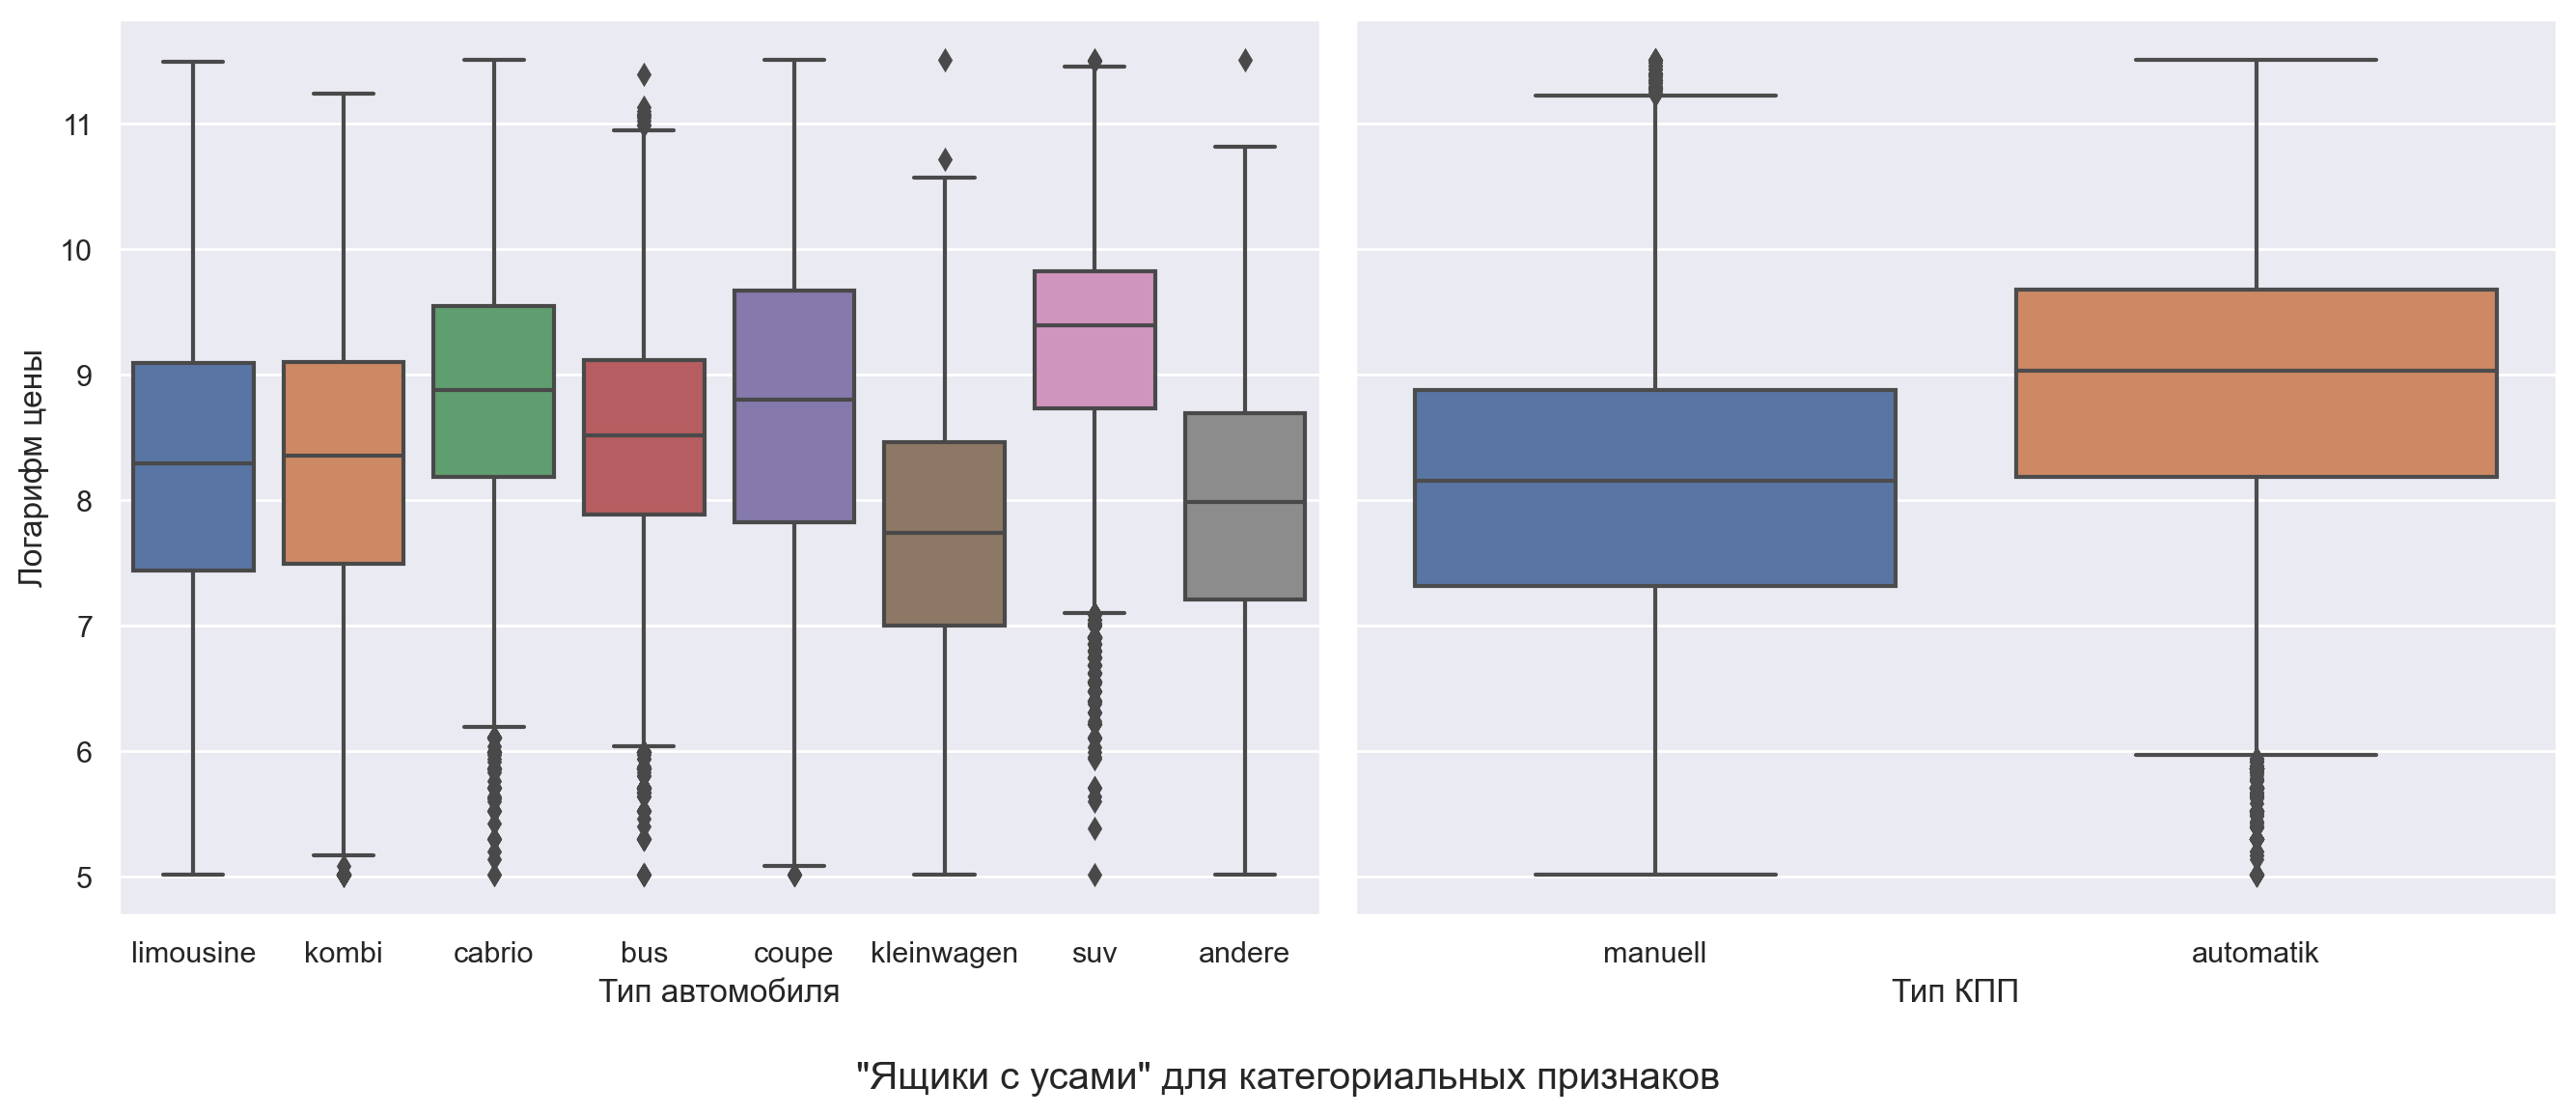

In [391]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6.5))

sns.boxplot(data=plot_data, x='vehicleType', y='log_price', ax=axs[0])
axs[0].set_ylabel('Логарифм цены')
axs[0].set_xlabel('Тип автомобиля')

sns.boxplot(data=plot_data, x='gearbox', y='log_price', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[1].set_xlabel('Тип КПП')

fig.suptitle('"Ящики с усами" для категориальных признаков', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

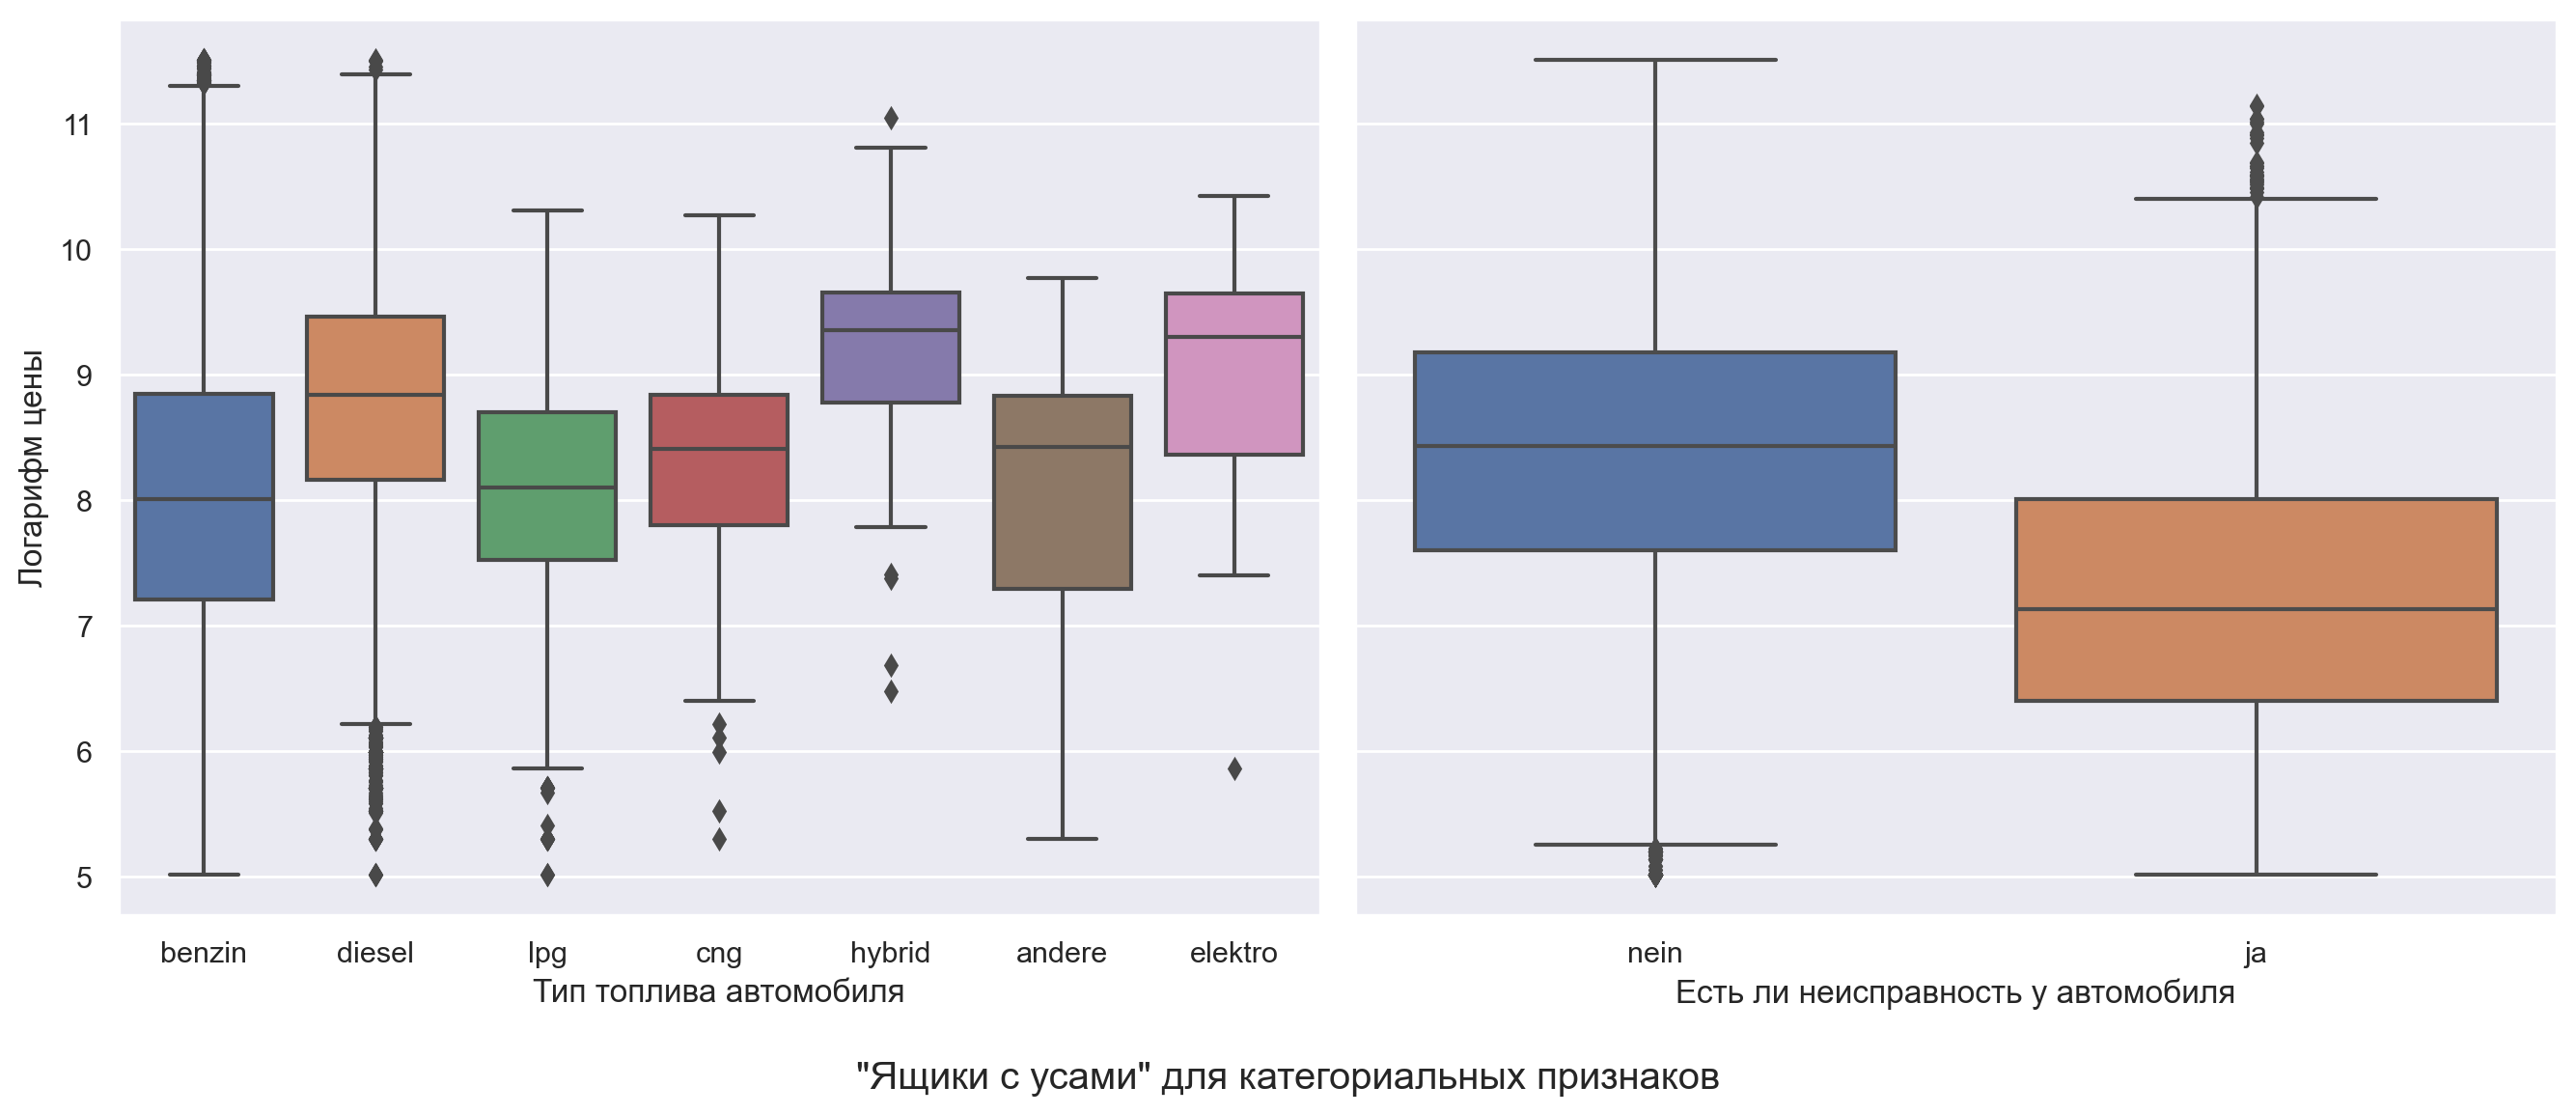

In [392]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6.5))

sns.boxplot(data=plot_data, x='fuelType', y='log_price', ax=axs[0])
axs[0].set_ylabel('Логарифм цены')
axs[0].set_xlabel('Тип топлива автомобиля')

sns.boxplot(data=plot_data, x='notRepairedDamage', y='log_price', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[1].set_xlabel('Есть ли неисправность у автомобиля')

fig.suptitle('"Ящики с усами" для категориальных признаков', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

*Видно, что все признаки довольно хорошо разбивают объекты - они должны получиться сильными.*

Посмотрим на разницу в распределении таргета при разных значениях бинарных показателей `gearbox` и `notRepairedDamage`:

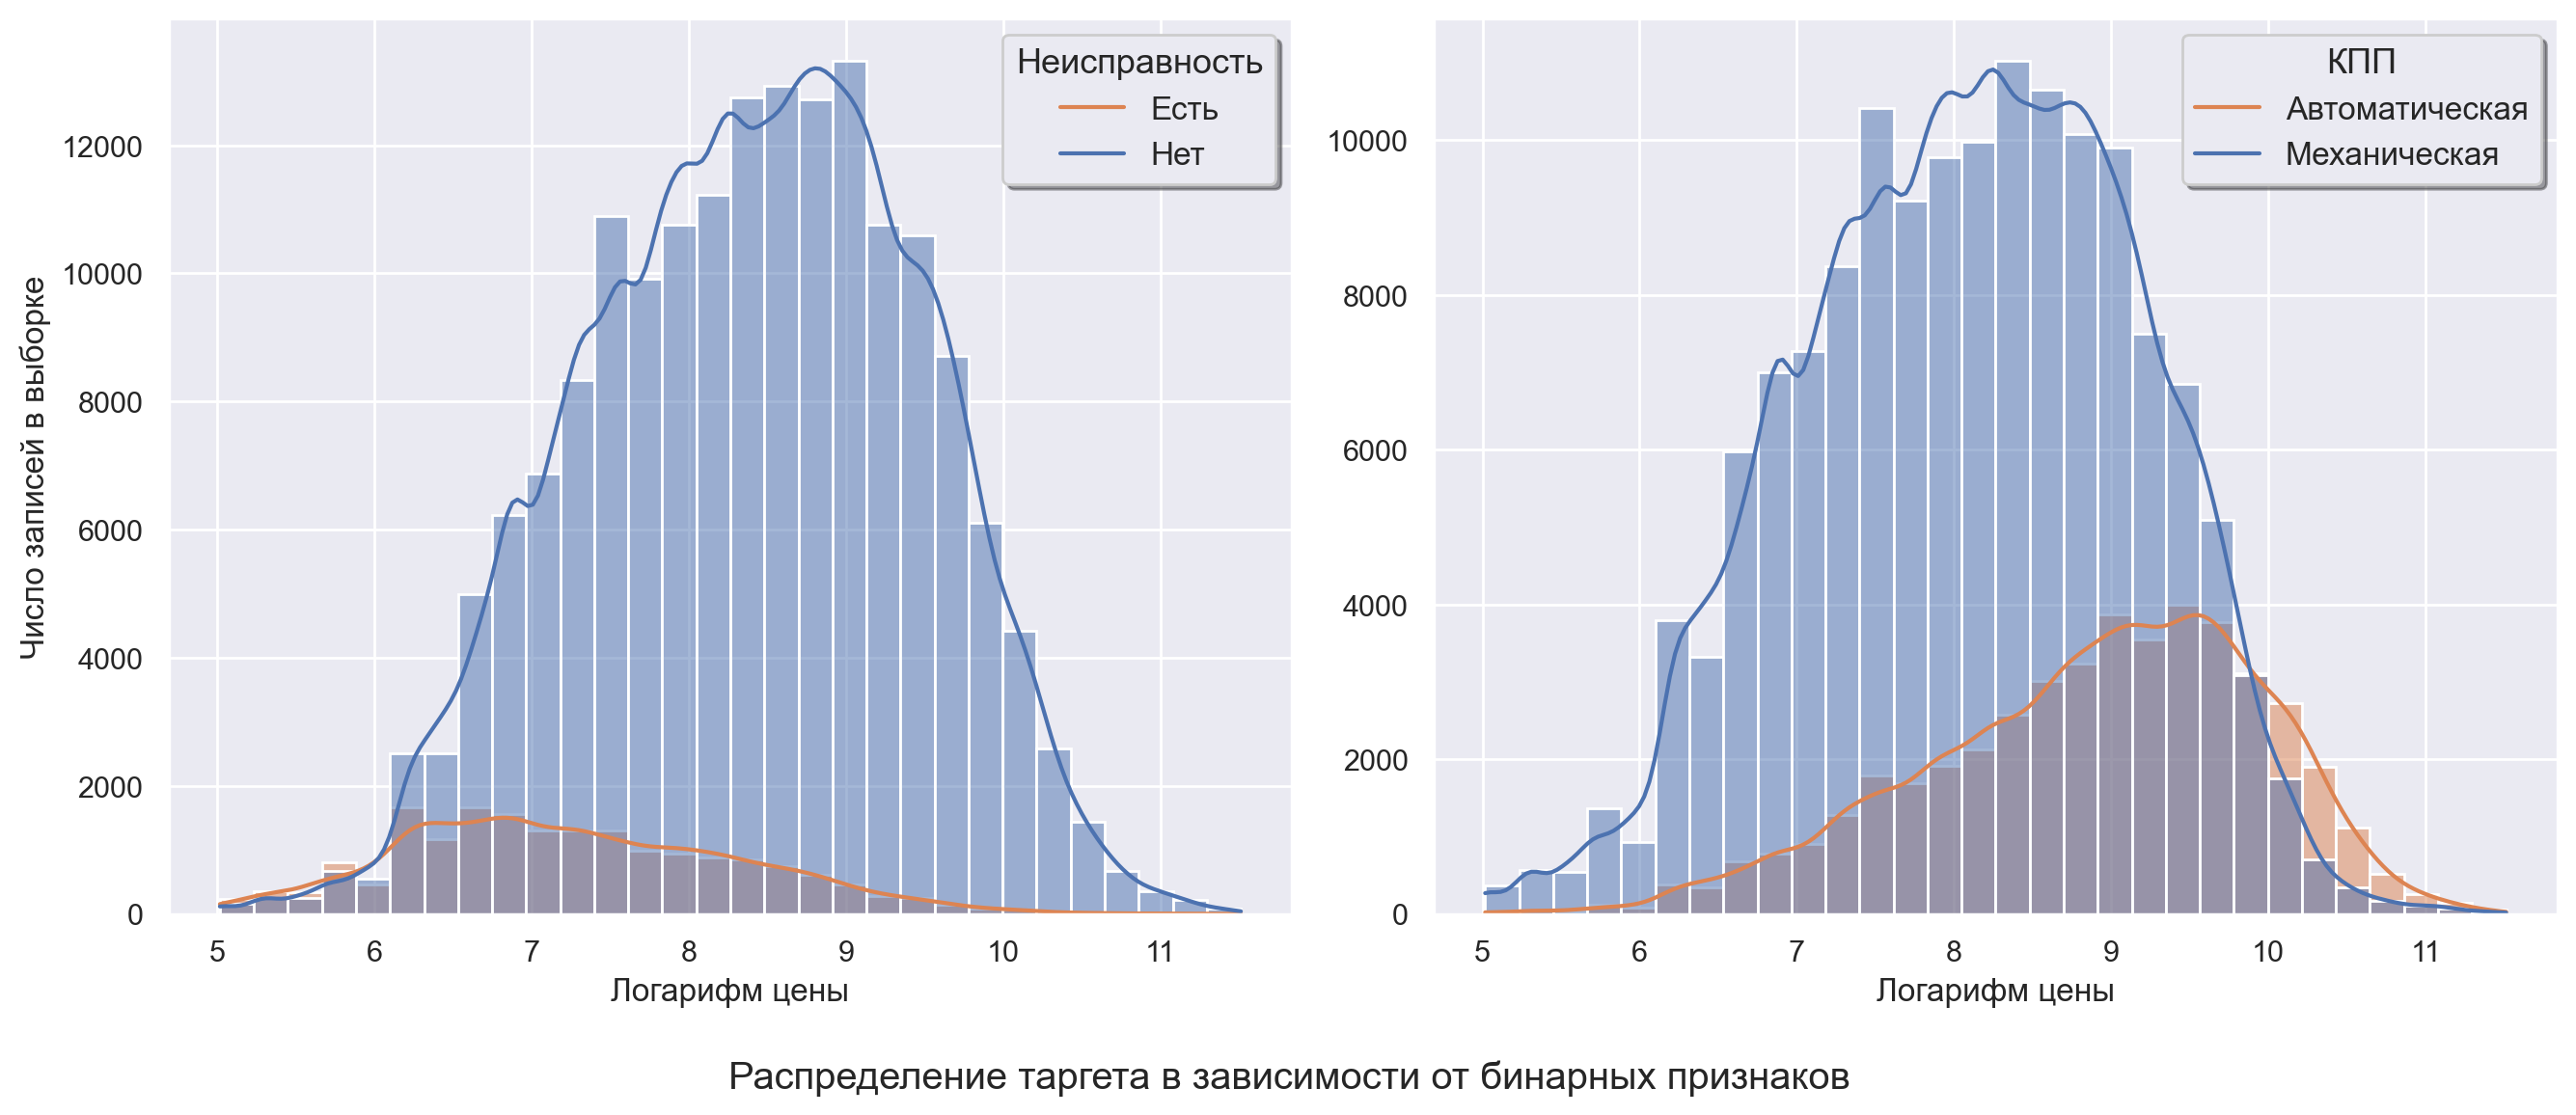

In [393]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6.5))

sns.histplot(data=plot_data,
            x='log_price',
            hue='notRepairedDamage',
            kde=True,
            bins=30,
            ax=axs[0])
axs[0].set_ylabel('Число записей в выборке')
axs[0].set_xlabel('Логарифм цены')
axs[0].legend(title='Неисправность', labels=['Есть', 'Нет'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True)

sns.histplot(data=plot_data,
            x='log_price',
            hue='gearbox',
            kde=True,
            bins=30,
            ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('Логарифм цены')
axs[1].legend(title='КПП', labels=['Автоматическая', 'Механическая'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True)

fig.suptitle('Распределение таргета в зависимости от бинарных признаков', y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

*Далее посмотрим на признак "возраст автомобиля":*

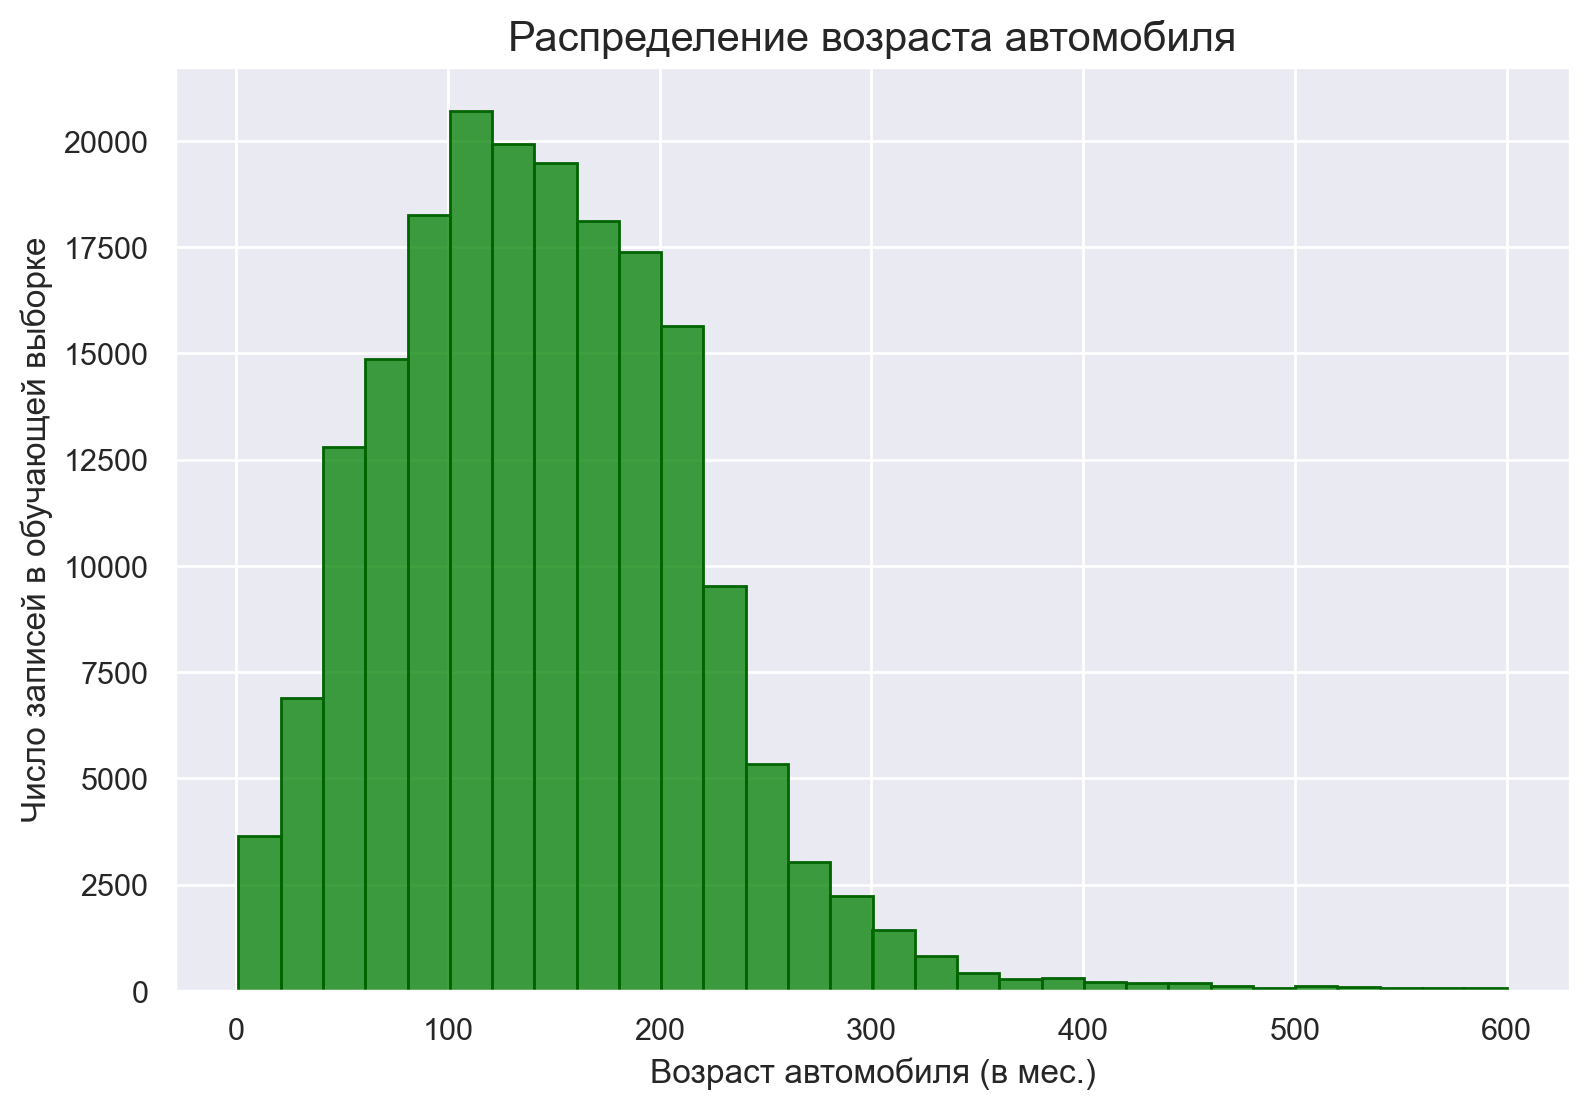

In [394]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение возраста автомобиля', fontsize=15)

sns.histplot(plot_data['autoAgeMonths'],
             bins=30,
             ax=ax, 
             color='green',
             edgecolor='darkgreen')
             
plt.xlabel('Возраст автомобиля (в мес.)')
plt.ylabel('Число записей в обучающей выборке');

Есть большой правый хвост. Но являются ли объекты там выбросами или там есть что-то интересное?

Посмотрим на распределение признака и таргета:

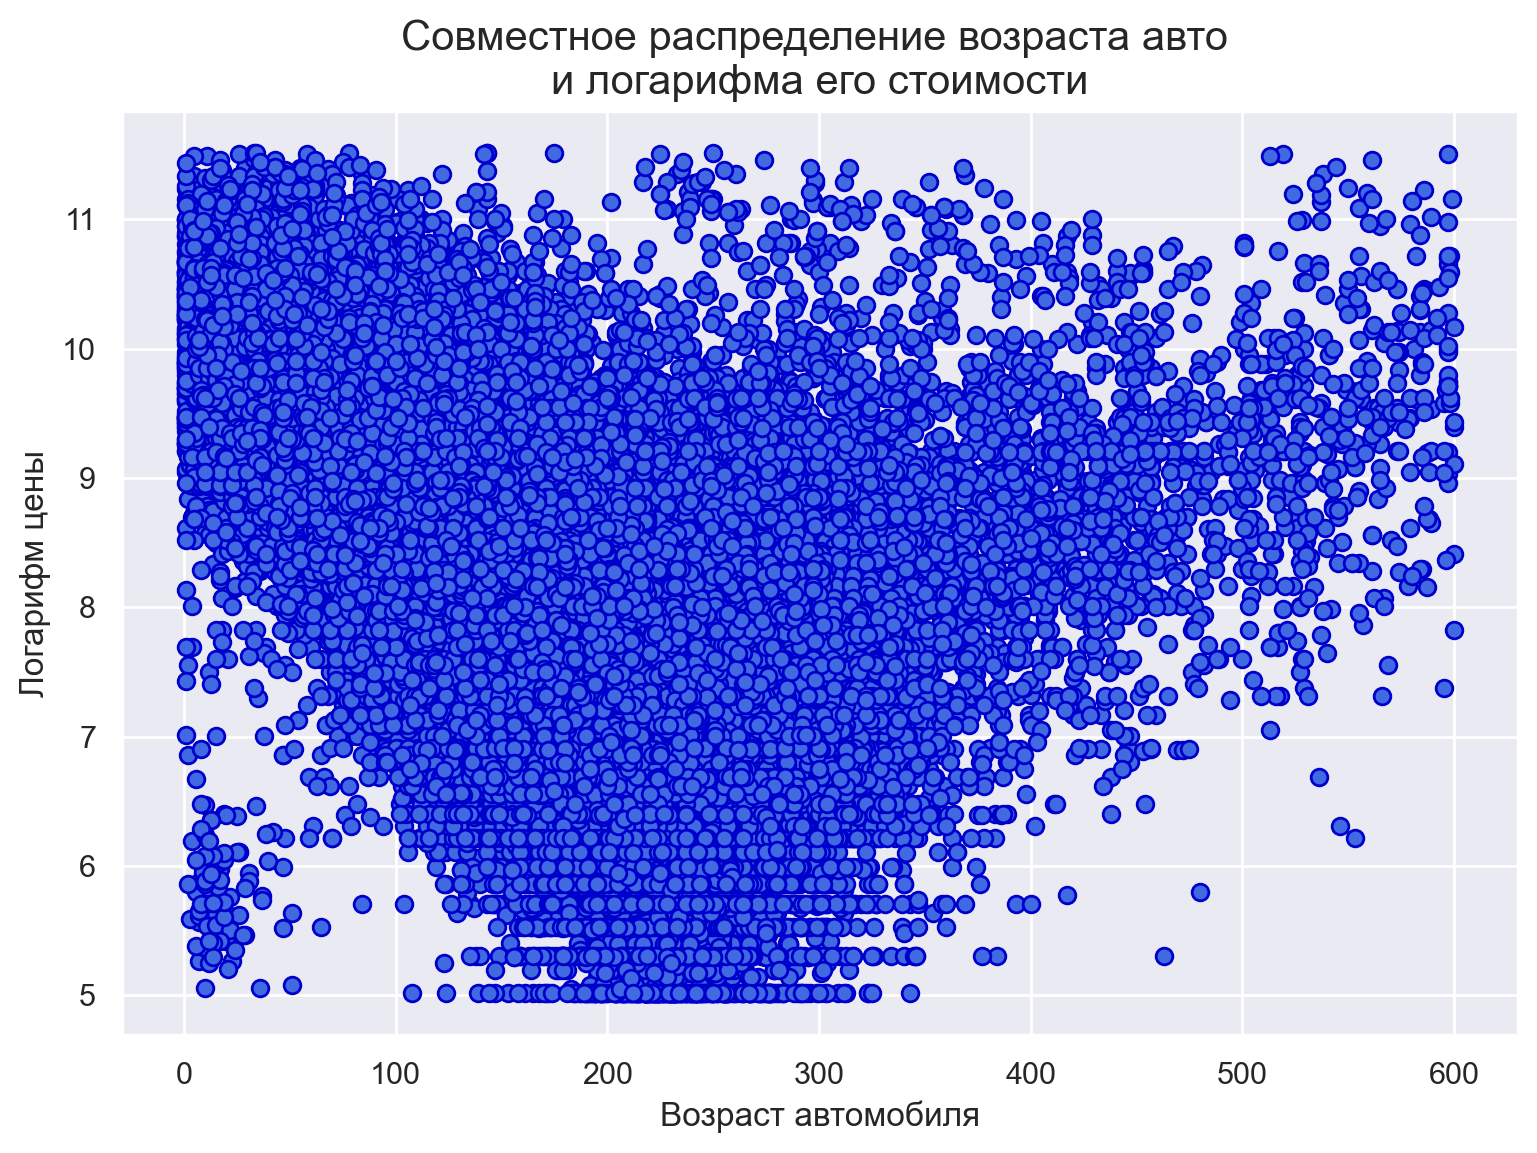

In [395]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Совместное распределение возраста авто \nи логарифма его стоимости', fontsize=15)
plt.xlabel('Возраст автомобиля')
plt.ylabel('Логарифм цены')
plt.scatter(x='autoAgeMonths', y='log_price', data=plot_data, c='royalblue', edgecolors='mediumblue');

Видна нелинейная зависимость (возможно, *квадратичная*). **В начале цена падает, а затем растет.**

Попробуем "в лоб" провести линию регрессии:

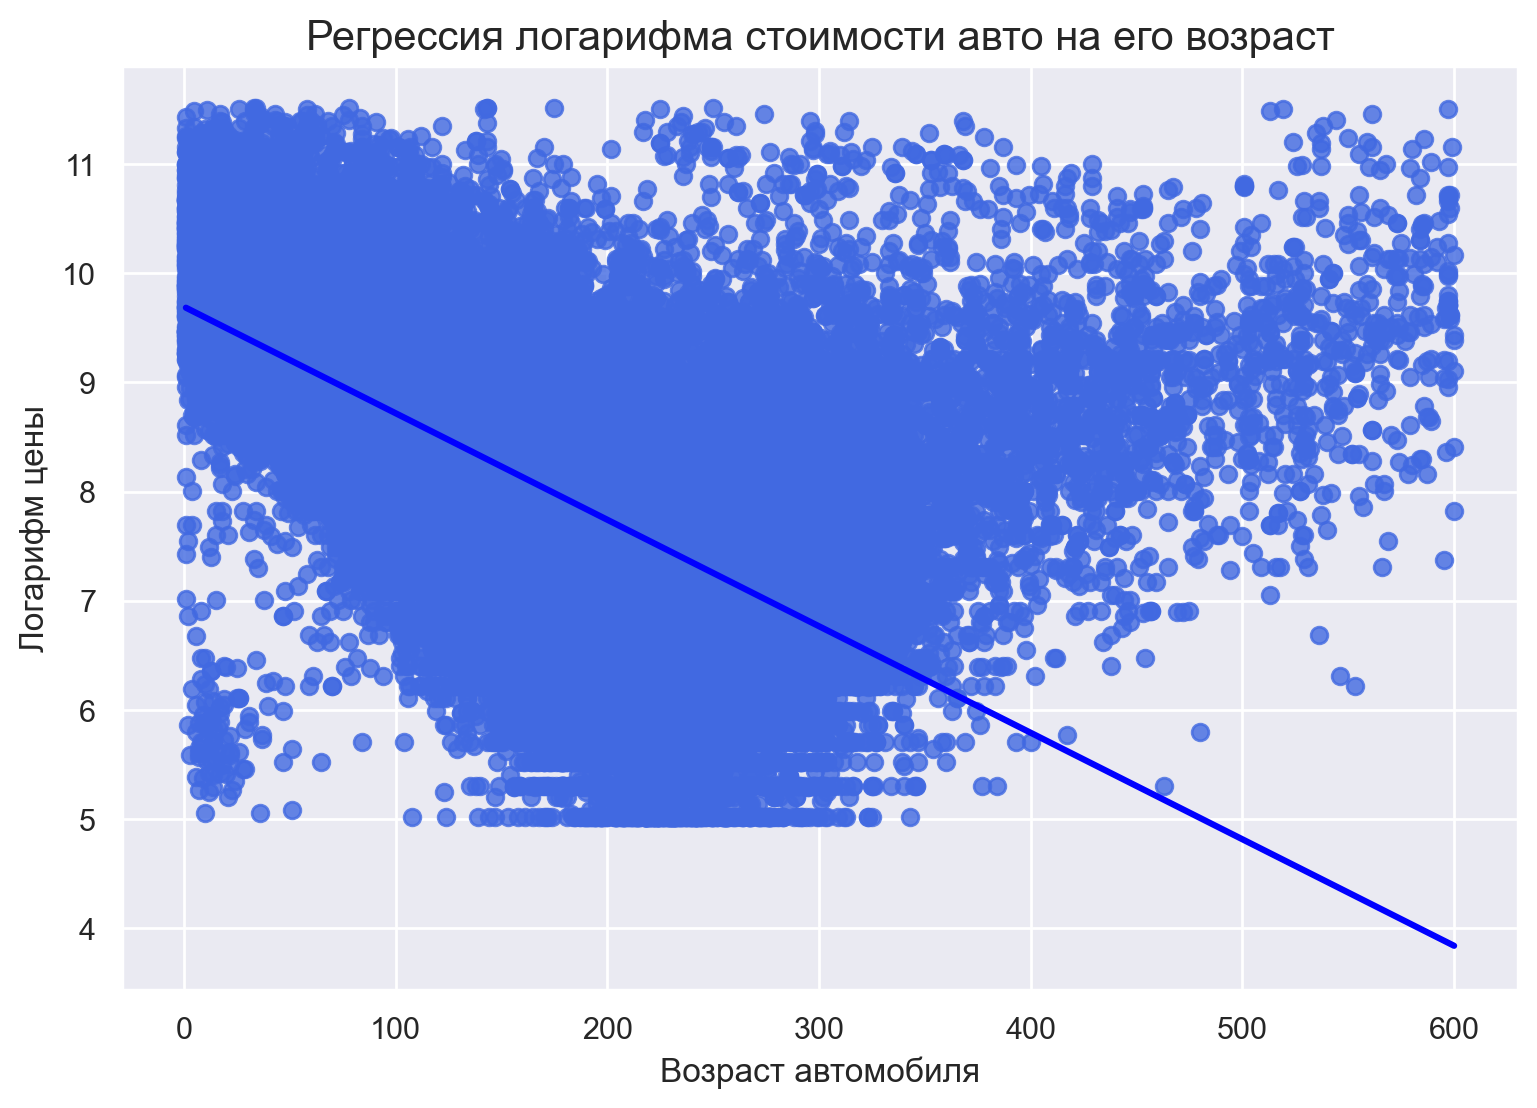

In [396]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Регрессия логарифма стоимости авто на его возраст', fontsize=15)
sns.regplot(x='autoAgeMonths', y='log_price', data=plot_data, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
plt.xlabel('Возраст автомобиля')
plt.ylabel('Логарифм цены');

Регрессия явно смещенная: после 500 месяцев получаются значения, которых даже нет в данных, мы будем очень сильно ошибаться на них.

In [397]:
# статистическая граница выбросов

q_005 = np.quantile(plot_data['autoAgeMonths'], q=0.005)
q_995 = np.quantile(plot_data['autoAgeMonths'], q=0.995)
q_25 = np.quantile(plot_data['autoAgeMonths'], q=0.25)
q_75 = np.quantile(plot_data['autoAgeMonths'], q=0.75)

delta = q_75 - q_25
b_u = q_75 + delta*1.5
b_d = q_25 - delta*1.5

print(f'Статистический интервал типичных значений: [{round(b_d, 3)}; {round(b_u, 3)}]')
print(f'Квантиль уровня 0.005: {round(q_005, 3)}')
print(f'Квантиль уровня 0.995: {round(q_995, 3)}')

Статистический интервал типичных значений: [-58.0; 342.0]
Квантиль уровня 0.005: 10.0
Квантиль уровня 0.995: 423.0


*Проверим квадратичную зависимость для признака:*

In [398]:
# создаем признаки
month_data = pd.DataFrame(plot_data['autoAgeMonths'])
month_data['autoAgeMonths_sq'] = plot_data['autoAgeMonths'] ** 2

# строим регрессию
reg = linear_model.LinearRegression()
reg.fit(month_data, y_train)

# смотрим на коэф-ты
reg.coef_

array([-2.45838925e-02,  4.21272094e-05])

In [399]:
2.45838925e-02 / (2 * 4.21272094e-05)

291.7816400627761

Во-первых, путем взятия частной производной и решения уравнения можно понять, что эффект месяца меняется примерно после возраста, равного 292 месяца.

Во-вторых, иллюстрируем эффект наглядно:

In [400]:
sint_data = np.linspace(month_data['autoAgeMonths'].min(), month_data['autoAgeMonths'].max(), 10000).reshape(-1, 1)
sint_df = pd.DataFrame(sint_data)
sint_df = sint_df.rename(columns={0: "autoAgeMonths"})
sint_df['autoAgeMonths_sq'] = sint_df['autoAgeMonths'] ** 2

y_pred_sint = reg.predict(sint_df)

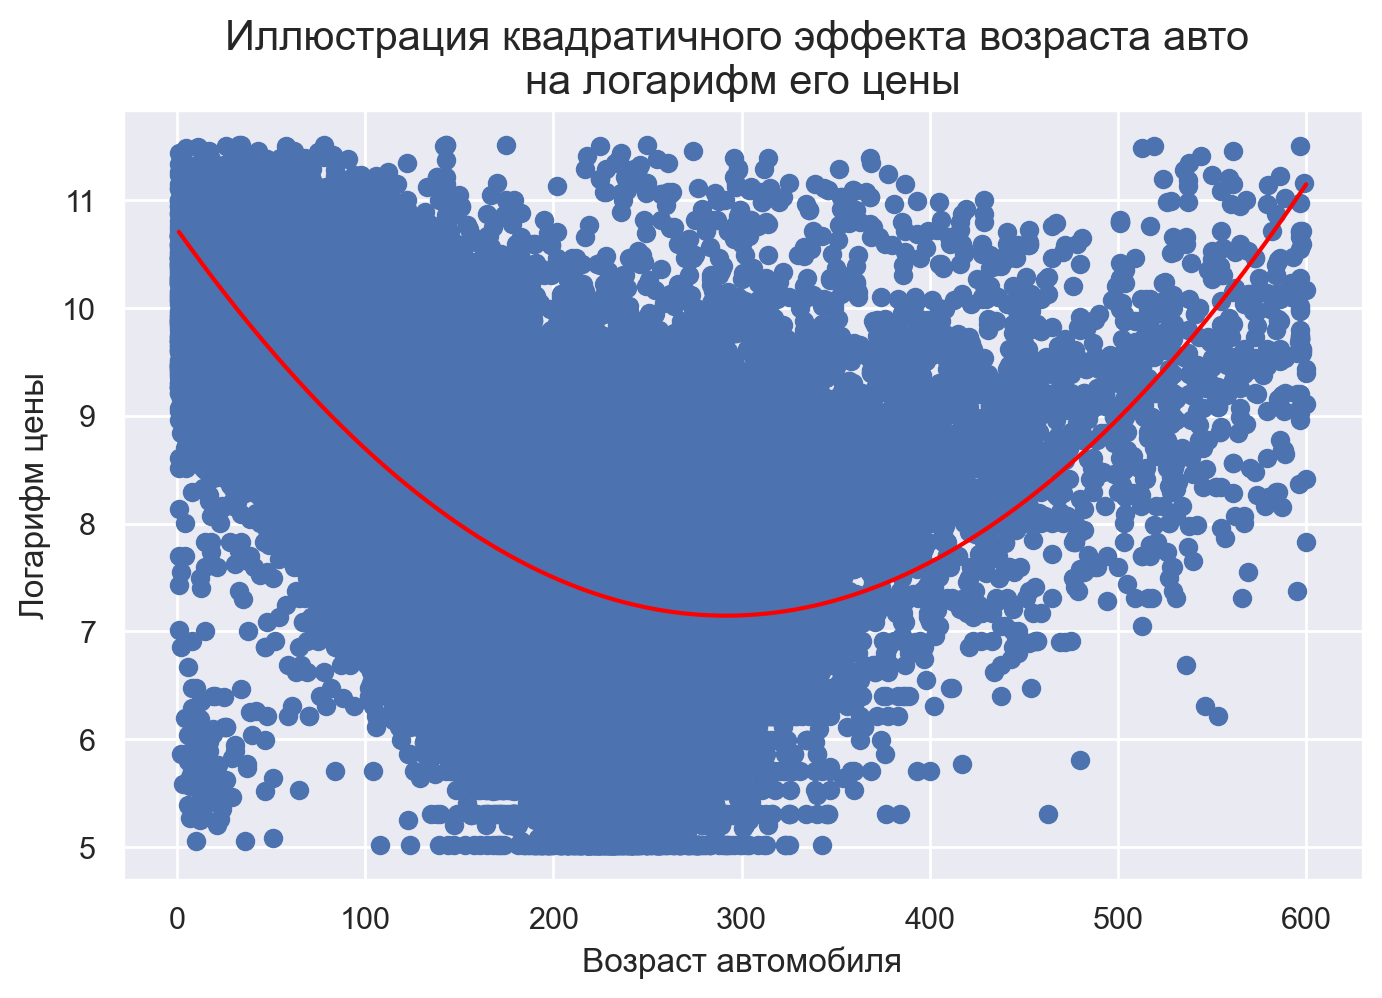

In [401]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Иллюстрация квадратичного эффекта возраста авто \nна логарифм его цены', fontsize=15)
plt.scatter(month_data['autoAgeMonths'], y_train) # перелом происходит в 292
plt.plot(sint_data, y_pred_sint, label="Predictions", color='red')

plt.xlabel('Возраст автомобиля')
plt.ylabel('Логарифм цены');

Для наглядности можно разделить выборку на две подвыборки и провести простую регрессионную линию в каждой:

In [402]:
plot_data_mon_new = plot_data.loc[plot_data['autoAgeMonths'] < 292]
plot_data_mon_old = plot_data.loc[plot_data['autoAgeMonths'] >= 292]

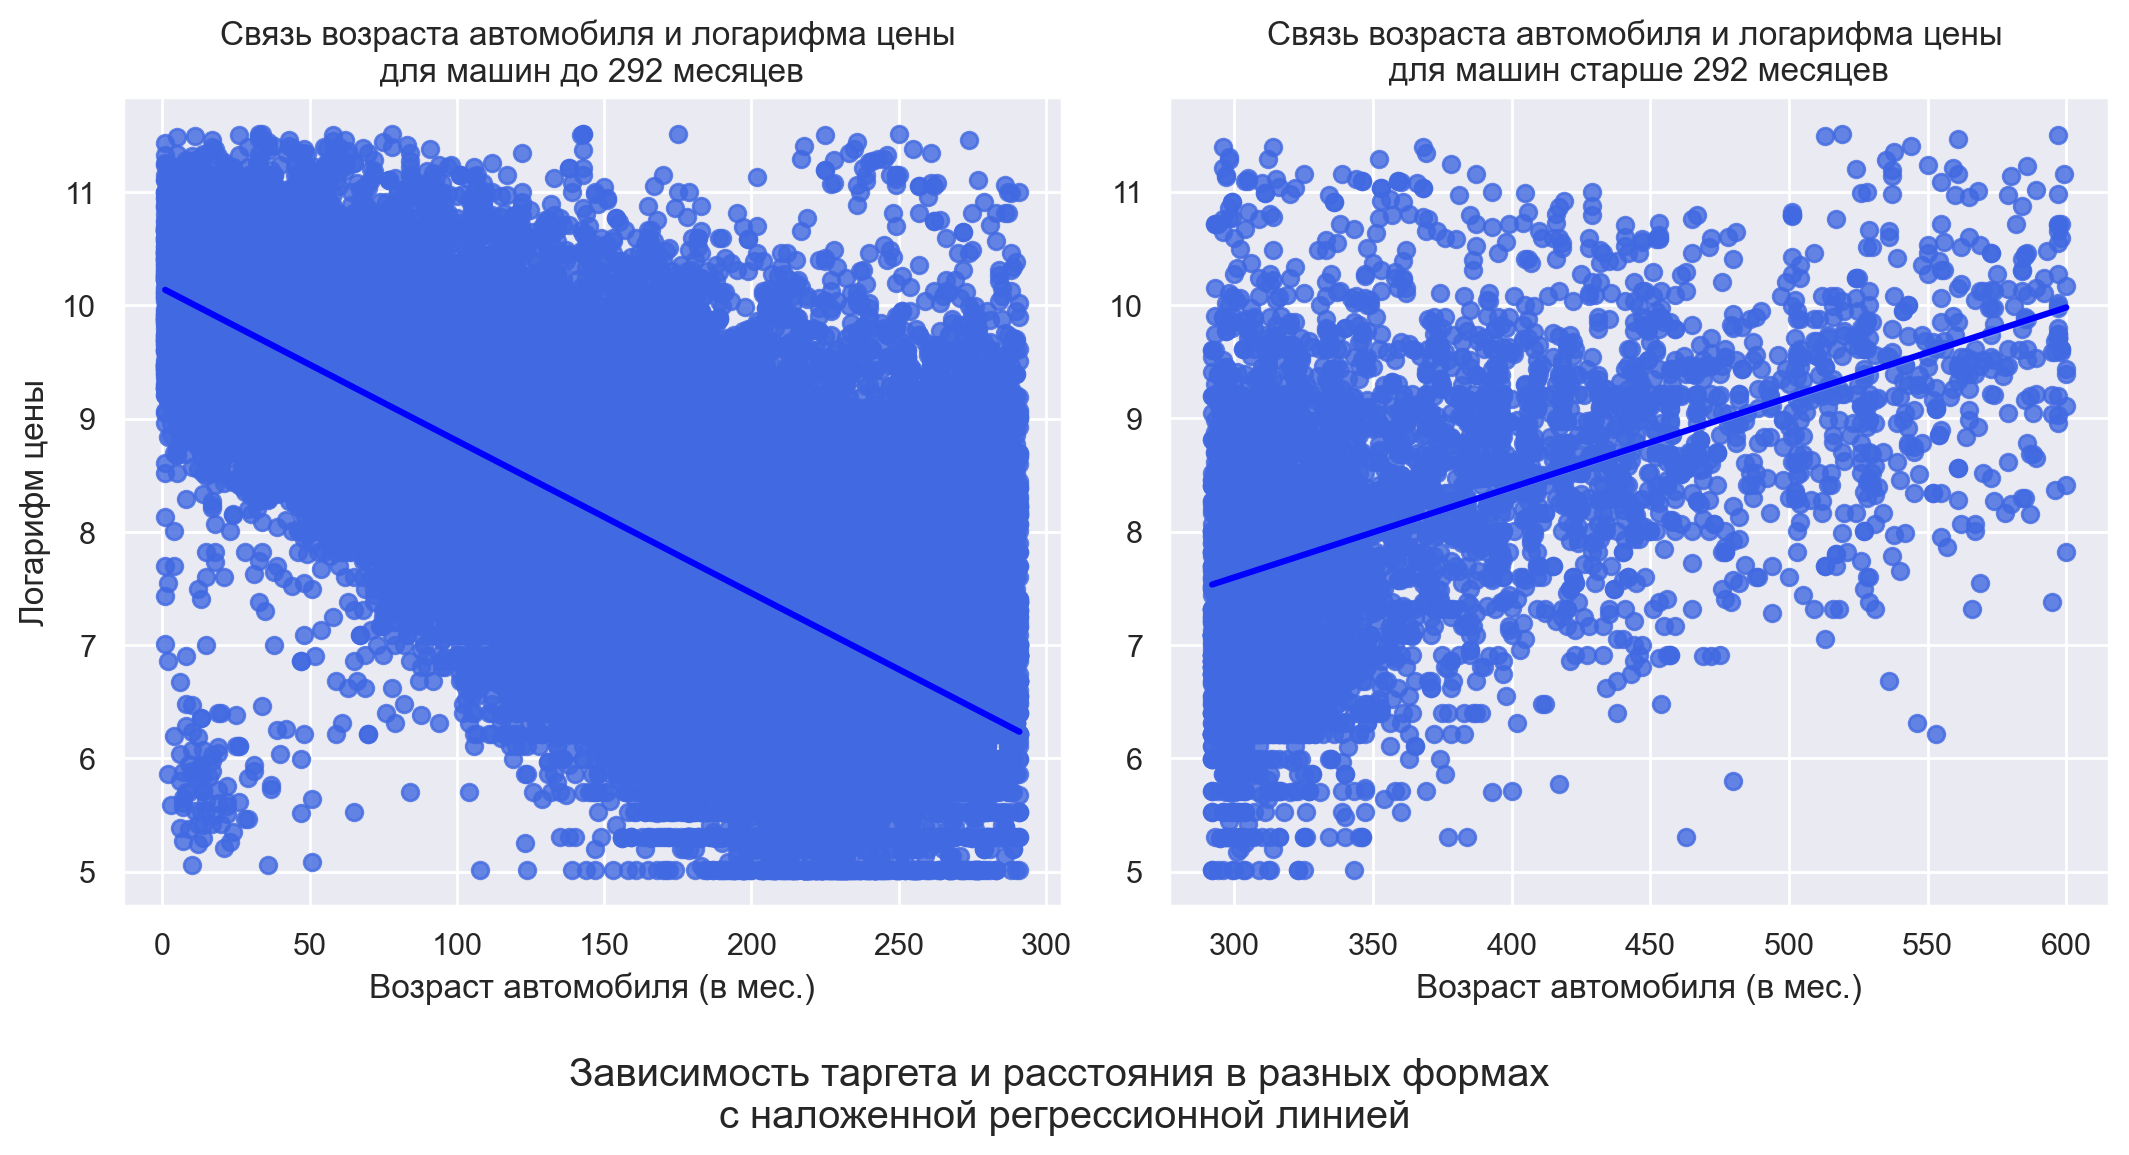

In [403]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6.5))

sns.regplot(x='autoAgeMonths', y='log_price', data=plot_data_mon_new, ax=axs[0], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[0].set_ylabel('Логарифм цены')
axs[0].set_xlabel('Возраст автомобиля (в мес.)')
axs[0].set_title('Связь возраста автомобиля и логарифма цены \nдля машин до 292 месяцев')

sns.regplot(x='autoAgeMonths', y='log_price', data=plot_data_mon_old, ax=axs[1], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[1].set_ylabel('')
axs[1].set_xlabel('Возраст автомобиля (в мес.)')
axs[1].set_title('Связь возраста автомобиля и логарифма цены \nдля машин старше 292 месяцев')

fig.suptitle("Зависимость таргета и расстояния в разных формах \nс наложенной регрессионной линией", y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

*Добавим квадрат возраста автомобиля в данные:*

In [23]:
X_train['autoAgeMonths_sq'] = X_train['autoAgeMonths'] ** 2
X_val['autoAgeMonths_sq'] = X_val['autoAgeMonths'] ** 2
X_test['autoAgeMonths_sq'] = X_test['autoAgeMonths'] ** 2

*Далее посмотрим на связь мощности автомобиля и логарифма его цены:*

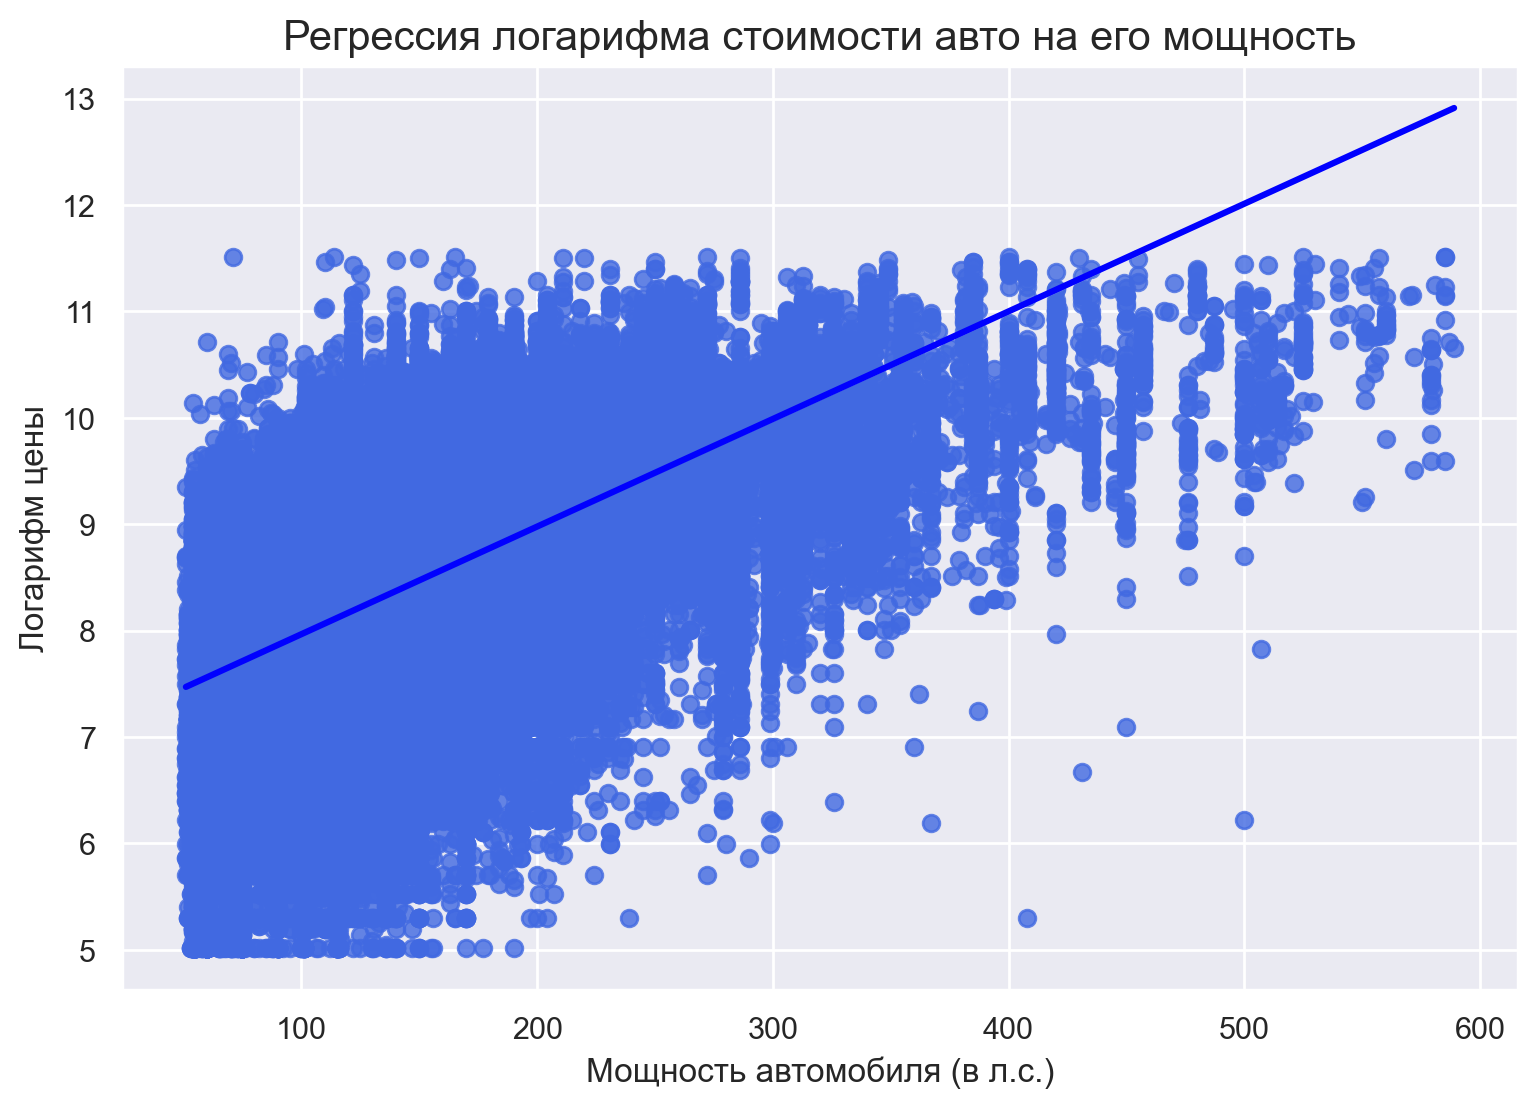

In [405]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Регрессия логарифма стоимости авто на его мощность', fontsize=15)
sns.regplot(x='powerPS', y='log_price', data=plot_data, n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
plt.xlabel('Мощность автомобиля (в л.с.)')
plt.ylabel('Логарифм цены');

Ситуация аналогичная: для больших значений мощности предсказанных значений логарифма цены нет в данных. Однако в данном случае связь не меняет знак, но ослабевает после определенного значения мощности.

Попробуем аналогично применить квадратичный эффект:

In [406]:
# создаем признаки
power_data = pd.DataFrame(plot_data['powerPS'])
power_data['powerPS_sq'] = plot_data['powerPS'] ** 2

# строим регрессию
reg = linear_model.LinearRegression()
reg.fit(power_data, y_train)

# смотрим на коэф-ты
reg.coef_

array([ 1.78795179e-02, -2.12620411e-05])

In [407]:
1.78795179e-02 / (2 * 2.12620411e-05)

420.4562914705305

Перелом случается примерно при значении **420.5 л.с.**

Иллюстрация:

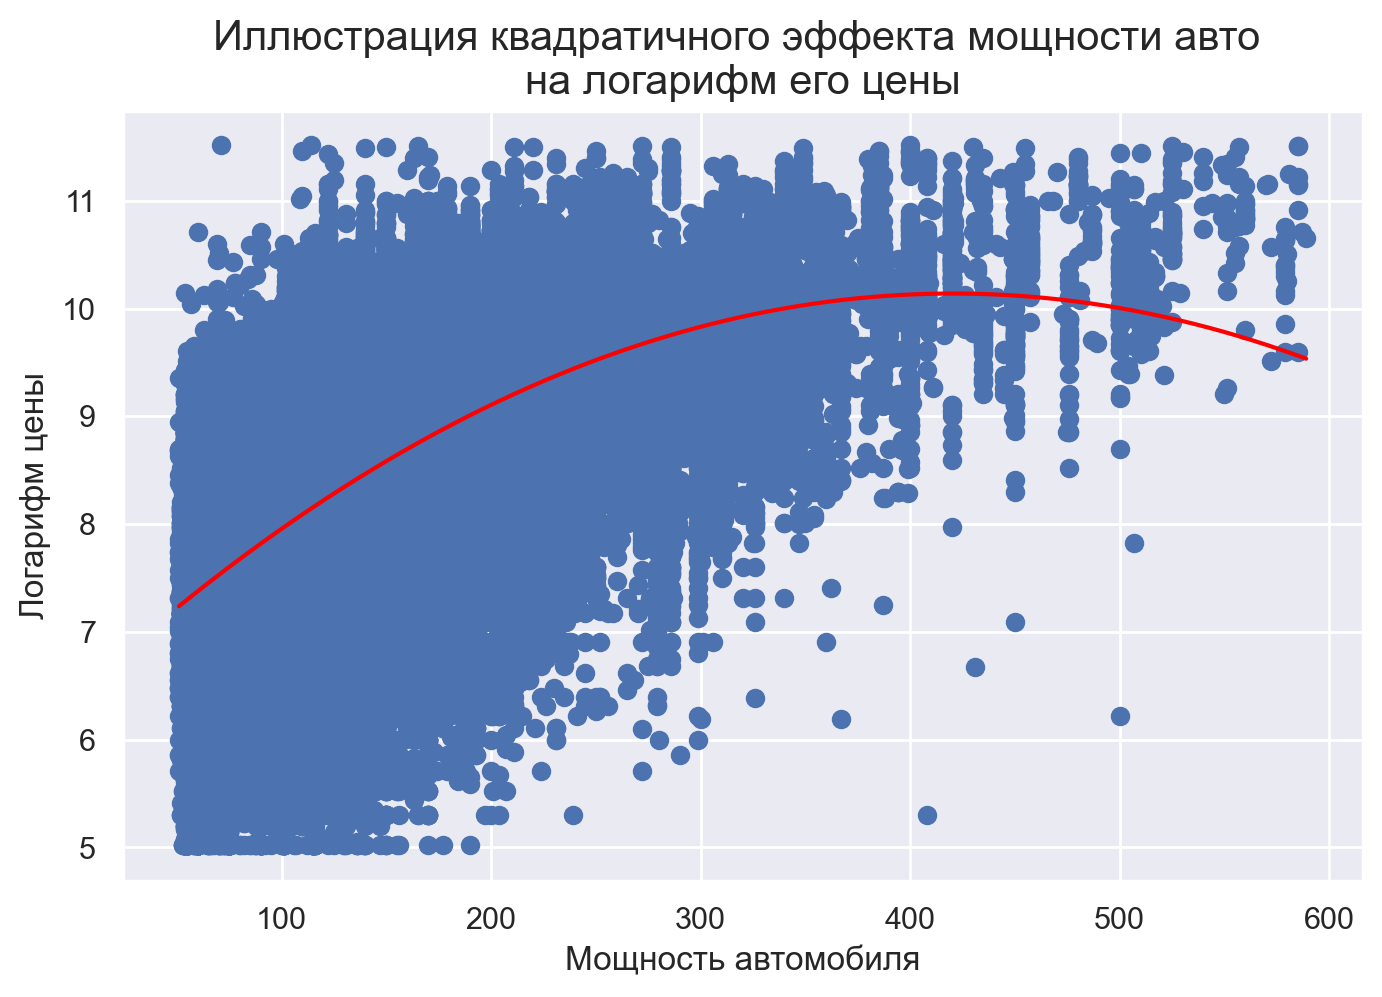

In [408]:
sint_data = np.linspace(power_data['powerPS'].min(), power_data['powerPS'].max(), 10000).reshape(-1, 1)
sint_df = pd.DataFrame(sint_data)
sint_df = sint_df.rename(columns={0: "powerPS"})
sint_df['powerPS_sq'] = sint_df['powerPS'] ** 2

y_pred_sint = reg.predict(sint_df)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Иллюстрация квадратичного эффекта мощности авто \nна логарифм его цены', fontsize=15)
plt.scatter(power_data['powerPS'], y_train) # перелом происходит в 292
plt.plot(sint_data, y_pred_sint, label="Predictions", color='red')

plt.xlabel('Мощность автомобиля')
plt.ylabel('Логарифм цены');

Выглядит не очень убедительно, все-таки эффект не меняет направление связи. Лучше добавить флаг на очень мощные автомобили, у которых будет другая связь:

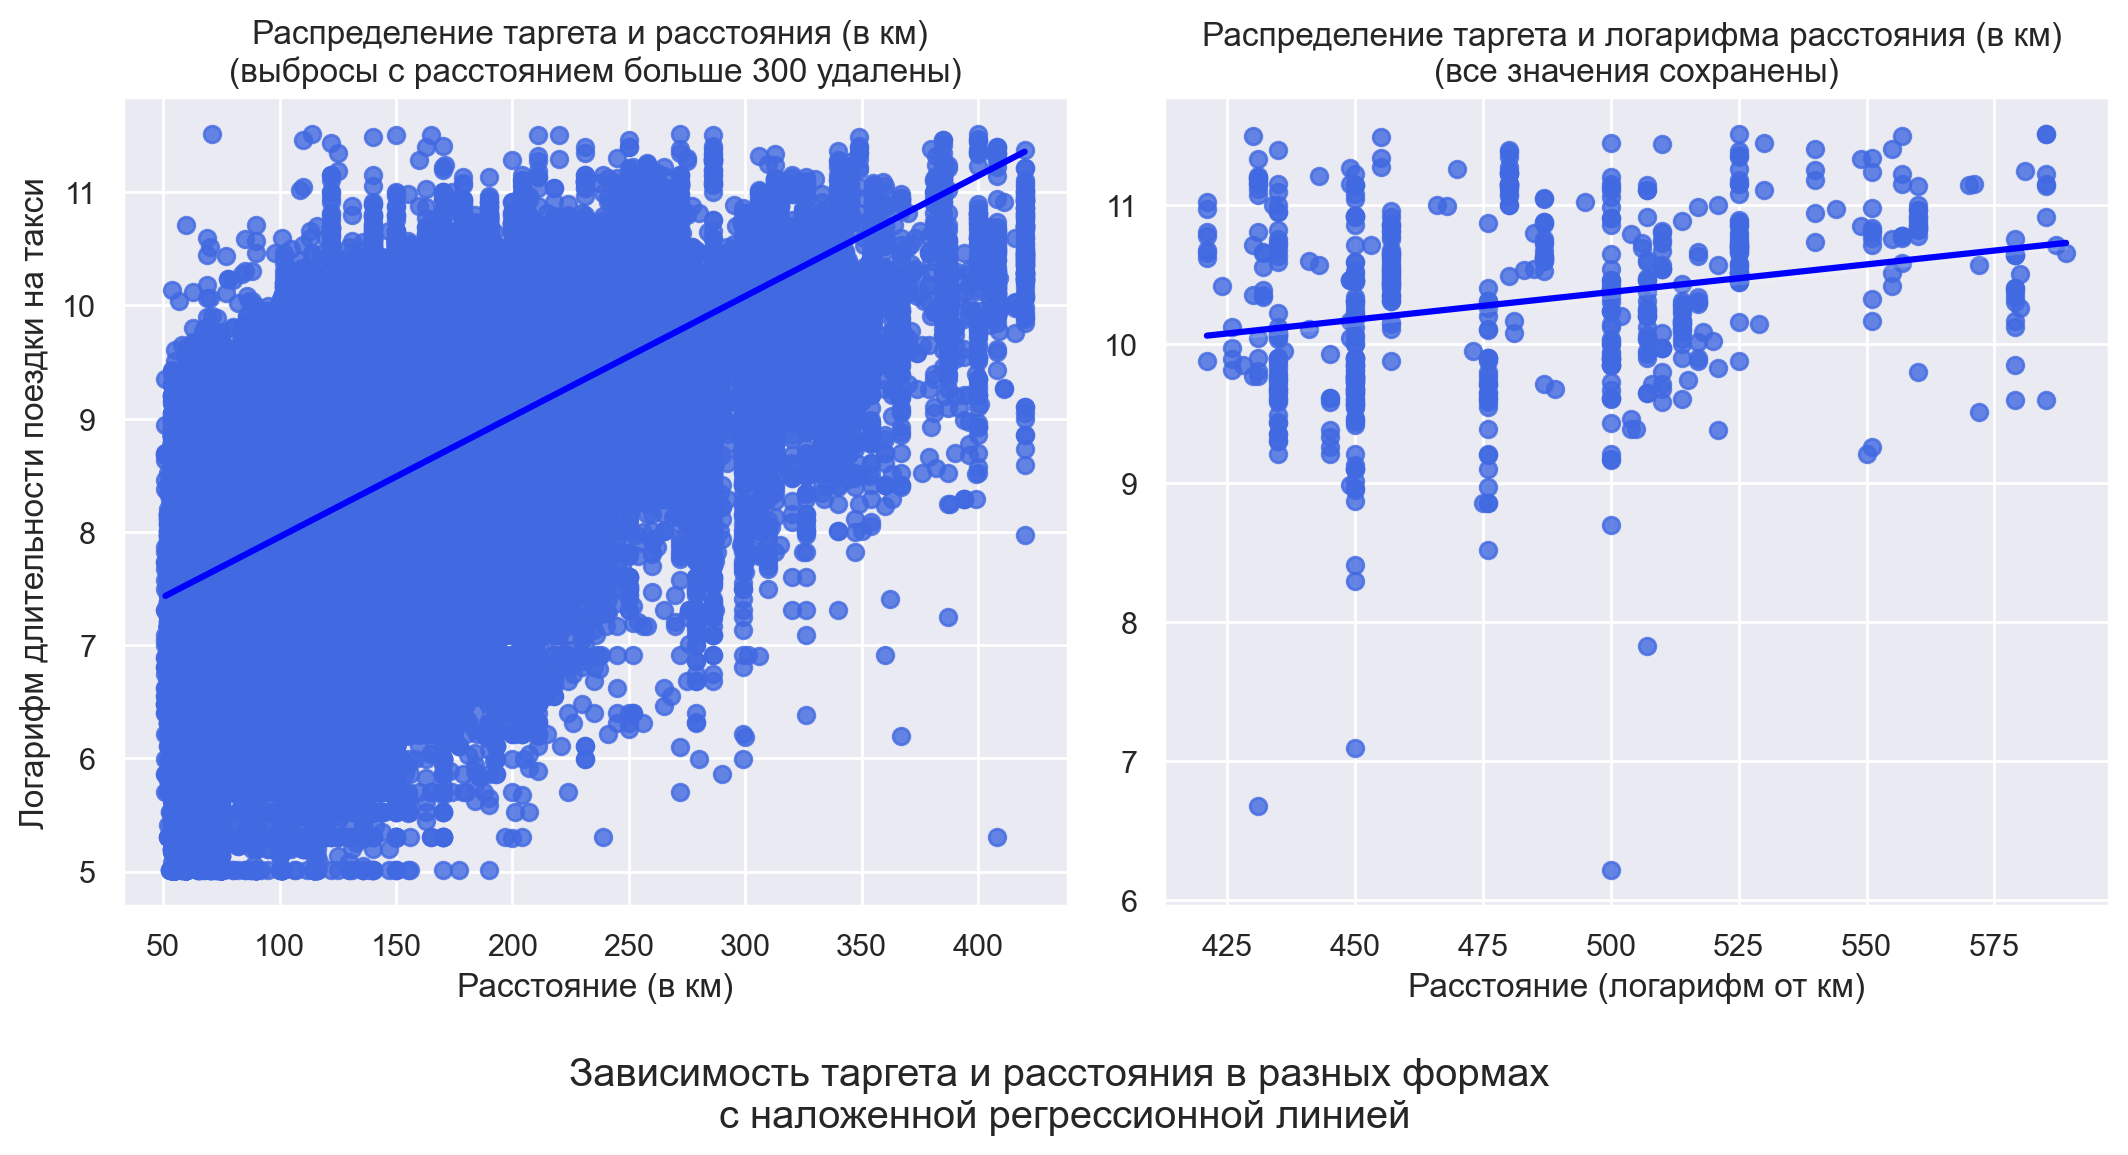

In [409]:
plot_data_1 = plot_data.loc[plot_data['powerPS'] <= 420.5]
plot_data_2 = plot_data.loc[plot_data['powerPS'] > 420.5]

fig, axs = plt.subplots(ncols=2, figsize=(12,6.5))

sns.regplot(x='powerPS', y='log_price', data=plot_data_1, ax=axs[0], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[0].set_ylabel('Логарифм длительности поездки на такси')
axs[0].set_xlabel('Расстояние (в км)')
axs[0].set_title('Распределение таргета и расстояния (в км) \n(выбросы с расстоянием больше 300 удалены)')

sns.regplot(x='powerPS', y='log_price', data=plot_data_2, ax=axs[1], n_boot=1, scatter_kws={"color": "royalblue"}, line_kws={"color": "blue"})
axs[1].set_ylabel('')
axs[1].set_xlabel('Расстояние (логарифм от км)')
axs[1].set_title('Распределение таргета и логарифма расстояния (в км) \n(все значения сохранены)')

fig.suptitle("Зависимость таргета и расстояния в разных формах \nс наложенной регрессионной линией", y=0.035)
fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

Так выглядит лучше: после значения мощности, равного 420.5 действительно кажется, что прирост в мощности уже не дает такой же прирост в логарифме цены, как раньше. Добавим соответствующий показатель в данные:

In [24]:
X_train['is_powerful'] = 0
X_val['is_powerful'] = 0
X_test['is_powerful'] = 0

X_train.loc[(X_train['powerPS'] > 420.5), 'is_powerful'] += 1
X_val.loc[(X_val['powerPS'] > 420.5), 'is_powerful'] += 1
X_test.loc[(X_test['powerPS'] > 420.5), 'is_powerful'] += 1

Теперь добавим новые признаки в списки:

In [25]:
categorical.append('is_powerful')
numeric.append('autoAgeMonths_sq')

Визуализируем связь новых признаков и таргета:

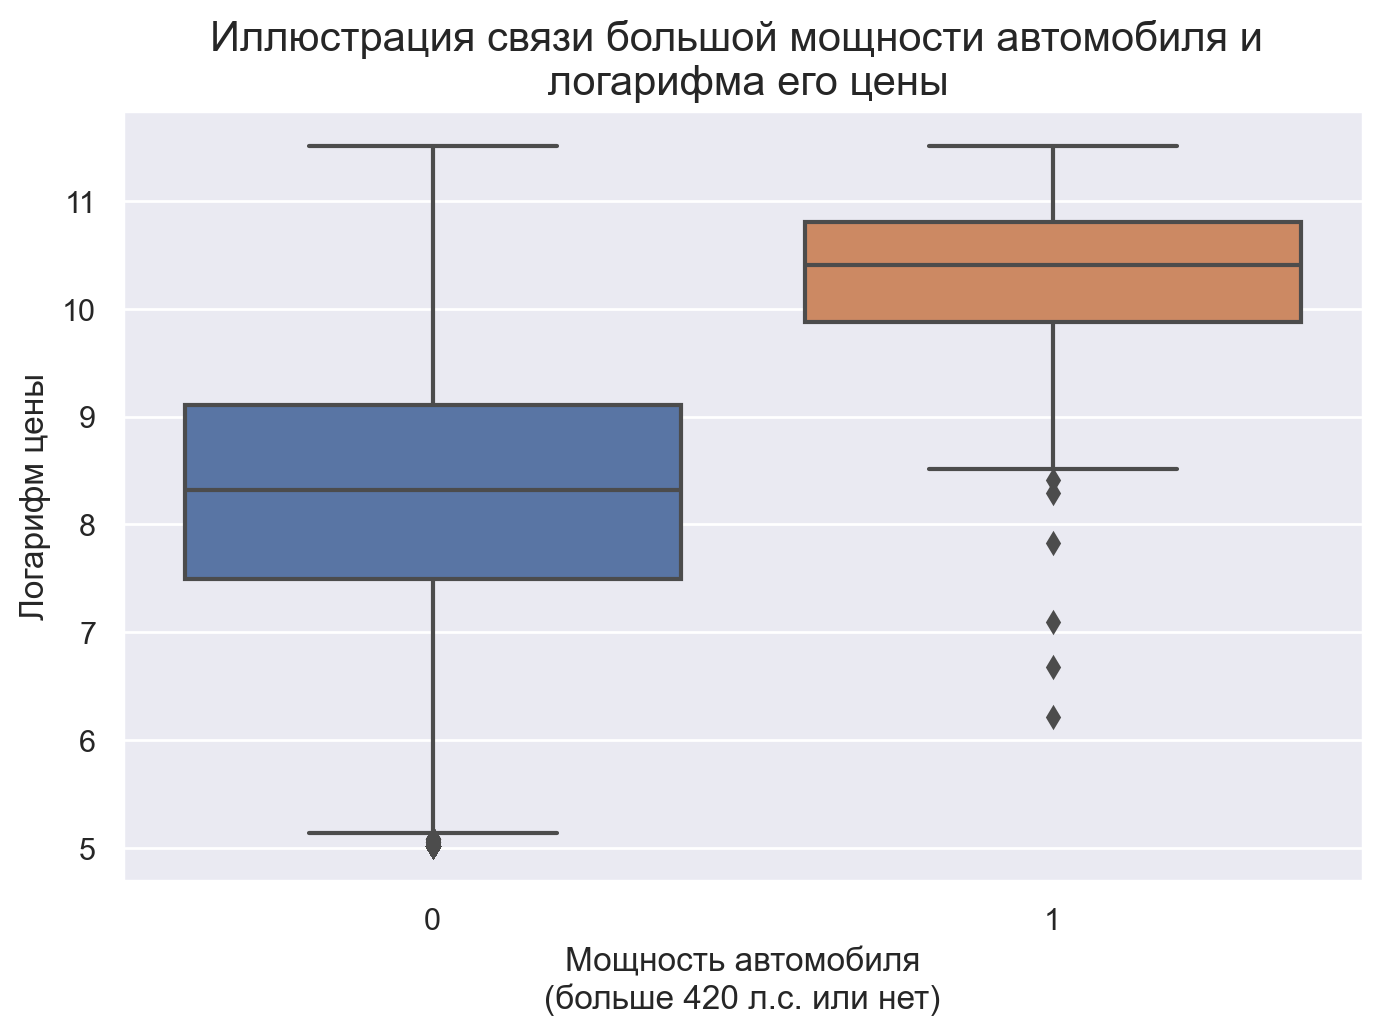

In [412]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Иллюстрация связи большой мощности автомобиля и \n логарифма его цены', fontsize=15)
sns.boxplot(data=X_train, x='is_powerful', y='log_price')

plt.xlabel('Мощность автомобиля\n(больше 420 л.с. или нет)')
plt.ylabel('Логарифм цены');

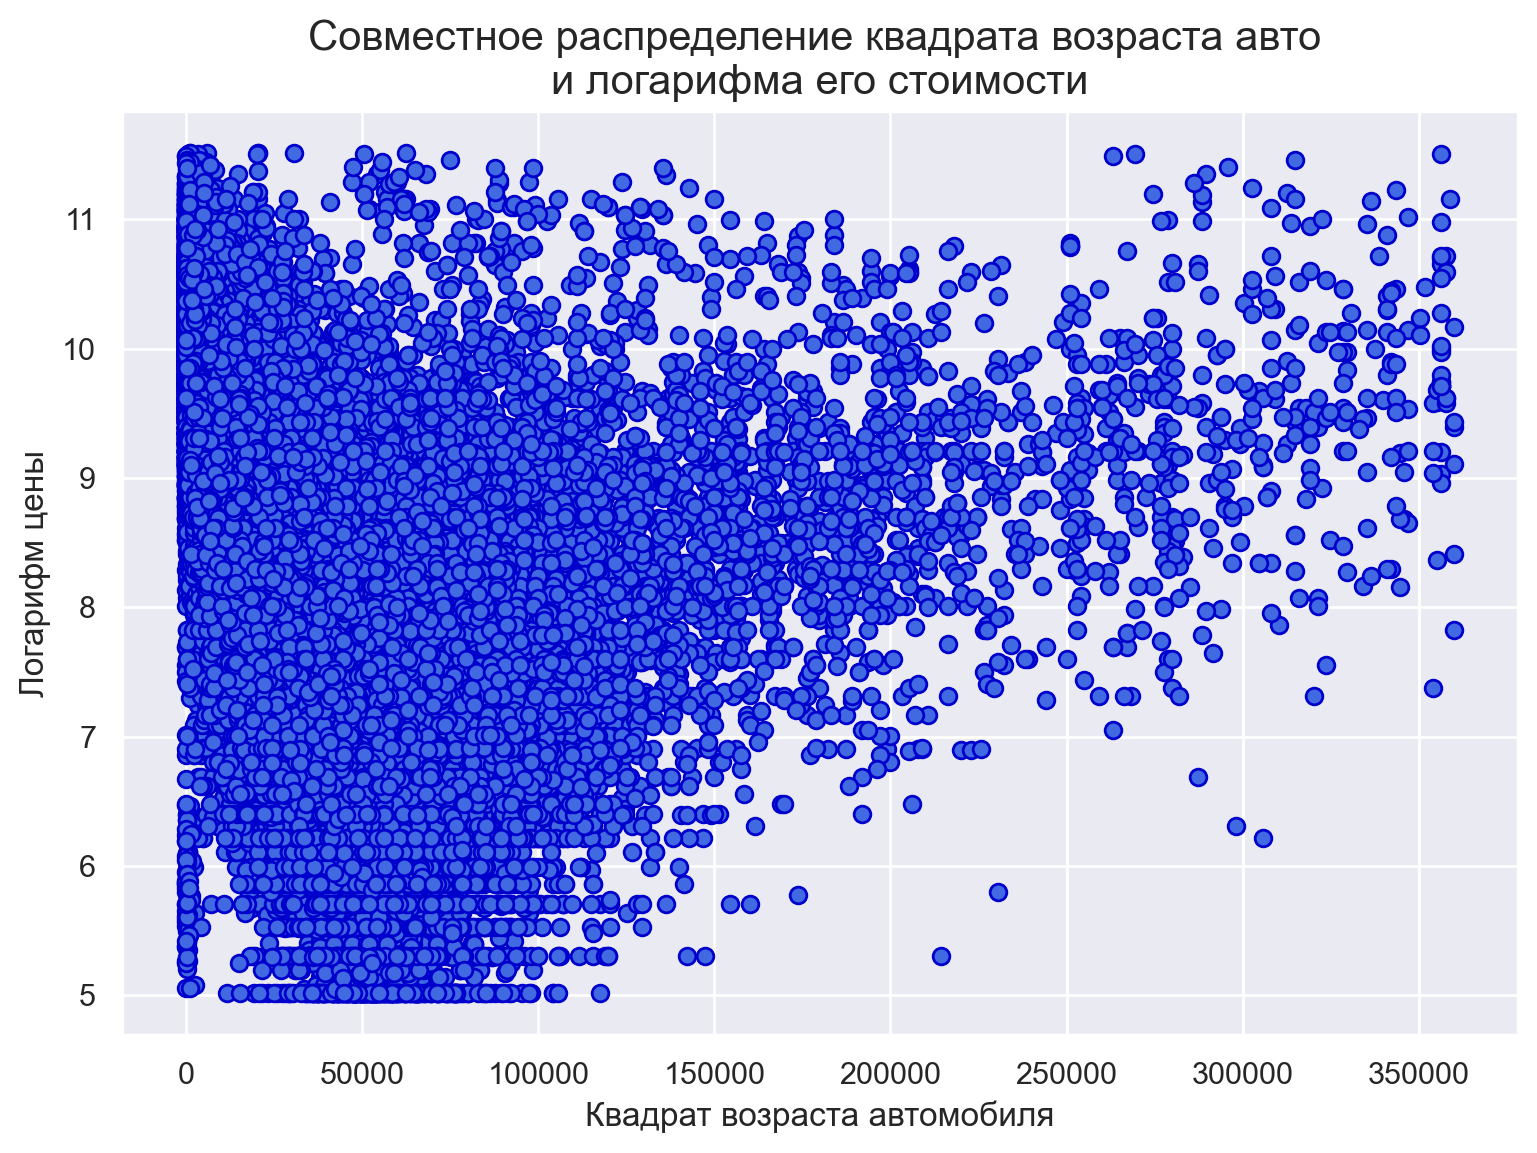

In [413]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Совместное распределение квадрата возраста авто \nи логарифма его стоимости', fontsize=15)
plt.xlabel('Квадрат возраста автомобиля')
plt.ylabel('Логарифм цены')
plt.scatter(x='autoAgeMonths_sq', y='log_price', data=X_train, c='royalblue', edgecolors='mediumblue');

Теперь определим **baseline** для модели:

In [26]:
best_constant = np.mean(y_train)
print(f'Лучшая константа: \n{round(best_constant, 2)} (натуральный логарифм), или \
    \n{round(np.expm1(best_constant), 2)} euro')

Лучшая константа: 
8.28 (натуральный логарифм), или     
3960.04 euro


In [27]:
const_pred = np.ones(y_train.shape[0]) * best_constant
const_RMSLE = mean_squared_error(const_pred, y_train, squared=False)

print(f'Значение метрики RMSLE на обучающей выборке при наилучшем константном предсказании: {round(const_RMSLE, 3)}')

Значение метрики RMSLE на обучающей выборке при наилучшем константном предсказании: 1.11


In [28]:
# окончательно подготовим данные

X_train = X_train.drop(['price', 'log_price'], axis='columns')

X_train['bias'] = 1
X_val['bias'] = 1
X_test['bias'] = 1

other += ['bias']

In [29]:
X_train.head()

brand   model vehicleType    gearbox fuelType notRepairedDamage  \
189294     opel   astra   limousine    manuell   benzin              nein   
221918      bmw     3er   limousine    manuell   diesel              nein   
153718    skoda   fabia       kombi    manuell   benzin              nein   
186080  porsche  andere      cabrio    manuell   benzin              nein   
222967  renault  scenic         bus  automatik   benzin              nein   

        kilometer  powerPS  autoAgeMonths  autoAgeMonths_sq  is_powerful  bias  
189294     150000       75            198             39204            0     1  
221918     150000      163            115             13225            0     1  
153718     100000      105             55              3025            0     1  
186080     150000      101            520            270400            0     1  
222967      70000      140             79              6241            0     1

In [30]:
# установим новые индексы, чтобы SGD работал без ошибок (т.к. удалили некоторые объекты)
y_train.index = range(len(y_train))
X_train.index = range(len(y_train))

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

In [32]:
X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)
X_test = column_transformer.transform(X_test)

In [33]:
X_train.shape

(192313, 325)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [34]:
# зададим размерность
dimension = X_train.shape[1]

# определим лямбды
lambdas = np.logspace(-5, 0.5, 20)
lambdas

array([1.00000000e-05, 1.94748304e-05, 3.79269019e-05, 7.38619982e-05,
       1.43844989e-04, 2.80135676e-04, 5.45559478e-04, 1.06246783e-03,
       2.06913808e-03, 4.02961132e-03, 7.84759970e-03, 1.52830673e-02,
       2.97635144e-02, 5.79639395e-02, 1.12883789e-01, 2.19839265e-01,
       4.28133240e-01, 8.33782223e-01, 1.62377674e+00, 3.16227766e+00])

In [33]:
# задаем параметры и словари-контейнеры
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'lambda_' : 'some lambda'
    }
}

iters_loss_history = {
    'full' : [], 
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : []
}

r2_scores = {
    'full' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'stochastic' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'momentum' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'adam' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }
}

mse_scores = {
    'full' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'stochastic' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'momentum' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'adam' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }
}

In [34]:
# реализуем перебор
np.random.seed(13)


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name        # перебираем методы спуска
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_    # перебираем гиперпараметры
        regression = LinearRegression(
            descent_config=descent_config                # подставляем гиперпараметры
        )
        
        # обучаем модель и считаем предсказанные значения
        regression.fit(X_train, y_train)
        y_pred_train = regression.predict(X_train)
        y_pred_val = regression.predict(X_val)
        y_pred_test = regression.predict(X_test)

        # логируем ошибку
        mse_scores[descent_name]['train'].append(mean_squared_error(y_pred_train, y_train, squared=False))
        mse_scores[descent_name]['val'].append(mean_squared_error(y_pred_val, y_val, squared=False))
        mse_scores[descent_name]['test'].append(mean_squared_error(y_pred_test, y_test, squared=False))

        # логируем метрику
        r2_scores[descent_name]['train'].append(r2_score(y_pred_train, y_train))
        r2_scores[descent_name]['val'].append(r2_score(y_pred_val, y_val))
        r2_scores[descent_name]['test'].append(r2_score(y_pred_test, y_test))

        # логируем историю лосса
        iters_loss_history[descent_name].append(regression.loss_history)

*Сохраним индексы лучших значений `lambda` и историю обучения для них:*

In [35]:
# найдем индексы лучших значений lambda
best_lambda_idx_full = np.argmin(np.array(mse_scores['full']['val']))
best_lambda_idx_stochastic = np.argmin(np.array(mse_scores['stochastic']['val']))
best_lambda_idx_momentum = np.argmin(np.array(mse_scores['momentum']['val']))
best_lambda_idx_adam = np.argmin(np.array(mse_scores['adam']['val']))

# сохраним историю лосса для них
best_lambda_full_loss = iters_loss_history['full'][best_lambda_idx_full]
best_lambda_stochastic_loss = iters_loss_history['stochastic'][best_lambda_idx_stochastic]
best_lambda_momentum_loss = iters_loss_history['momentum'][best_lambda_idx_momentum]
best_lambda_adam_loss = iters_loss_history['adam'][best_lambda_idx_adam]

Соберем значения для **лучших моделей**:

In [72]:
descent_data = {
    'name': ['full', 'stochastic', 'momentum', 'adam'], 
    'lambda': [lambdas[best_lambda_idx_full], 
               lambdas[best_lambda_idx_stochastic], 
               lambdas[best_lambda_idx_momentum], 
               lambdas[best_lambda_idx_adam]],
    'loss_test' : [mse_scores['full']['test'][best_lambda_idx_full], 
                   mse_scores['stochastic']['test'][best_lambda_idx_stochastic], 
                   mse_scores['momentum']['test'][best_lambda_idx_momentum], 
                   mse_scores['adam']['test'][best_lambda_idx_adam]],
    'r2_test' : [r2_scores['full']['test'][best_lambda_idx_full], 
                 r2_scores['stochastic']['test'][best_lambda_idx_stochastic],
                 r2_scores['momentum']['test'][best_lambda_idx_momentum],
                 r2_scores['adam']['test'][best_lambda_idx_adam]],
    'loss_train' : [mse_scores['full']['train'][best_lambda_idx_full], 
                   mse_scores['stochastic']['train'][best_lambda_idx_stochastic], 
                   mse_scores['momentum']['train'][best_lambda_idx_momentum], 
                   mse_scores['adam']['train'][best_lambda_idx_adam]],
    'r2_train' : [r2_scores['full']['train'][best_lambda_idx_full], 
                 r2_scores['stochastic']['train'][best_lambda_idx_stochastic],
                 r2_scores['momentum']['train'][best_lambda_idx_momentum],
                 r2_scores['adam']['train'][best_lambda_idx_adam]],
    'n_iters' : [len(best_lambda_full_loss),
                 len(best_lambda_stochastic_loss),
                 len(best_lambda_momentum_loss),
                 len(best_lambda_adam_loss)]
    }

descent_df = pd.DataFrame.from_dict(descent_data)

Теперь это можно представить в виде таблицы (напомню, **baseline** равен 1.11 (RMSLE)):

In [73]:
descent_df

name    lambda  loss_test   r2_test  loss_train  r2_train  n_iters
0        full  0.833782   0.615590  0.622064    0.543194  0.704458       50
1  stochastic  0.428133   0.609448  0.657743    0.538368  0.733583      171
2    momentum  0.833782   0.548546  0.710450    0.468240  0.787031      128
3        adam  1.623777   0.516442  0.744931    0.435799  0.816650      146

Небольшая попытка визуализации траектории изменения ошибки:

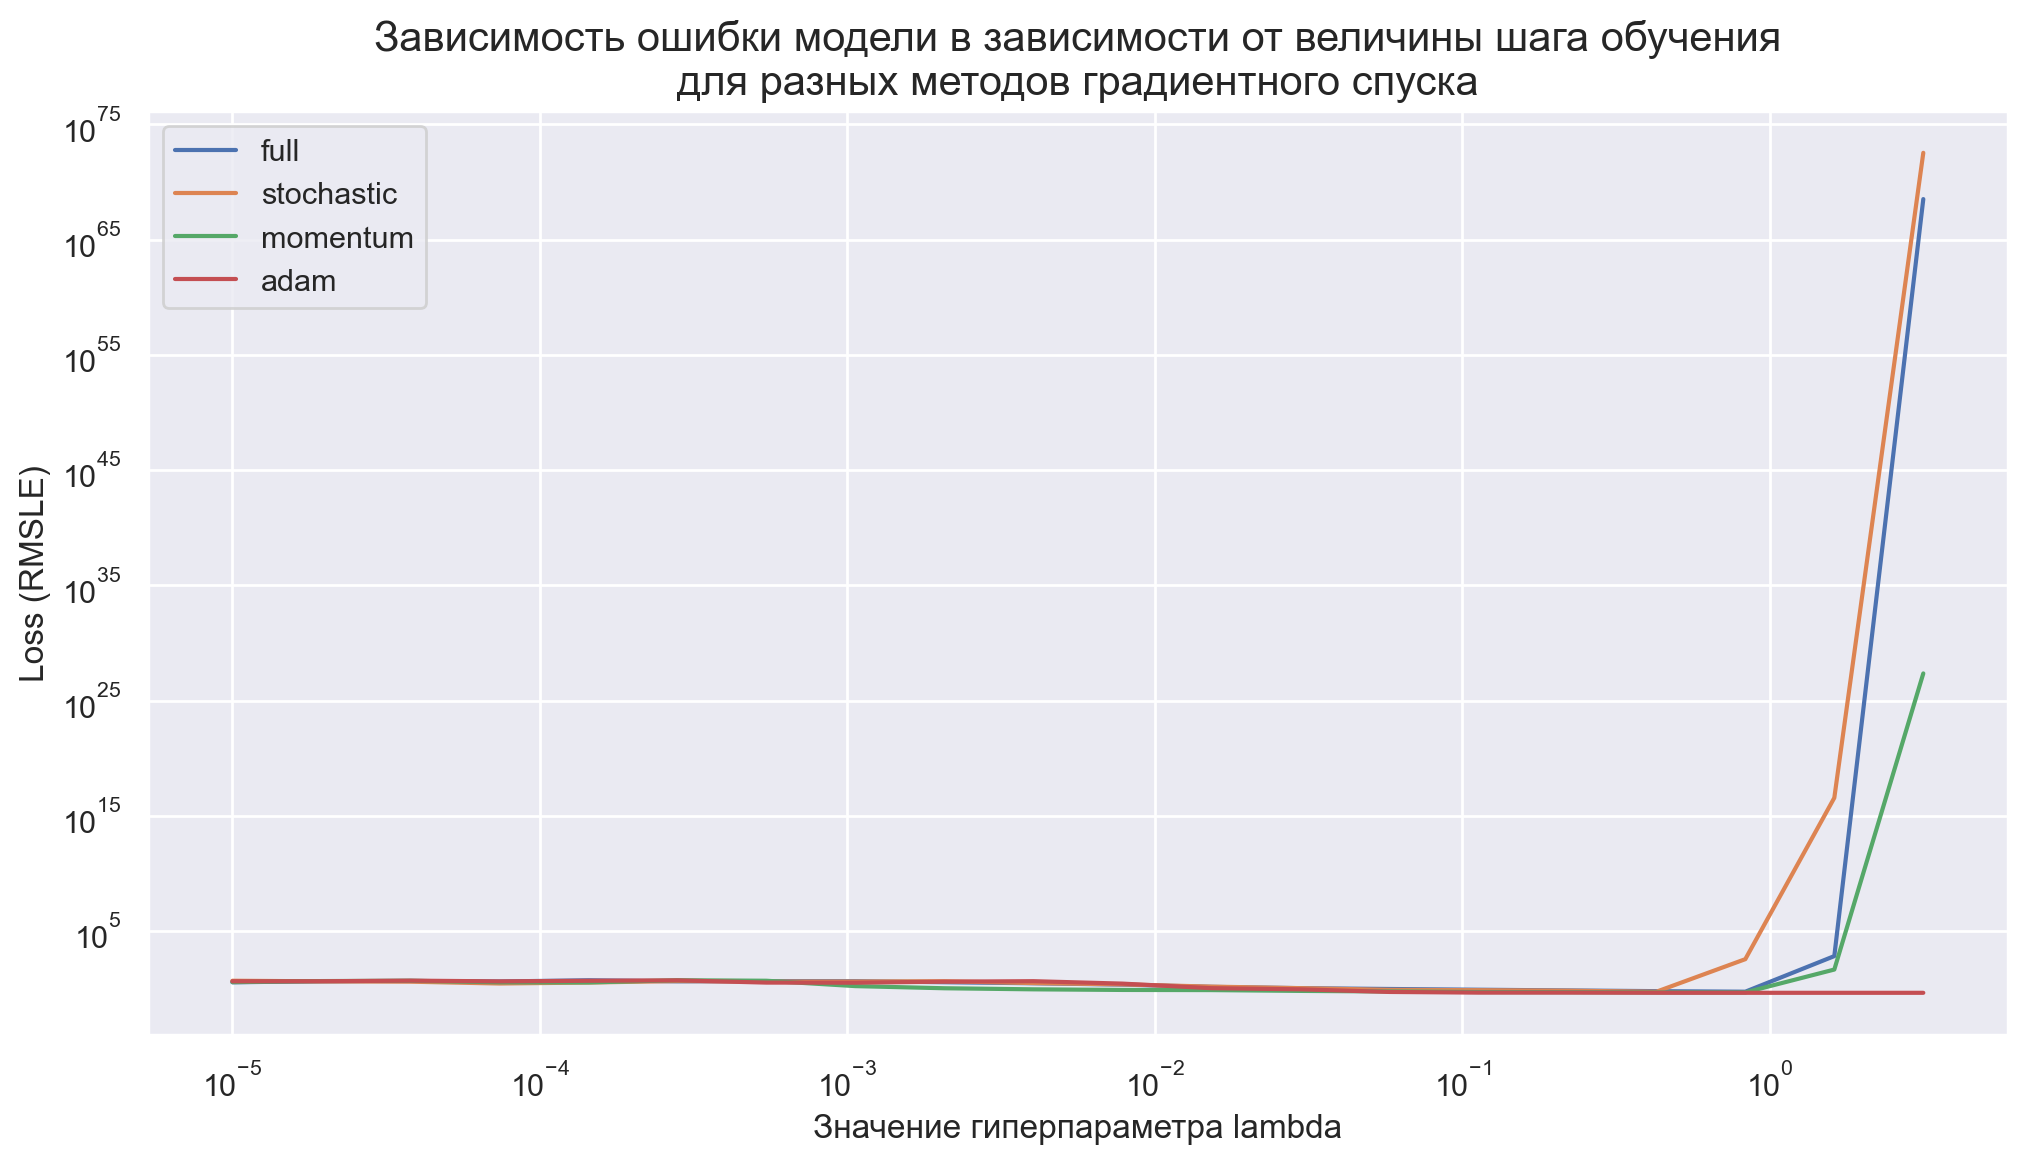

In [290]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Зависимость ошибки модели в зависимости от величины шага обучения\nдля разных методов градиентного спуска', fontsize=15)

plt.plot(lambdas, mse_scores['full']['train'], label = 'full')
plt.plot(lambdas, mse_scores['stochastic']['train'], label = 'stochastic')
plt.plot(lambdas, mse_scores['momentum']['train'], label = 'momentum')
plt.plot(lambdas, mse_scores['adam']['train'], label = 'adam')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Значение гиперпараметра lambda')
plt.ylabel('Loss (RMSLE)')
plt.legend();

Интересно, что `Adam` устойчив к большому значению `lambda`. Возможно даже, что оптимальное значение шага обучения для него может быть больше.

Далее визуализируем метрику $R^2$ (правда это может быть не очень информативно, т.к. у плохих моделей он становится очень большим отрицательным):

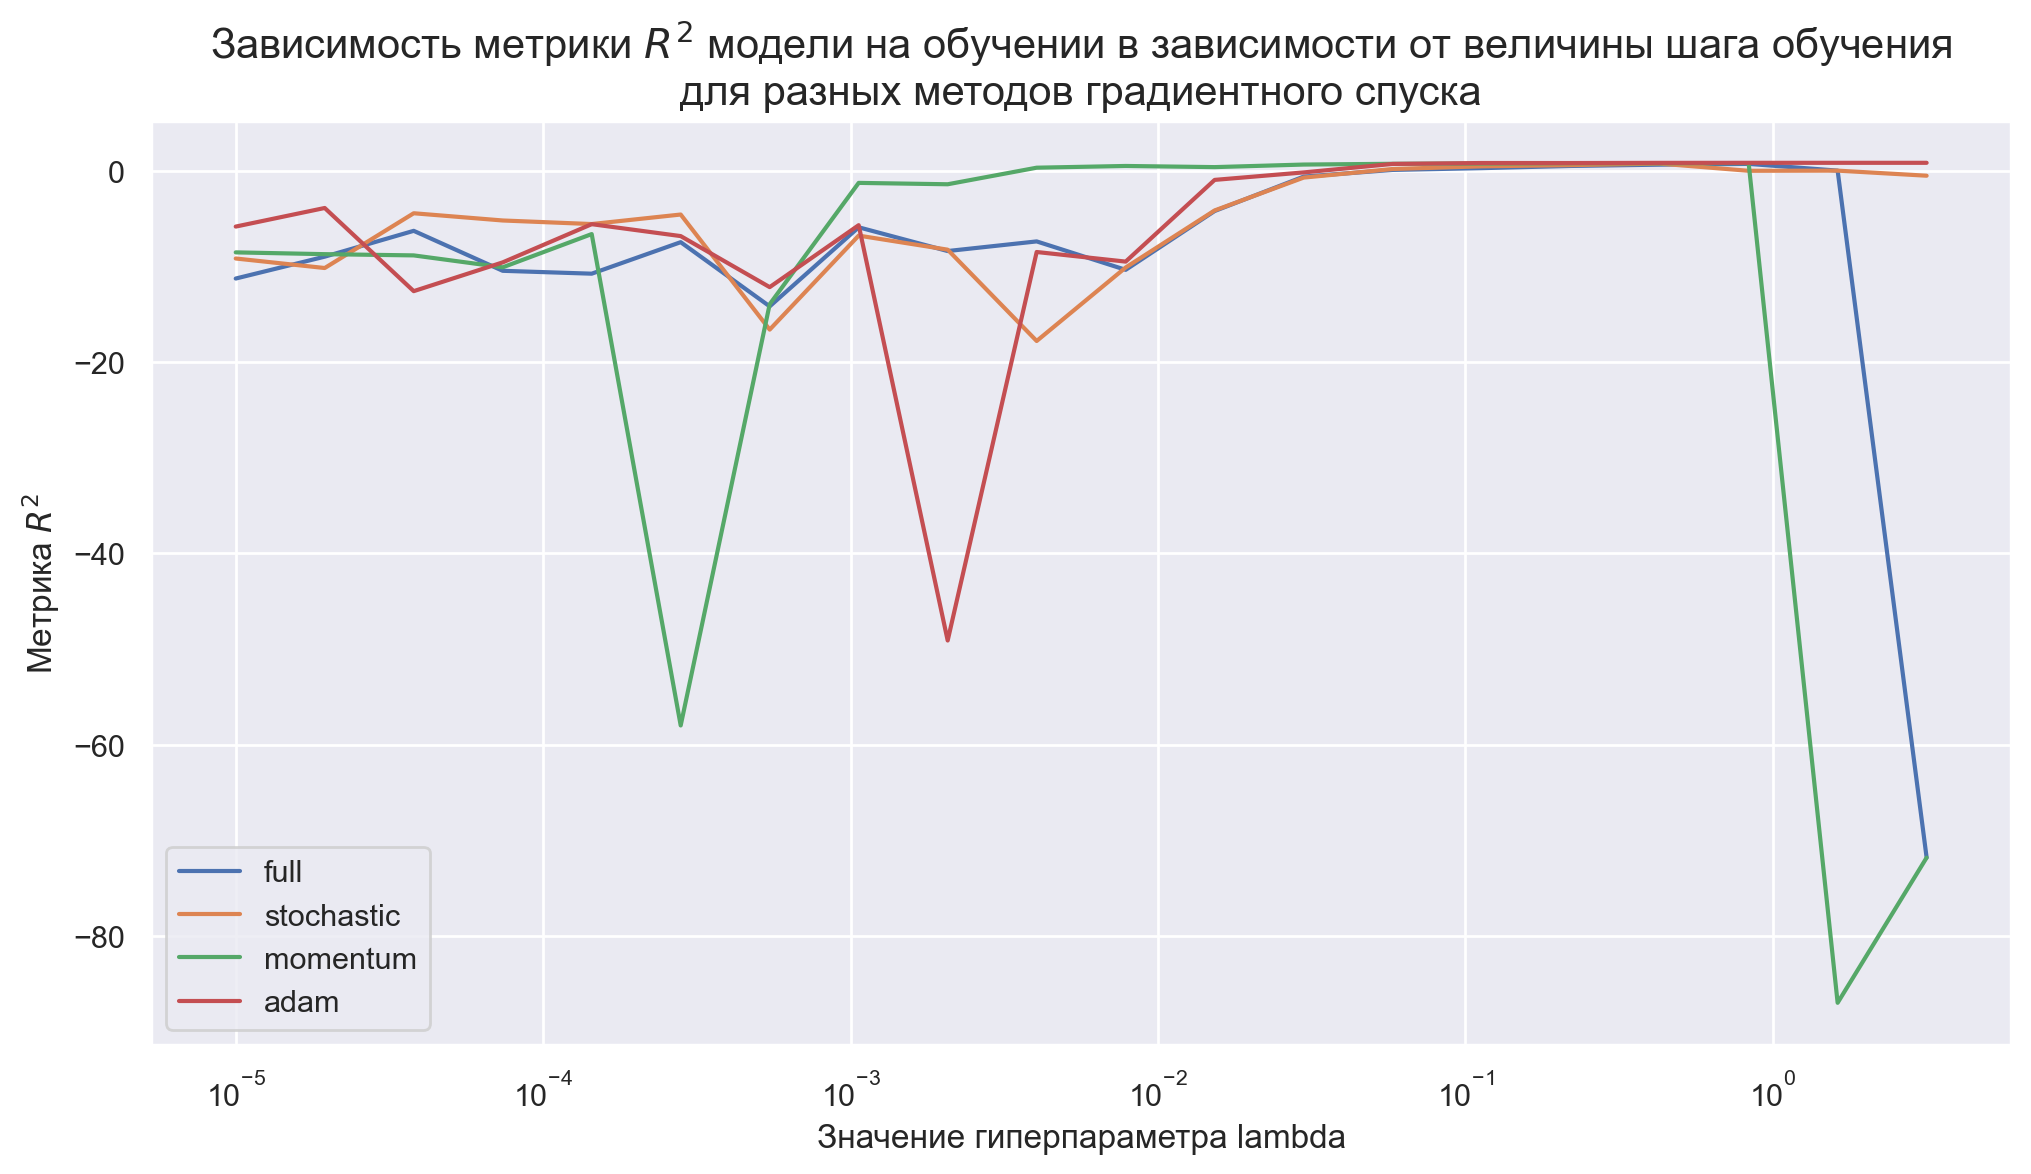

In [291]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Зависимость метрики $R^2$ модели на обучении в зависимости от величины шага обучения\nдля разных методов градиентного спуска', fontsize=15)

plt.plot(lambdas, r2_scores['full']['train'], label = 'full')
plt.plot(lambdas, r2_scores['stochastic']['train'], label = 'stochastic')
plt.plot(lambdas, r2_scores['momentum']['train'], label = 'momentum')
plt.plot(lambdas, r2_scores['adam']['train'], label = 'adam')
plt.xscale('log')
plt.xlabel('Значение гиперпараметра lambda')
plt.ylabel('Метрика $R^2$')
plt.legend();

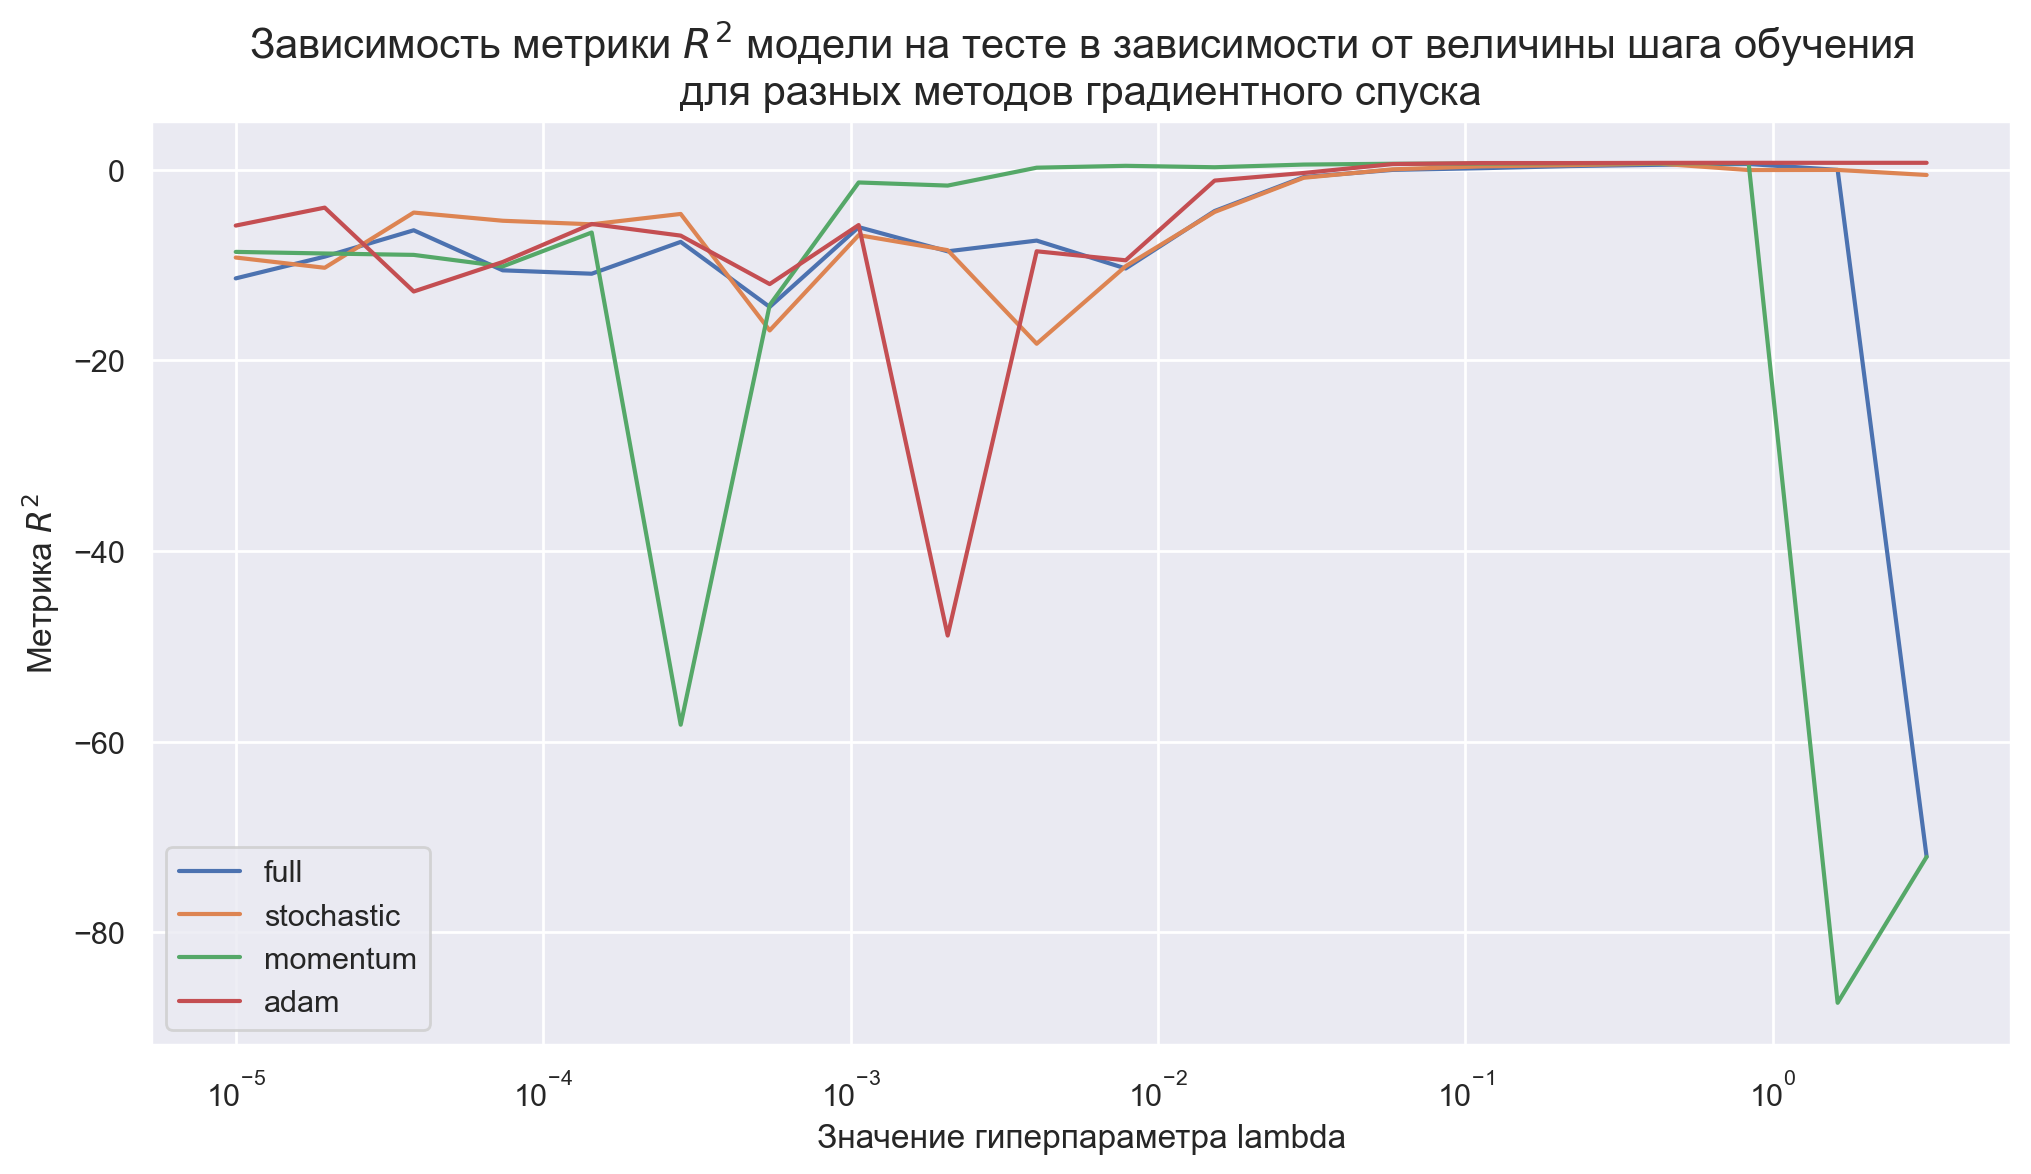

In [292]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Зависимость метрики $R^2$ модели на тесте в зависимости от величины шага обучения\nдля разных методов градиентного спуска', fontsize=15)

plt.plot(lambdas, r2_scores['full']['test'], label = 'full')
plt.plot(lambdas, r2_scores['stochastic']['test'], label = 'stochastic')
plt.plot(lambdas, r2_scores['momentum']['test'], label = 'momentum')
plt.plot(lambdas, r2_scores['adam']['test'], label = 'adam')
plt.xscale('log')
plt.xlabel('Значение гиперпараметра lambda')
plt.ylabel('Метрика $R^2$')
plt.legend();

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

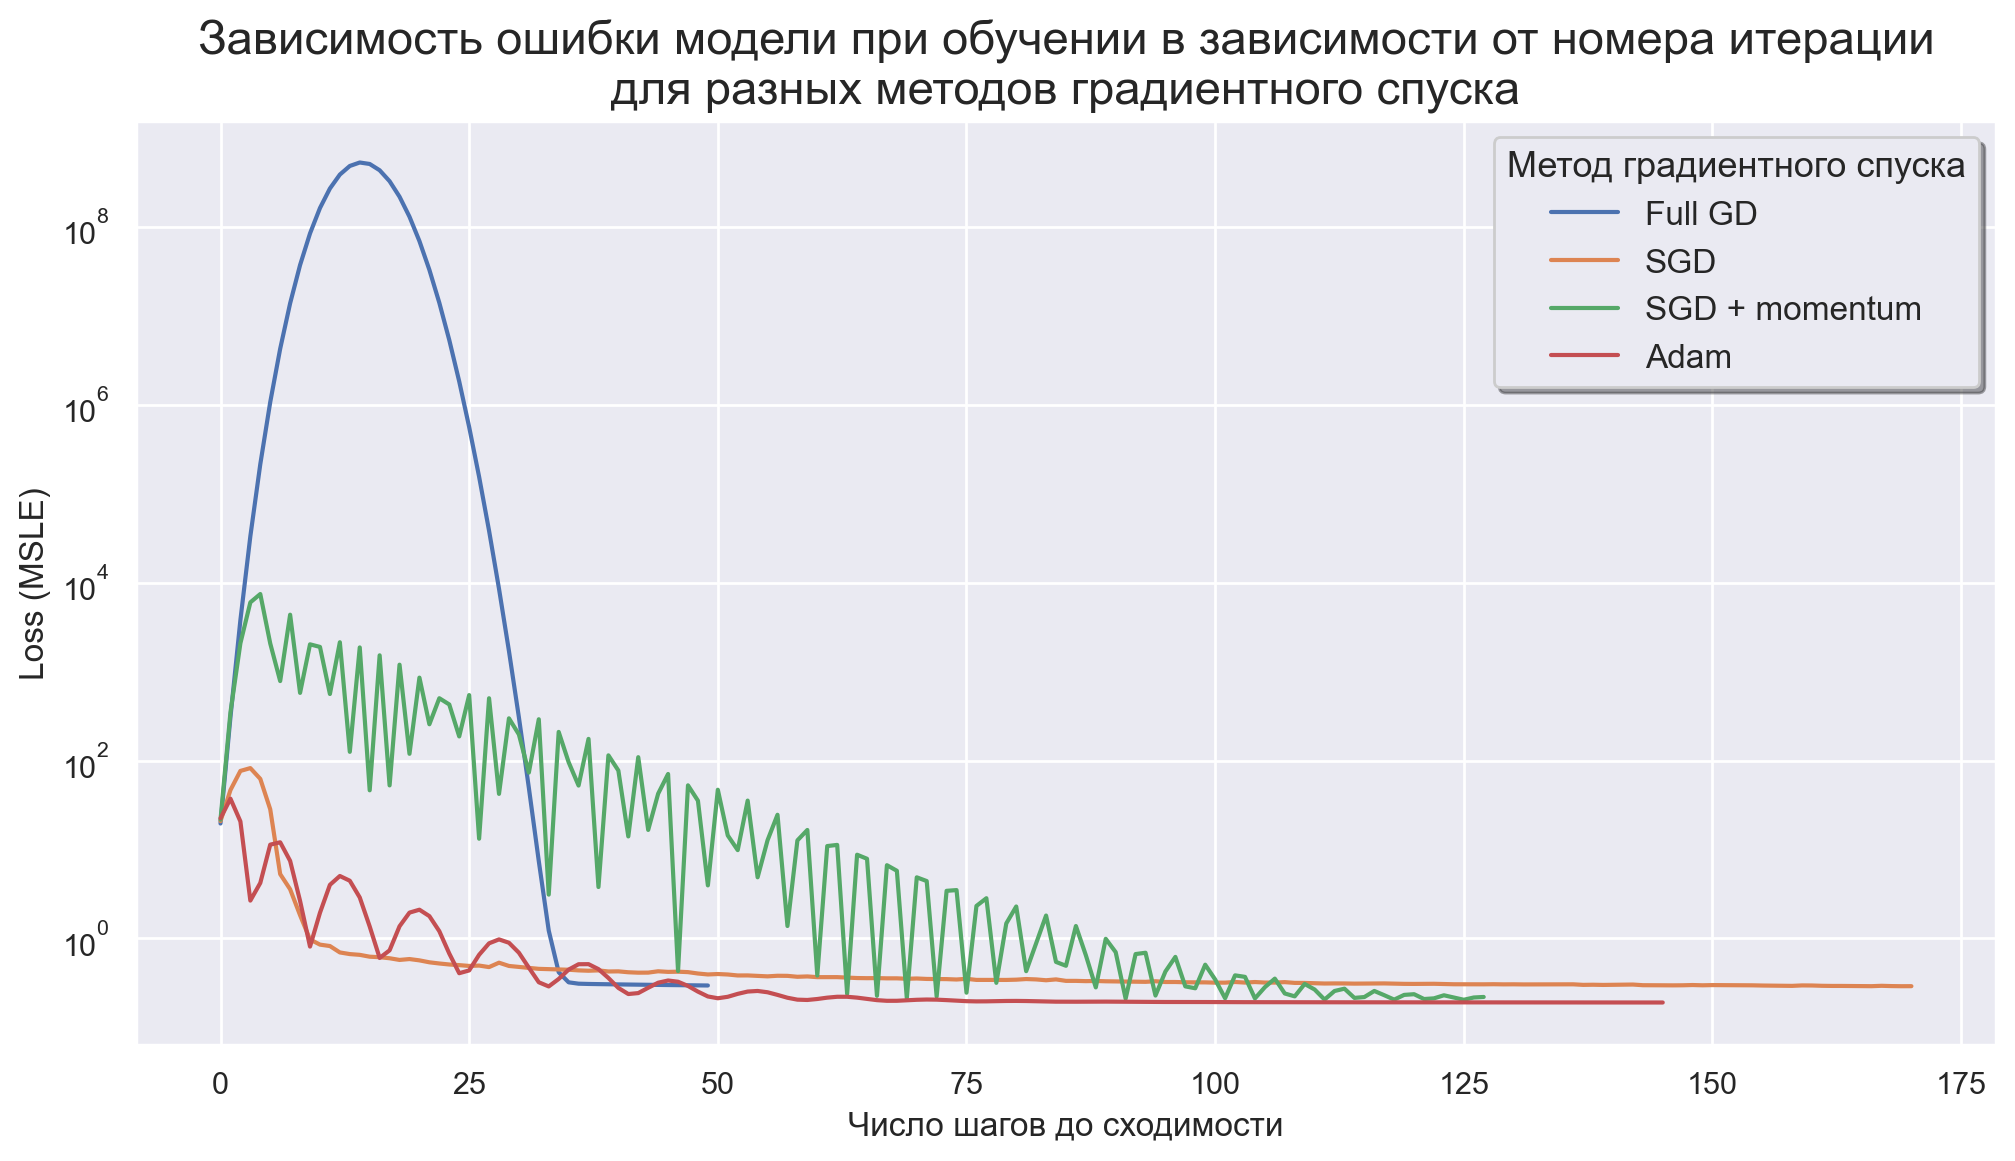

In [424]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска', fontsize=17)

plt.plot(best_lambda_full_loss)
plt.plot(best_lambda_stochastic_loss)
plt.plot(best_lambda_momentum_loss)
plt.plot(best_lambda_adam_loss)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['Full GD', 'SGD', 'SGD + momentum', 'Adam'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

Также еще раз посмотрим на таблицу с результатами "лучших моделей":

In [74]:
descent_df

name    lambda  loss_test   r2_test  loss_train  r2_train  n_iters
0        full  0.833782   0.615590  0.622064    0.543194  0.704458       50
1  stochastic  0.428133   0.609448  0.657743    0.538368  0.733583      171
2    momentum  0.833782   0.548546  0.710450    0.468240  0.787031      128
3        adam  1.623777   0.516442  0.744931    0.435799  0.816650      146

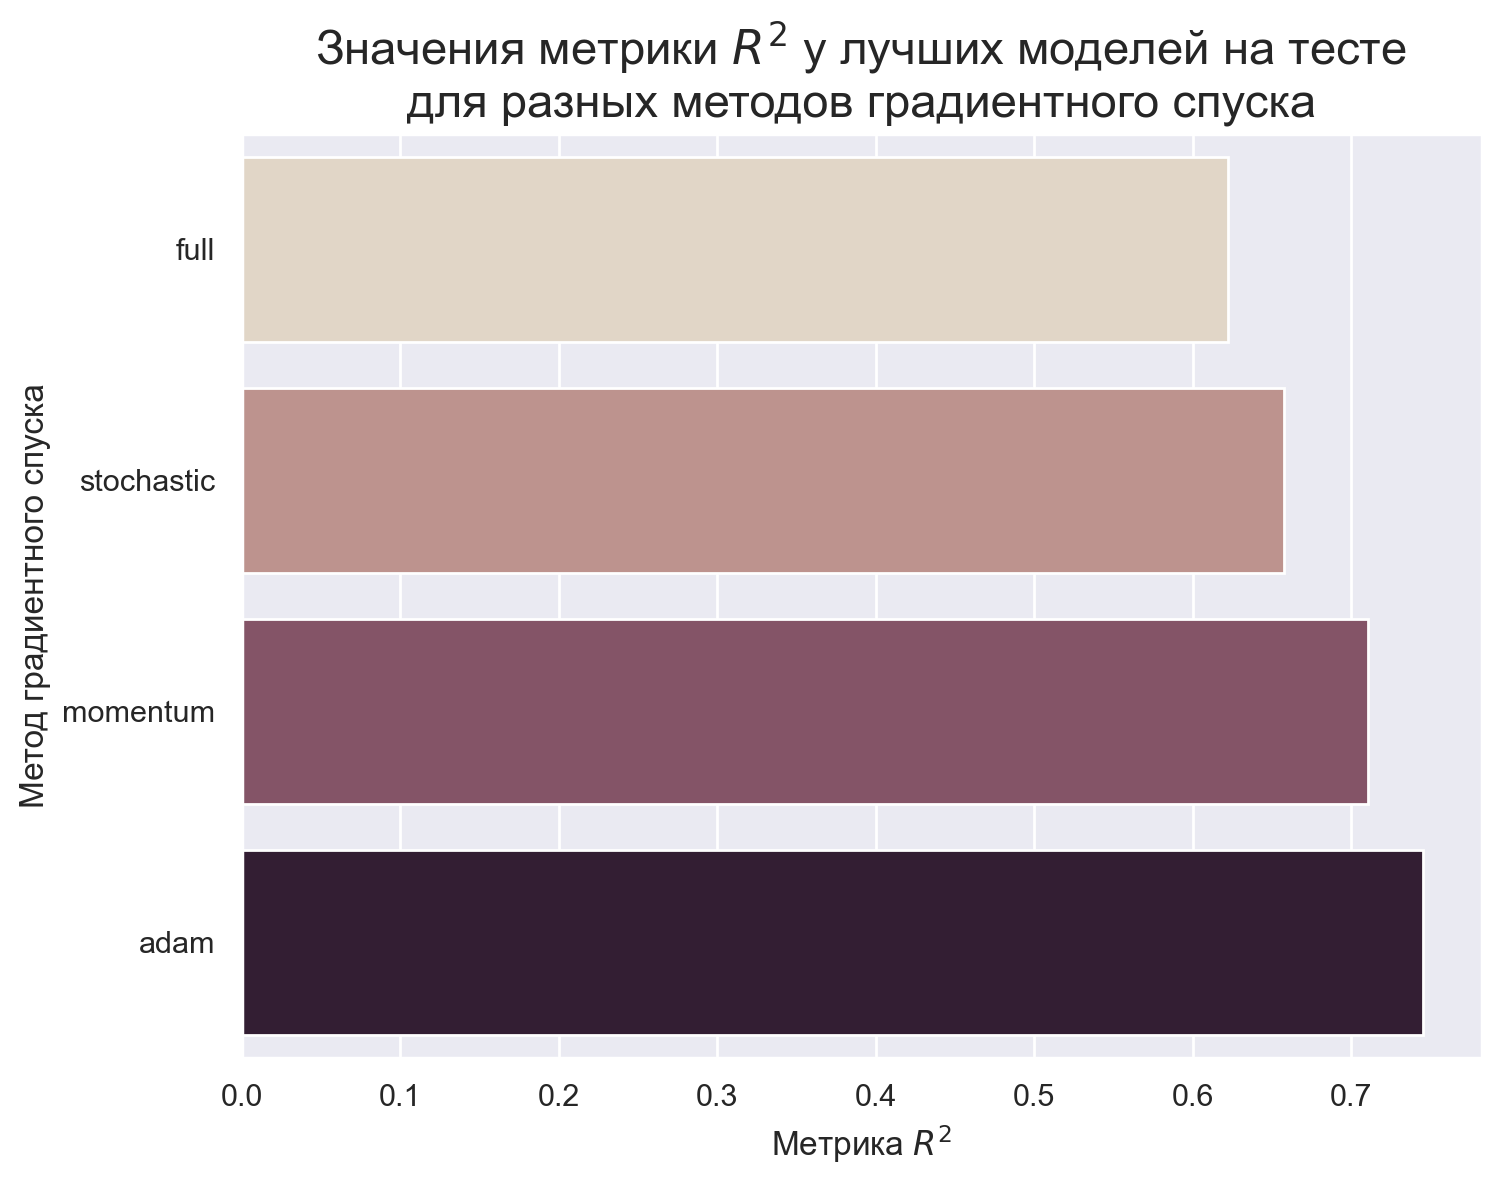

In [295]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Значения метрики $R^2$ у лучших моделей на тесте \nдля разных методов градиентного спуска', fontsize=17)

sns.barplot(x=descent_df['r2_test'], y=descent_df['name'], palette="ch:.25")

plt.xlabel('Метрика $R^2$')
plt.ylabel('Метод градиентного спуска');

Результаты соответствуют теоретическим ожиданиям:
* полный градиентый спуск `Full GD` сходится быстрее всех (50 итераций), но, понятно, что его шаги "стоят" очень дорого по времени
    * при этом именно `Full GD` перед сходимостью делает большую "просадку" по ошибке, но потом сходится очень быстро
* стохастический градиентный спуск `SGD` сходится дольше всех (171 итерация), но сами шаги стоят очень "дешево" - это точно быстрее полного ГС
    * при этом финальный результат для `SGD` хуже всех на обучающей выборке, но лучше полного ГС на тесте
    * `SGD` сходится довольно плавно, вероятно, поскольку по умолчанию размер батча равен 50 - это относительно много
* стохастический градиентный спуск с методом инерции `SGD + momentum` сходится быстрее обычного SGD: 128 против 171 (хотя при обучении его немного "шатает"), и при этом он показывает лучший результат по ошибке и метрике, чем обычный SGD, хотя по вычислительным ресурсам они практически не отличаются
* `Adam` показывает лучший результат с т.з. метрик и качества обучения, но требует довольно много итераций: 146, хотя под конец он (как и обычный SGD) выходит на плато

В целом, лучшими вариантами можно назвать Adam и SGD с momentum. Вероятно, Adam подойдет для более сложных задач, когда функционал устроен сложно, а SGD с momentum - хороший "рабочий" вариант. При этом нужно помнить, что сейчас все параметры стоят по умолчанию: в частности, это актуально для SGD (размер батча по умолч. равен 50).

Также можно отметить, что относительное ранжирование по качеству сохраняется при сравнении результатов на тестовой и обучающей выборках. На тестовых выборках ошибка и качество везде немного меньше аналогичного варианта на обуч. выборке - свидетельство переобучения.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [39]:
# лучший шаг для SGD
lambdas[best_lambda_idx_stochastic]

0.4281332398719396

In [40]:
# перебираем эти значения
batch_sizes = np.arange(5, 500, 10)

# k раз
k = 10

# задаем параметры и словари-контейнеры
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_' : lambdas[best_lambda_idx_stochastic],
        'batch_size' : 'some name'
    }
}

In [324]:
# реализуем перебор

np.random.seed(13)

# списки для результатов
time_list = []
iters_list = []

for batch_size in batch_sizes:                             # перебираем  batch_size
    descent_config['kwargs']['batch_size'] = batch_size

    n_iter = 0                                             # счетчик числа итераций
    t_time = 0                                             # счетчик времени
    for i in range(k):                                     # обучаем модель при одном batch_size k раз 
        regression = LinearRegression(
            descent_config=descent_config                  # подставляем гиперпараметры
        )
        start_time = time.process_time()                   # замеряем процессорное время для чистоты эксперимента
        regression.fit(X_train, y_train)                    
        finish_time = time.process_time()                   

        delta_time = finish_time - start_time              # считаем разницу
        t_time += delta_time                               # суммируем время
        n_iter += len(regression.loss_history)             # суммируем число итераций
    
    time_list.append(t_time / k)                           # усредняем результат
    iters_list.append(n_iter / k)                          # усредняем результат

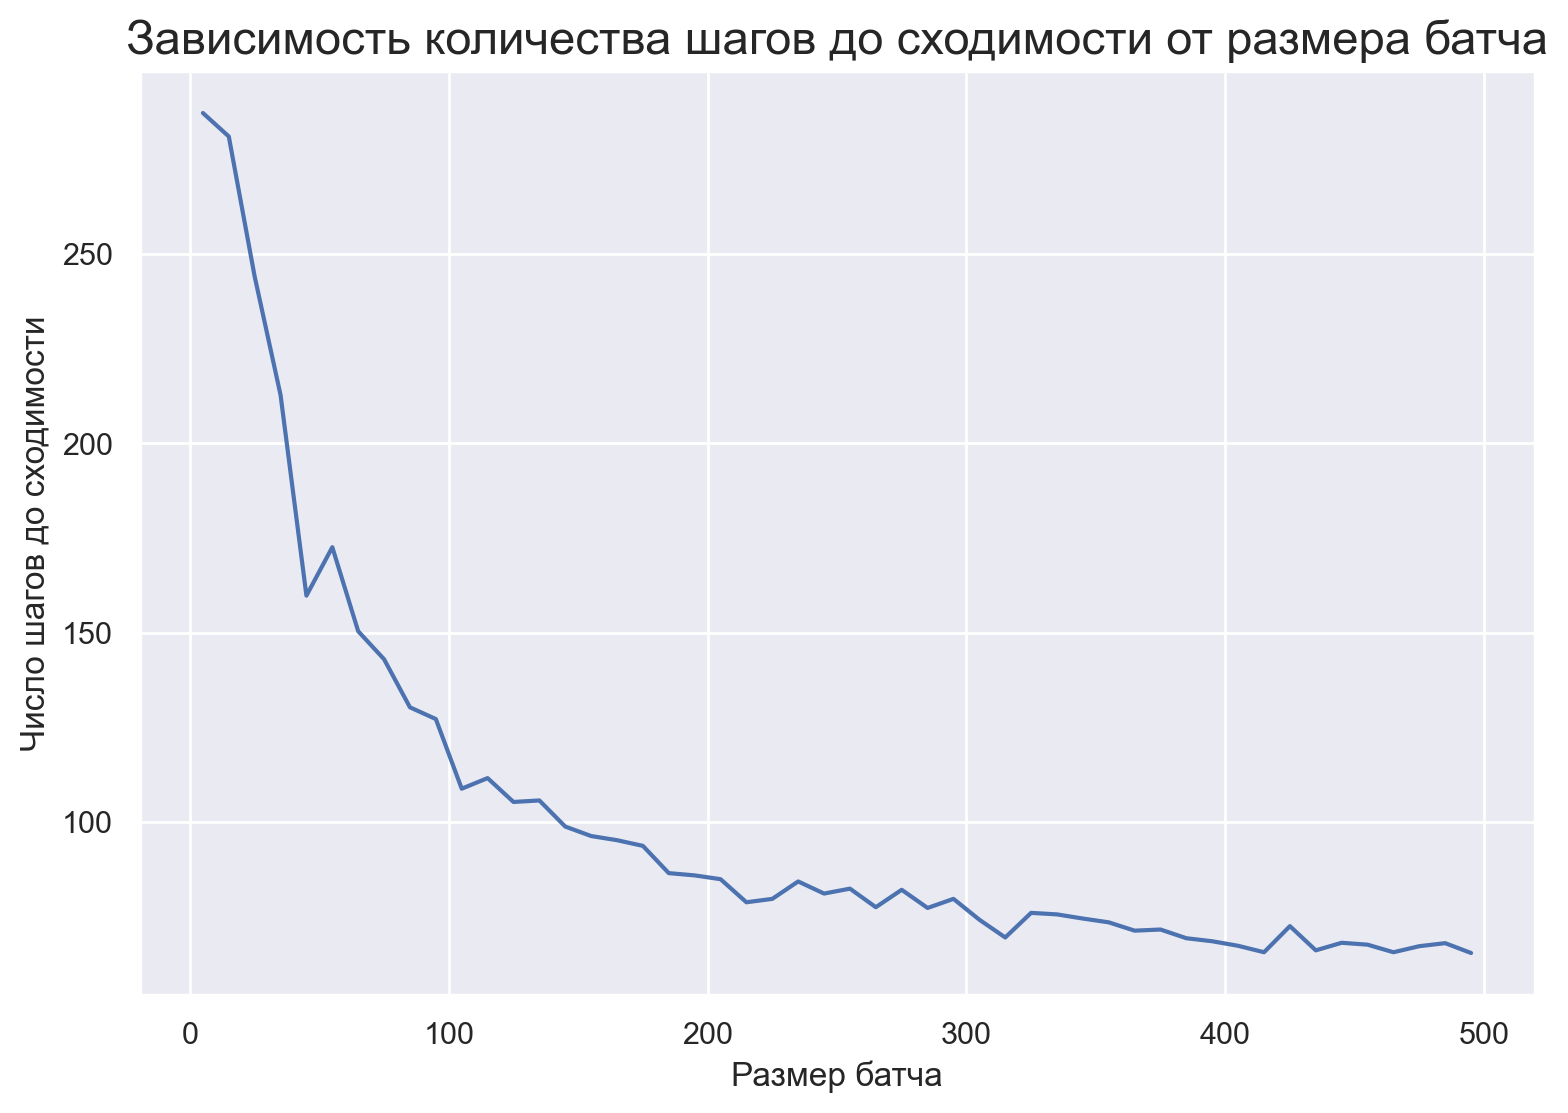

In [53]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('Зависимость количества шагов до сходимости от размера батча', fontsize=17)

plt.plot(batch_sizes, iters_list)

plt.xlabel('Размер батча')
plt.ylabel('Число шагов до сходимости');

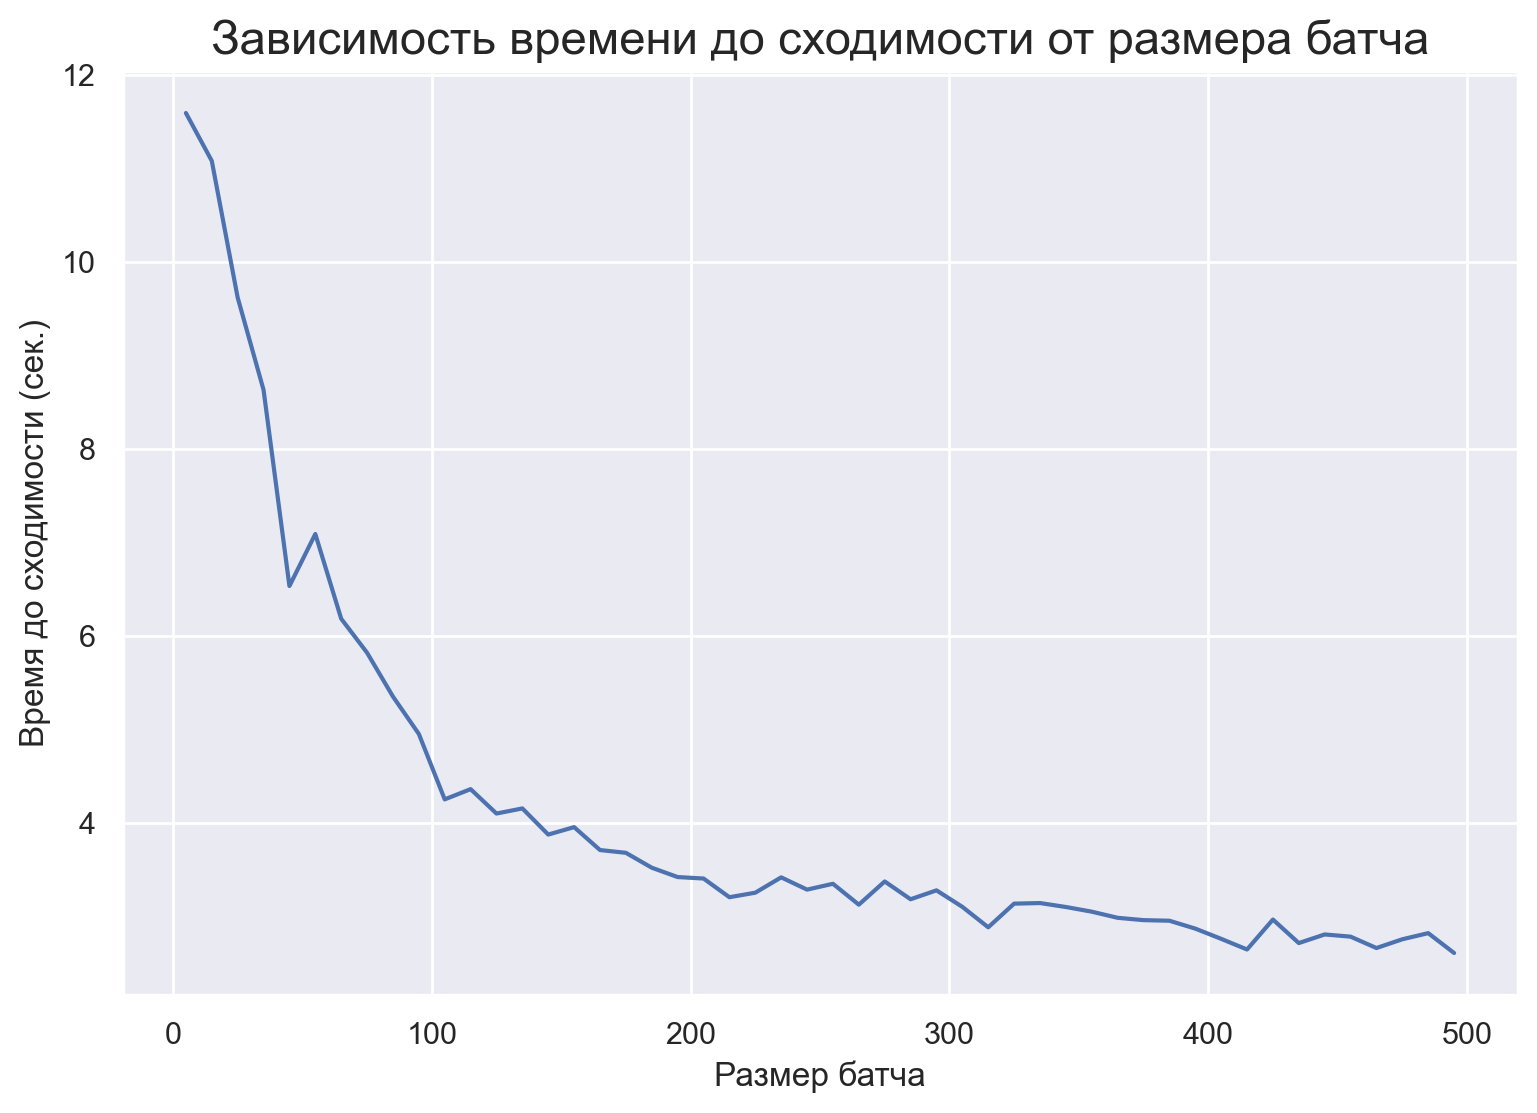

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('Зависимость времени до сходимости от размера батча', fontsize=17)

plt.plot(batch_sizes, time_list)

plt.xlabel('Размер батча')
plt.ylabel('Время до сходимости (сек.)');

Как видно, *графики очень похожи*: с ростом размера батча сокращается как число итераций до сходимости, так и время до сходимости.

Казалось бы, это не совсем очевидно: ведь с ростом размера батча нужно считать больше производных, следовательно, это должно быть дольше. Однако, на самом деле, размер батча все еще не столь критически велик (сильно меньше размера выборки - около 200 тыс.), но при этом относительно большой размер батча позволяет уверенно "шагать" в сторону оптимума! Когда батч относительно маленький (до 50) можно представить, что SGD сильно "штормит" при обучении.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/77302714/ 

Ник: **vladislav.rubanoff**

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [215]:
# зададим размерность
dimension = X_train.shape[1]

# определим такие же лямбды
# для удобства я буду перебирать значения лямбды и мю из одного массива
# в дальнейшем выяснится, что оптимальные значения находятся в этом диапазоне 
# для обоих гиперпараметров
lambdas_mus = np.logspace(-5, 0.5, 20)
lambdas_mus

array([1.00000000e-05, 1.94748304e-05, 3.79269019e-05, 7.38619982e-05,
       1.43844989e-04, 2.80135676e-04, 5.45559478e-04, 1.06246783e-03,
       2.06913808e-03, 4.02961132e-03, 7.84759970e-03, 1.52830673e-02,
       2.97635144e-02, 5.79639395e-02, 1.12883789e-01, 2.19839265e-01,
       4.28133240e-01, 8.33782223e-01, 1.62377674e+00, 3.16227766e+00])

In [216]:
# задаем параметры и словари-контейнеры
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_' : 'some lambda',
        'mu' : 'some mu'
    }
}

iters_loss_history_reg = {
    'full' : dict(), 
    'stochastic' : dict(), 
    'momentum' : dict(), 
    'adam' : dict()
}

r2_scores_reg = {
    'full' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'stochastic' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'momentum' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'adam' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }
}

mse_scores_reg = {
    'full' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'stochastic' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'momentum' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }, 
    'adam' : {
        'train' : dict(),
        'test'  : dict(),
        'val'   : dict()
    }
}

# с помощью цикла я создам списки для хранения результатов с разными mu
# при фиксированных lambda
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for i in range(20):
        iters_loss_history_reg[descent_name][i] = []

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for type in ['train', 'test', 'val']:
        for i in range(20):
            r2_scores_reg[descent_name][type][i] = []
            mse_scores_reg[descent_name][type][i] = []

In [217]:
# реализуем перебор
np.random.seed(13)


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name        # перебираем методы спуска
    i = 0                                                # индекс lambda
    for lambda_ in lambdas_mus:
        descent_config['kwargs']['lambda_'] = lambda_    # перебираем гиперпараметры lambda
        for mu in lambdas_mus:
            descent_config['kwargs']['mu'] = mu          # перебираем гиперпараметры mu
            regression = LinearRegression(
                descent_config=descent_config            # подставляем гиперпараметры
            )
            
            # обучаем модель и считаем предсказанные значения
            regression.fit(X_train, y_train)
            y_pred_train = regression.predict(X_train)
            y_pred_val = regression.predict(X_val)
            y_pred_test = regression.predict(X_test)

            # логируем ошибку
            mse_scores_reg[descent_name]['train'][i].append(mean_squared_error(y_pred_train, y_train, squared=False))
            mse_scores_reg[descent_name]['val'][i].append(mean_squared_error(y_pred_val, y_val, squared=False))
            mse_scores_reg[descent_name]['test'][i].append(mean_squared_error(y_pred_test, y_test, squared=False))

            # логируем метрику
            r2_scores_reg[descent_name]['train'][i].append(r2_score(y_pred_train, y_train))
            r2_scores_reg[descent_name]['val'][i].append(r2_score(y_pred_val, y_val))
            r2_scores_reg[descent_name]['test'][i].append(r2_score(y_pred_test, y_test))

            # логируем историю лосса
            iters_loss_history_reg[descent_name][i].append(regression.loss_history)
        i += 1

In [218]:
mse_scores_reg_list = {
    'full' : [], 
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : []
}

In [219]:
len(mse_scores_reg['full']['train'][0])  # check

20

In [220]:
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for i in range(20):
        mse_scores_reg_list[descent_name].append(np.min(mse_scores_reg[descent_name]['val'][i]))

In [221]:
# найдем индексы лучших значений lambda
best_lambda_idx_full_reg = np.argmin(mse_scores_reg_list['full'])
best_lambda_idx_stochastic_reg = np.argmin(mse_scores_reg_list['stochastic'])
best_lambda_idx_momentum_reg = np.argmin(mse_scores_reg_list['momentum'])
best_lambda_idx_adam_reg = np.argmin(mse_scores_reg_list['adam'])

In [222]:
# найдем индексы лучших значений mu
best_mu_idx_full_reg = np.argmin(mse_scores_reg['full']['val'][best_lambda_idx_full_reg])
best_mu_idx_stochastic_reg = np.argmin(mse_scores_reg['stochastic']['val'][best_lambda_idx_stochastic_reg])
best_mu_idx_momentum_reg = np.argmin(mse_scores_reg['momentum']['val'][best_lambda_idx_momentum_reg])
best_mu_idx_adam_reg = np.argmin(mse_scores_reg['adam']['val'][best_lambda_idx_adam_reg])

In [224]:
# сохраним историю лосса для них
best_lambda_full_loss_reg = iters_loss_history_reg['full'][best_lambda_idx_full_reg][best_mu_idx_full_reg]
best_lambda_stochastic_loss_reg = iters_loss_history_reg['stochastic'][best_lambda_idx_stochastic_reg][best_mu_idx_stochastic_reg]
best_lambda_momentum_loss_reg = iters_loss_history_reg['momentum'][best_lambda_idx_momentum_reg][best_mu_idx_momentum_reg]
best_lambda_adam_loss_reg = iters_loss_history_reg['adam'][best_lambda_idx_adam_reg][best_mu_idx_adam_reg]

In [225]:
# создадим df
descent_data_reg = {
    'name': ['full', 'stochastic', 'momentum', 'adam'], 
    'lambda': [lambdas_mus[best_lambda_idx_full_reg], 
               lambdas_mus[best_lambda_idx_stochastic_reg], 
               lambdas_mus[best_lambda_idx_momentum_reg], 
               lambdas_mus[best_lambda_idx_adam_reg]],
    'mu':     [lambdas_mus[best_mu_idx_full_reg], 
               lambdas_mus[best_mu_idx_stochastic_reg], 
               lambdas_mus[best_mu_idx_momentum_reg], 
               lambdas_mus[best_mu_idx_adam_reg]],
    'loss_test' : [mse_scores_reg['full']['test'][best_lambda_idx_full_reg][best_mu_idx_full_reg], 
                   mse_scores_reg['stochastic']['test'][best_lambda_idx_stochastic_reg][best_mu_idx_stochastic_reg], 
                   mse_scores_reg['momentum']['test'][best_lambda_idx_momentum_reg][best_mu_idx_momentum_reg], 
                   mse_scores_reg['adam']['test'][best_lambda_idx_adam_reg][best_mu_idx_adam_reg]],
    'r2_test' : [r2_scores_reg['full']['test'][best_lambda_idx_full_reg][best_mu_idx_full_reg],
                 r2_scores_reg['stochastic']['test'][best_lambda_idx_stochastic_reg][best_mu_idx_stochastic_reg],
                 r2_scores_reg['momentum']['test'][best_lambda_idx_momentum_reg][best_mu_idx_momentum_reg],
                 r2_scores_reg['adam']['test'][best_lambda_idx_adam_reg][best_mu_idx_adam_reg]],
    'loss_train' : [mse_scores_reg['full']['train'][best_lambda_idx_full_reg][best_mu_idx_full_reg], 
                    mse_scores_reg['stochastic']['train'][best_lambda_idx_stochastic_reg][best_mu_idx_stochastic_reg], 
                    mse_scores_reg['momentum']['train'][best_lambda_idx_momentum_reg][best_mu_idx_momentum_reg], 
                    mse_scores_reg['adam']['train'][best_lambda_idx_adam_reg][best_mu_idx_adam_reg]],
    'r2_train' : [r2_scores_reg['full']['train'][best_lambda_idx_full_reg][best_mu_idx_full_reg], 
                  r2_scores_reg['stochastic']['train'][best_lambda_idx_stochastic_reg][best_mu_idx_stochastic_reg],
                  r2_scores_reg['momentum']['train'][best_lambda_idx_momentum_reg][best_mu_idx_momentum_reg],
                  r2_scores_reg['adam']['train'][best_lambda_idx_adam_reg][best_mu_idx_adam_reg]],
    'n_iters' : [len(best_lambda_full_loss_reg),
                 len(best_lambda_stochastic_loss_reg),
                 len(best_lambda_momentum_loss_reg),
                 len(best_lambda_adam_loss_reg)]
    }

descent_df_reg = pd.DataFrame.from_dict(descent_data_reg)

In [226]:
descent_df_reg

name    lambda        mu  loss_test   r2_test  loss_train  r2_train  \
0        full  1.623777  0.015283   0.547665  0.698618    0.471387  0.775804   
1  stochastic  0.428133  0.029764   0.590273  0.652900    0.522247  0.726751   
2    momentum  1.623777  0.002069   0.520935  0.739271    0.442201  0.810781   
3        adam  3.162278  0.000038   0.516180  0.746620    0.435517  0.817914   

   n_iters  
0      216  
1      248  
2      294  
3      231

*Далее посмотрим на графики сравнения обучения регуляризованных и нерегуляризованных моделей:*

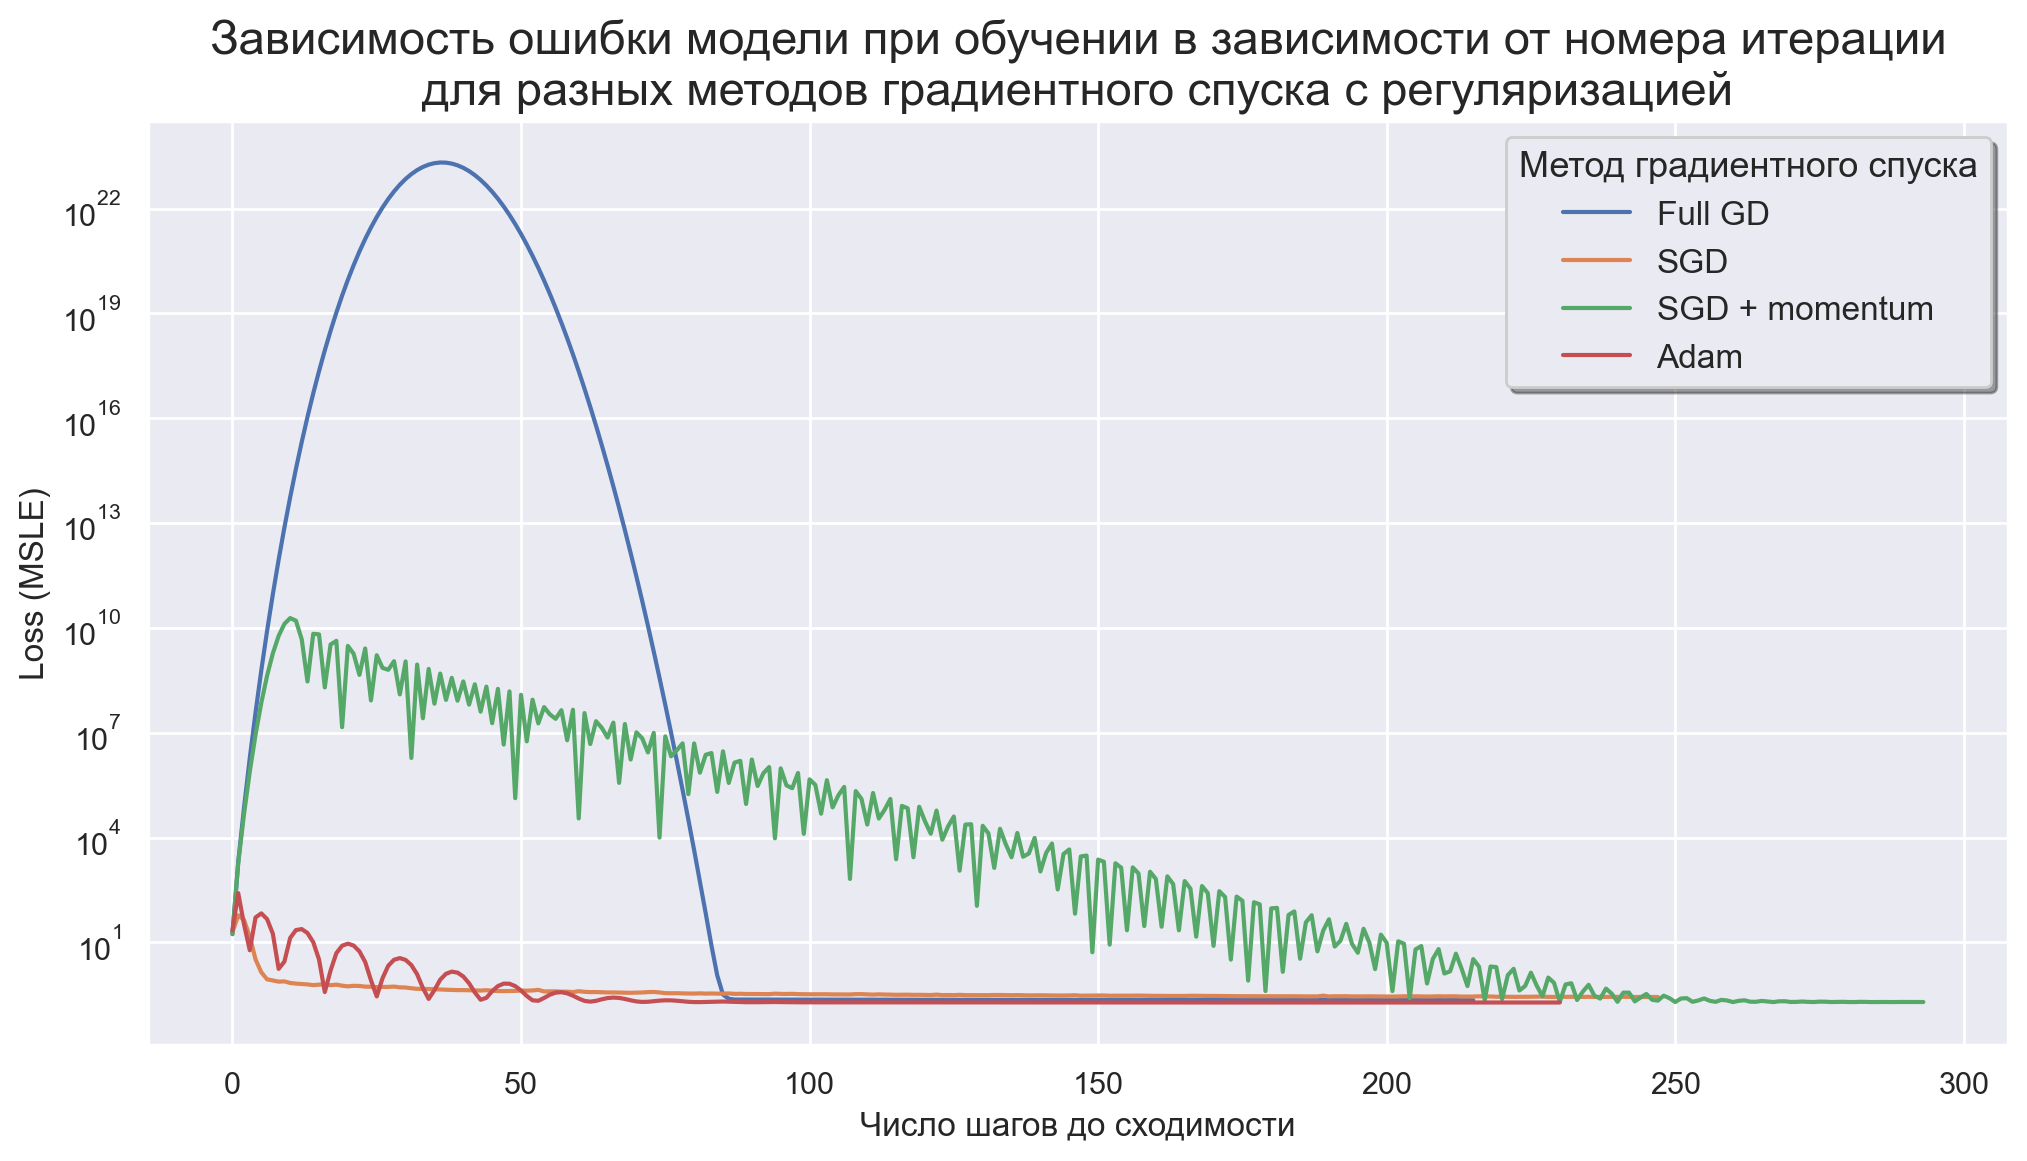

In [426]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска с регуляризацией', fontsize=17)

plt.plot(best_lambda_full_loss_reg)
plt.plot(best_lambda_stochastic_loss_reg)
plt.plot(best_lambda_momentum_loss_reg)
plt.plot(best_lambda_adam_loss_reg)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['Full GD', 'SGD', 'SGD + momentum', 'Adam'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

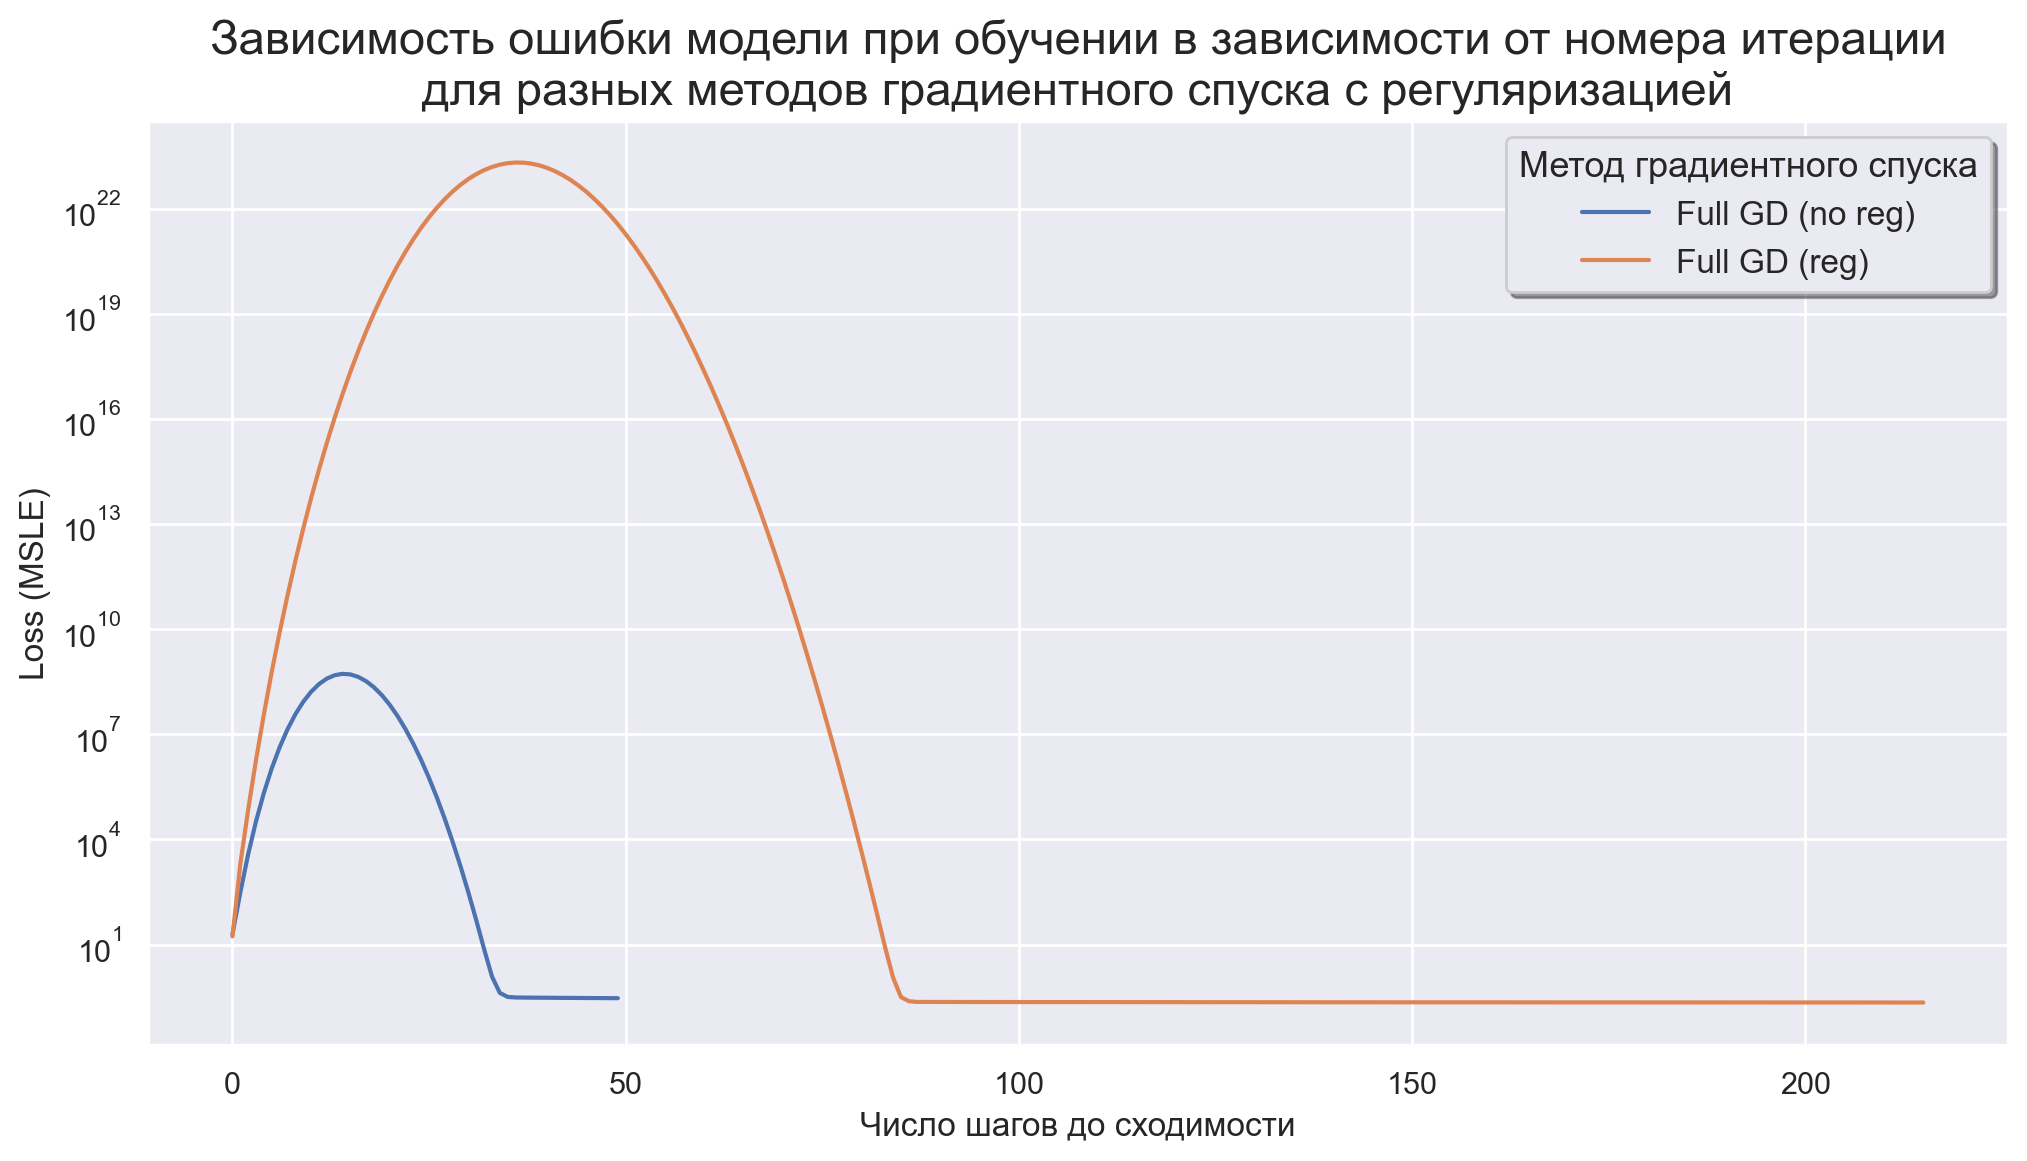

In [428]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска с регуляризацией', fontsize=17)

plt.plot(best_lambda_full_loss)
plt.plot(best_lambda_full_loss_reg)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['Full GD (no reg)', 'Full GD (reg)'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

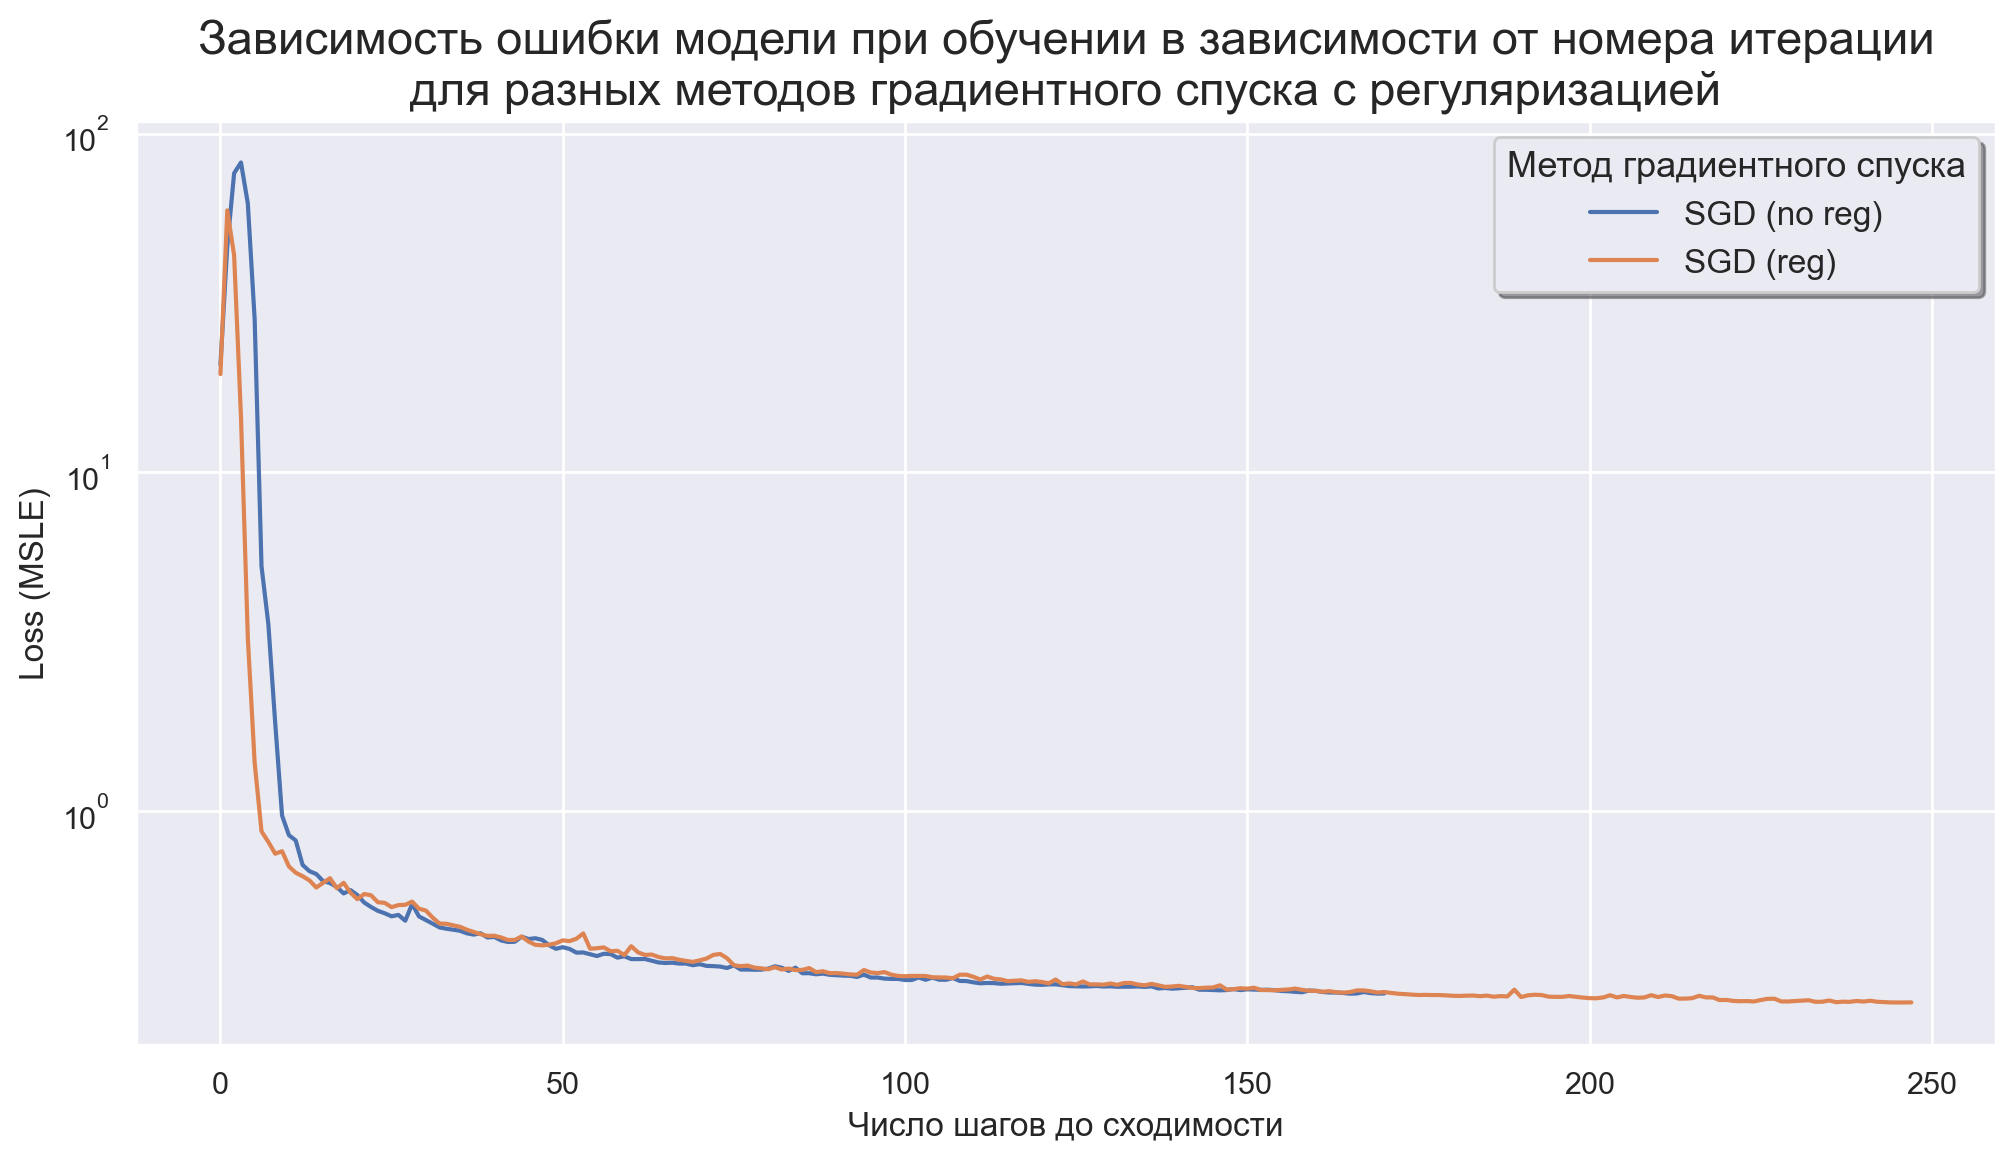

In [230]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска с регуляризацией', fontsize=17)

plt.plot(best_lambda_stochastic_loss)
plt.plot(best_lambda_stochastic_loss_reg)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['SGD (no reg)', 'SGD (reg)'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

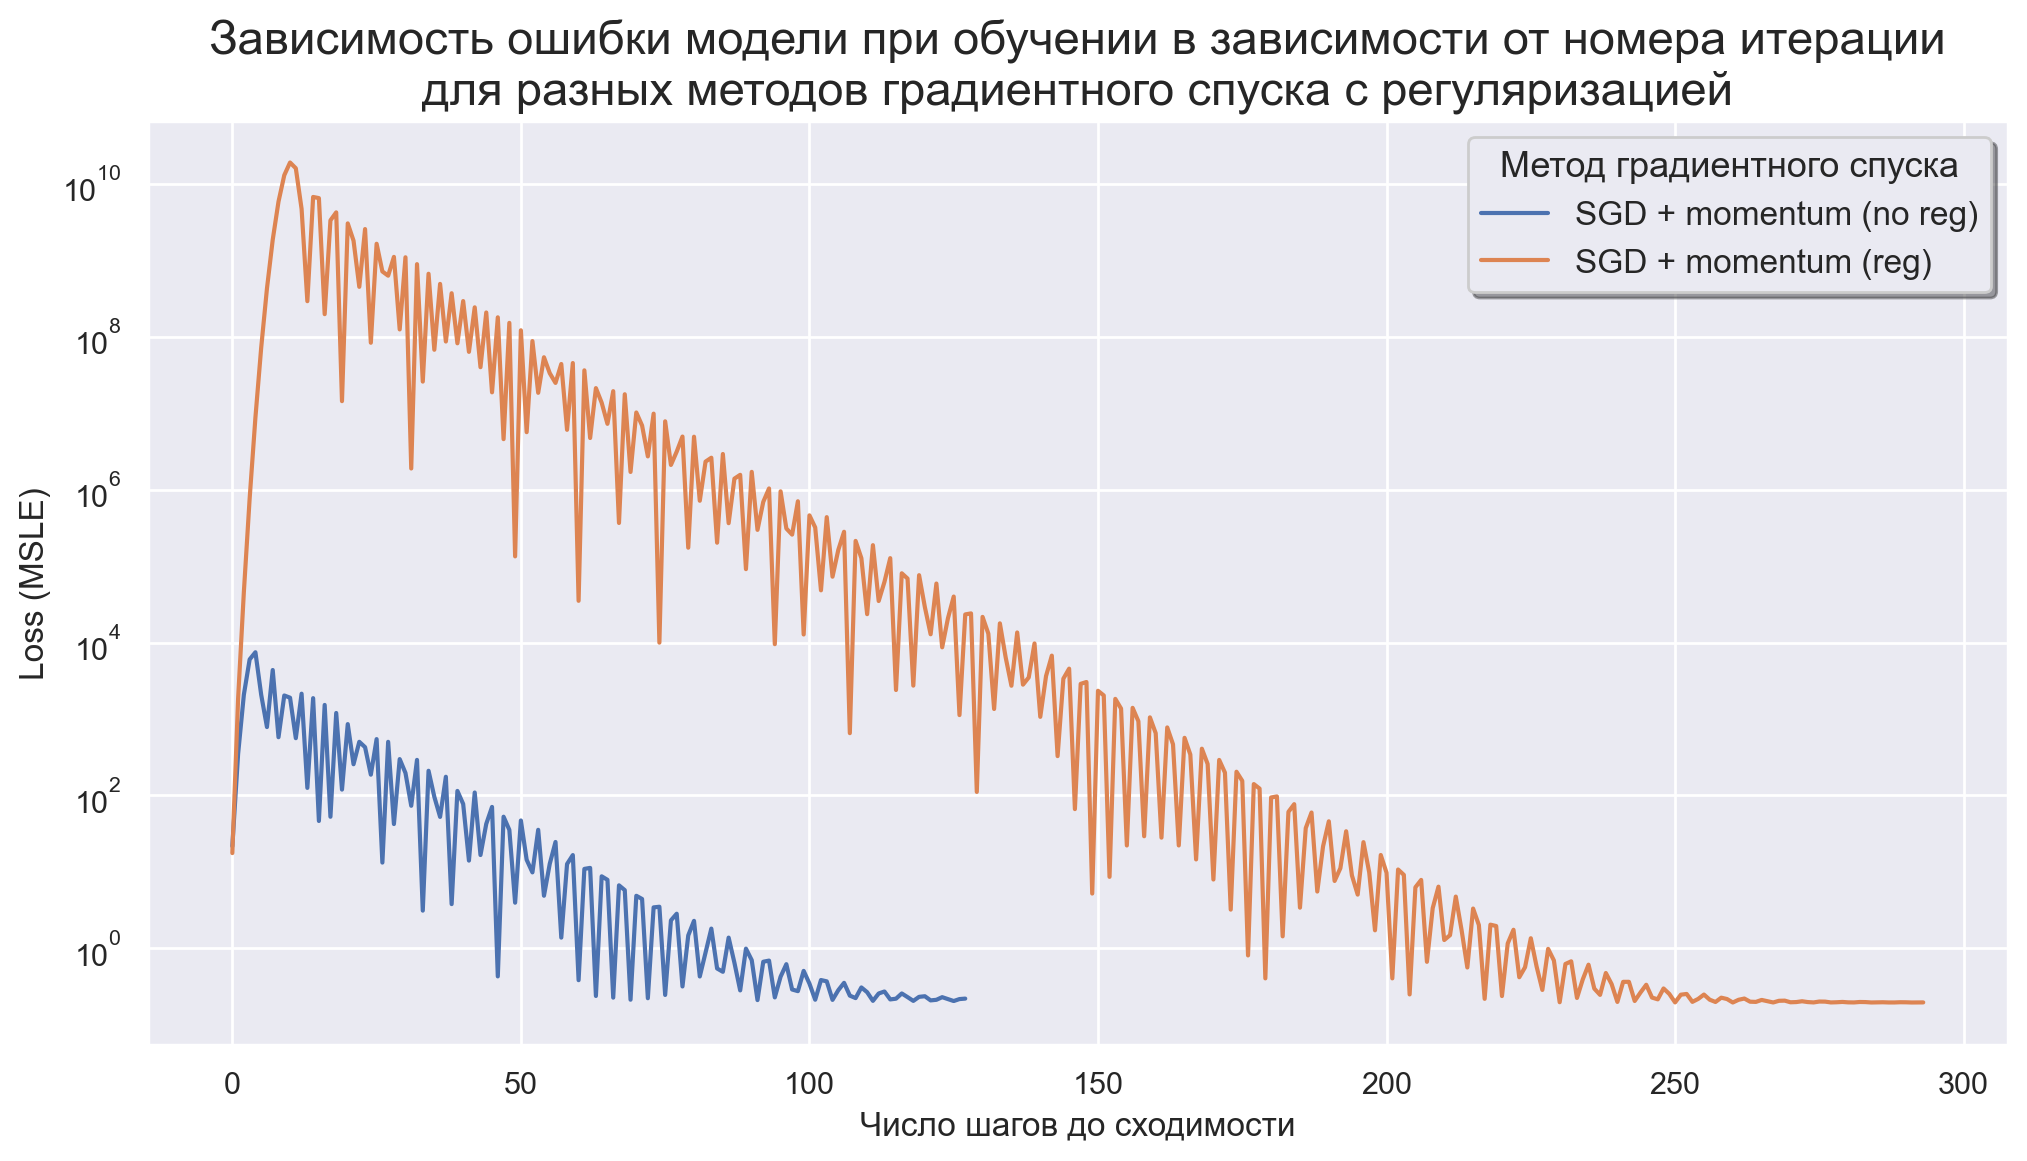

In [231]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска с регуляризацией', fontsize=17)

plt.plot(best_lambda_momentum_loss)
plt.plot(best_lambda_momentum_loss_reg)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['SGD + momentum (no reg)', 'SGD + momentum (reg)'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

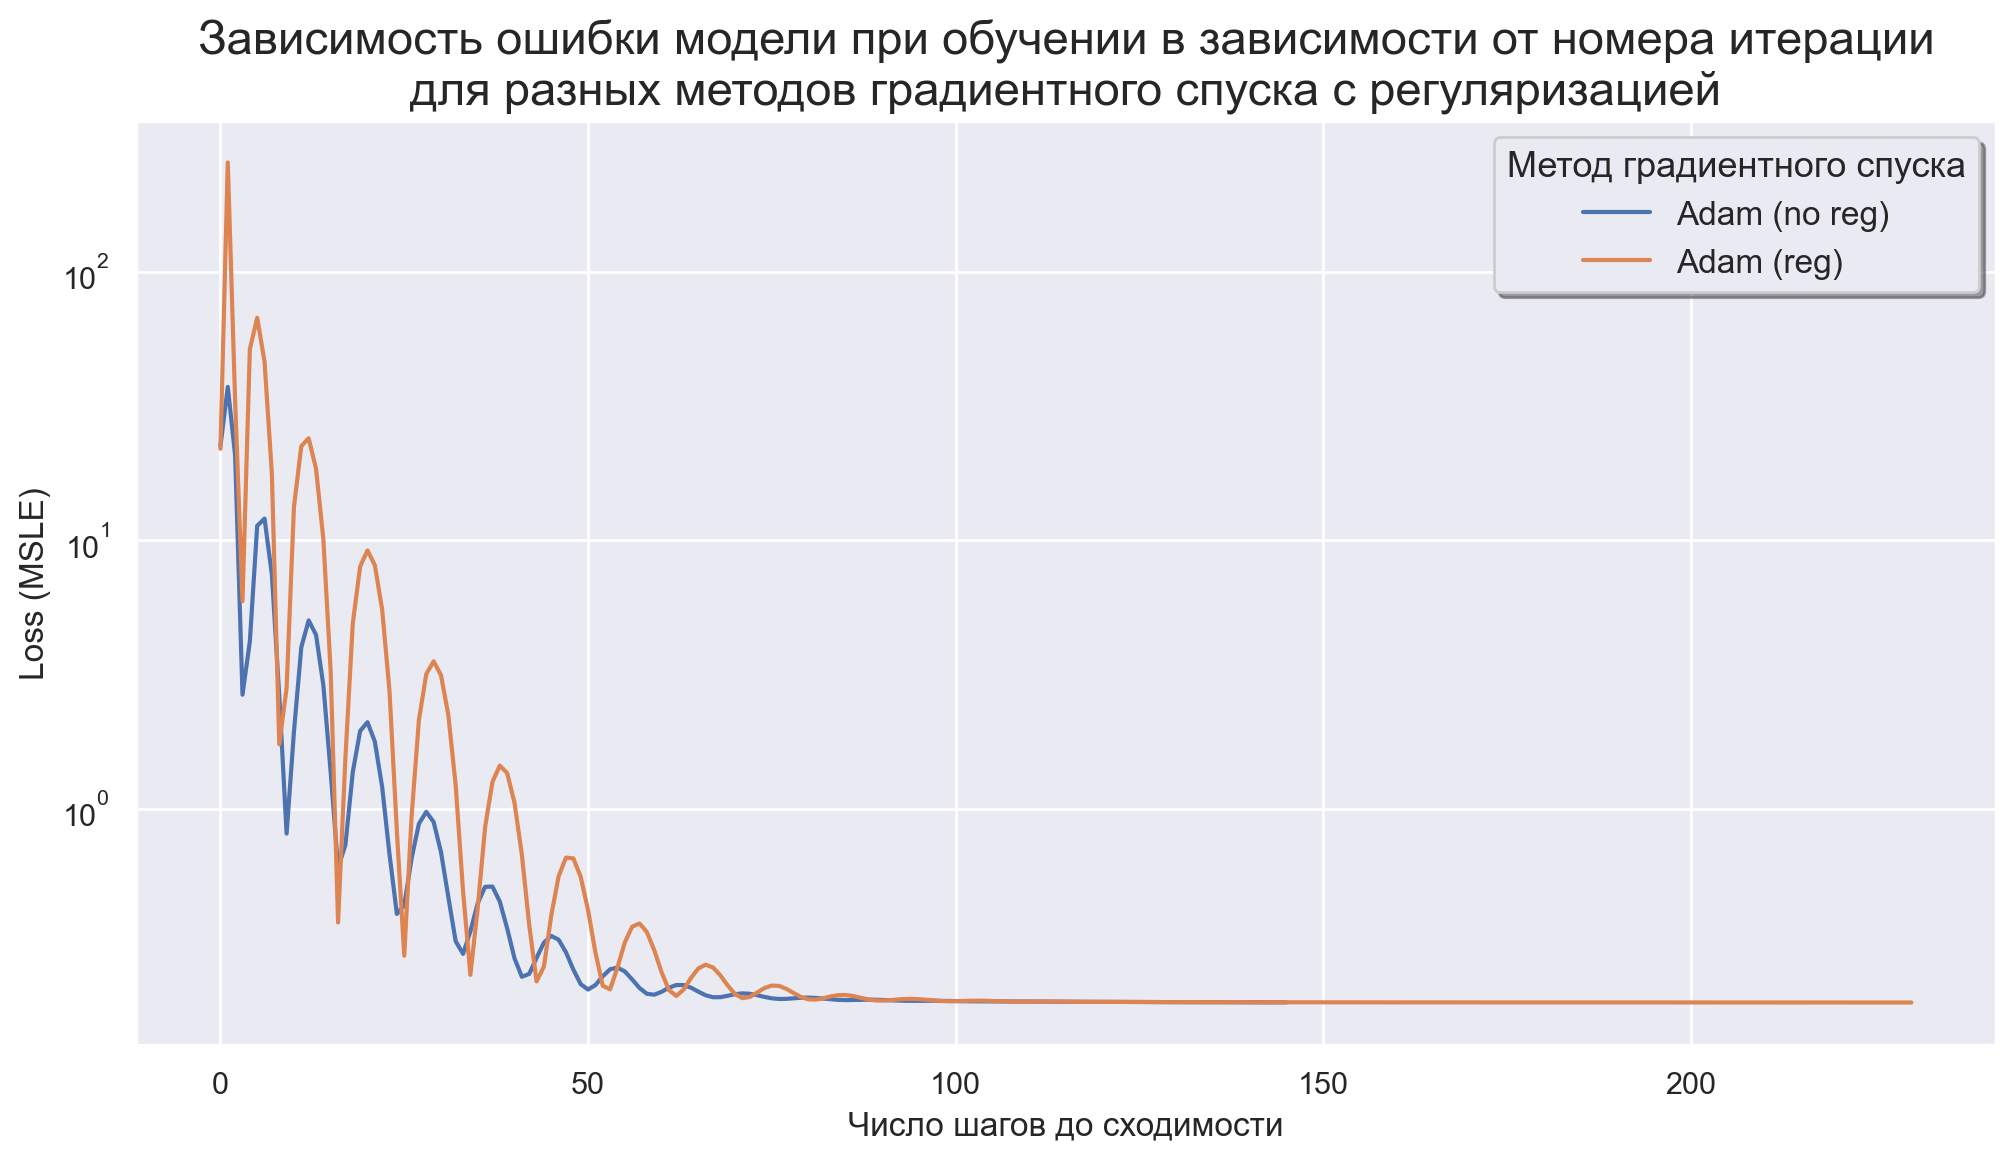

In [232]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении в зависимости от номера итерации\nдля разных методов градиентного спуска с регуляризацией', fontsize=17)

plt.plot(best_lambda_adam_loss)
plt.plot(best_lambda_adam_loss_reg)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (MSLE)')
plt.legend(title='Метод градиентного спуска', labels=['Adam (no reg)', 'Adam (reg)'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

*Еще раз посмотрим на лучшие модели с регуляризацией и без:*

In [233]:
descent_df_reg

name    lambda        mu  loss_test   r2_test  loss_train  r2_train  \
0        full  1.623777  0.015283   0.547665  0.698618    0.471387  0.775804   
1  stochastic  0.428133  0.029764   0.590273  0.652900    0.522247  0.726751   
2    momentum  1.623777  0.002069   0.520935  0.739271    0.442201  0.810781   
3        adam  3.162278  0.000038   0.516180  0.746620    0.435517  0.817914   

   n_iters  
0      216  
1      248  
2      294  
3      231

In [234]:
descent_df

name    lambda  loss_test   r2_test  loss_train  r2_train  n_iters
0        full  0.833782   0.615590  0.622064    0.543194  0.704458       50
1  stochastic  0.428133   0.609448  0.657743    0.538368  0.733583      171
2    momentum  0.833782   0.548546  0.710450    0.468240  0.787031      128
3        adam  1.623777   0.516442  0.744931    0.435799  0.816650      146

Как можно заметить, регуляризованные модели во всех случаях оказались **не хуже** аналогичных моделей без регуляризации на тестовой выборке. Заметные улучшения на тесте заметны для полного градиентного спуска и SGD с моментумом (прирост на 0.08 и 0.03 в терминах $R^2$ соответственно). Для обычного SGD наблюдается незначительное снижение качества, для Adam-а - незначительное повышение.

Что касается самого процесса обучения, то везде он занял большее число итераций (для полного ГС сразу в 4 раза больше). Обучение для всех моделей занимало не менее 200 итераций (без регуляризации все модели обучились менее, чем за 200 итераций).

Также на графиках заметно, что обучение всех моделей проходило "сложнее". У всех моделей, кроме SGD, ошибка в начале росла гораздо сильнее, а спуск к оптимуму был дольше. В целом, можно сказать, что на процесс обучения (саму динамику) регуляризация значимо не повлияла только для SGD.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

т.к. $(\log(\cosh(f(x))))' = \tanh(f(x)) \cdot f'(x)$,

$$
Q(w) = \dfrac{1}{\ell} \sum \log\left(\cosh(a - y)\right)
$$

$$
    \nabla Q(w) = \dfrac{1}{\ell} \tanh(Xw - y)^TX
$$

Иточники:
* https://www.youtube.com/watch?v=mgUAl6rDO9Q 
* https://openreview.net/pdf?id=rkglvsC9Ym

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [108]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

In [109]:
# зададим размерность
dimension = X_train.shape[1]

# определим лямбды
lambdas = np.logspace(-5, 0.5, 20)
lambdas

array([1.00000000e-05, 1.94748304e-05, 3.79269019e-05, 7.38619982e-05,
       1.43844989e-04, 2.80135676e-04, 5.45559478e-04, 1.06246783e-03,
       2.06913808e-03, 4.02961132e-03, 7.84759970e-03, 1.52830673e-02,
       2.97635144e-02, 5.79639395e-02, 1.12883789e-01, 2.19839265e-01,
       4.28133240e-01, 8.33782223e-01, 1.62377674e+00, 3.16227766e+00])

In [111]:
# задаем параметры и словари-контейнеры
descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'lambda_' : 'some lambda',
        'loss_function' : LossFunction.LogCosh  # меняем лосс
    }
}

iters_loss_history_log_cosh = {
    'full' : [], 
    'stochastic' : [], 
    'momentum' : [], 
    'adam' : []
}

r2_scores_log_cosh = {
    'full' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'stochastic' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'momentum' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'adam' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }
}

log_cosh_loss = {
    'full' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'stochastic' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'momentum' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }, 
    'adam' : {
        'train' : [],
        'test'  : [],
        'val'   : []
    }
}

In [112]:
# реализуем перебор

np.random.seed(13)

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name                # перебираем методы спуска
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_            # перебираем гиперпараметры
        regression = LinearRegression(
            descent_config=descent_config                        # подставляем гиперпараметры
        )
        
        # обучаем модель и считаем предсказанные значения
        regression.fit(X_train, y_train)
        y_pred_train = regression.predict(X_train)
        y_pred_val = regression.predict(X_val)
        y_pred_test = regression.predict(X_test)

        # логируем ошибку
        log_cosh_loss[descent_name]['train'].append(np.sum(np.log(np.cosh(y_pred_train - y_train))) / y_train.shape[0])
        log_cosh_loss[descent_name]['val'].append(np.sum(np.log(np.cosh(y_pred_val - y_val))) / y_val.shape[0])
        log_cosh_loss[descent_name]['test'].append(np.sum(np.log(np.cosh(y_pred_test - y_test))) / y_test.shape[0])

        # логируем метрику
        r2_scores_log_cosh[descent_name]['train'].append(r2_score(y_pred_train, y_train))
        r2_scores_log_cosh[descent_name]['val'].append(r2_score(y_pred_val, y_val))
        r2_scores_log_cosh[descent_name]['test'].append(r2_score(y_pred_test, y_test))

        # логируем историю лосса
        iters_loss_history_log_cosh[descent_name].append(regression.loss_history)

In [116]:
# найдем индексы лучших значений lambda
best_lambda_idx_full_log_cosh = np.argmin(np.array(log_cosh_loss['full']['val']))
best_lambda_idx_stochastic_log_cosh = np.argmin(np.array(log_cosh_loss['stochastic']['val']))
best_lambda_idx_momentum_log_cosh = np.argmin(np.array(log_cosh_loss['momentum']['val']))
best_lambda_idx_adam_log_cosh = np.argmin(np.array(log_cosh_loss['adam']['val']))

# сохраним историю лосса для них
best_lambda_full_loss_log_cosh = iters_loss_history_log_cosh['full'][best_lambda_idx_full_log_cosh]
best_lambda_stochastic_loss_log_cosh = iters_loss_history_log_cosh['stochastic'][best_lambda_idx_stochastic_log_cosh]
best_lambda_momentum_loss_log_cosh = iters_loss_history_log_cosh['momentum'][best_lambda_idx_momentum_log_cosh]
best_lambda_adam_loss_log_cosh = iters_loss_history_log_cosh['adam'][best_lambda_idx_adam_log_cosh]

# объединим в табличку
descent_data_log_cosh = {
    'name': ['full', 'stochastic', 'momentum', 'adam'], 
    'lambda': [lambdas[best_lambda_idx_full_log_cosh], 
               lambdas[best_lambda_idx_stochastic_log_cosh], 
               lambdas[best_lambda_idx_momentum_log_cosh], 
               lambdas[best_lambda_idx_adam_log_cosh]],
    'loss_test' : [log_cosh_loss['full']['test'][best_lambda_idx_full_log_cosh], 
                   log_cosh_loss['stochastic']['test'][best_lambda_idx_stochastic_log_cosh], 
                   log_cosh_loss['momentum']['test'][best_lambda_idx_momentum_log_cosh], 
                   log_cosh_loss['adam']['test'][best_lambda_idx_adam_log_cosh]],
    'r2_test' : [r2_scores_log_cosh['full']['test'][best_lambda_idx_full_log_cosh], 
                 r2_scores_log_cosh['stochastic']['test'][best_lambda_idx_stochastic_log_cosh],
                 r2_scores_log_cosh['momentum']['test'][best_lambda_idx_momentum_log_cosh],
                 r2_scores_log_cosh['adam']['test'][best_lambda_idx_adam_log_cosh]],
    'loss_train' : [log_cosh_loss['full']['train'][best_lambda_idx_full_log_cosh], 
                   log_cosh_loss['stochastic']['train'][best_lambda_idx_stochastic_log_cosh], 
                   log_cosh_loss['momentum']['train'][best_lambda_idx_momentum_log_cosh], 
                   log_cosh_loss['adam']['train'][best_lambda_idx_adam_log_cosh]],
    'r2_train' : [r2_scores_log_cosh['full']['train'][best_lambda_idx_full_log_cosh], 
                 r2_scores_log_cosh['stochastic']['train'][best_lambda_idx_stochastic_log_cosh],
                 r2_scores_log_cosh['momentum']['train'][best_lambda_idx_momentum_log_cosh],
                 r2_scores_log_cosh['adam']['train'][best_lambda_idx_adam_log_cosh]],
    'n_iters' : [len(best_lambda_full_loss_log_cosh),
                 len(best_lambda_stochastic_loss_log_cosh),
                 len(best_lambda_momentum_loss_log_cosh),
                 len(best_lambda_adam_loss_log_cosh)]
    }

descent_df_log_cosh = pd.DataFrame.from_dict(descent_data_log_cosh)

Посмотрим на график обучения:

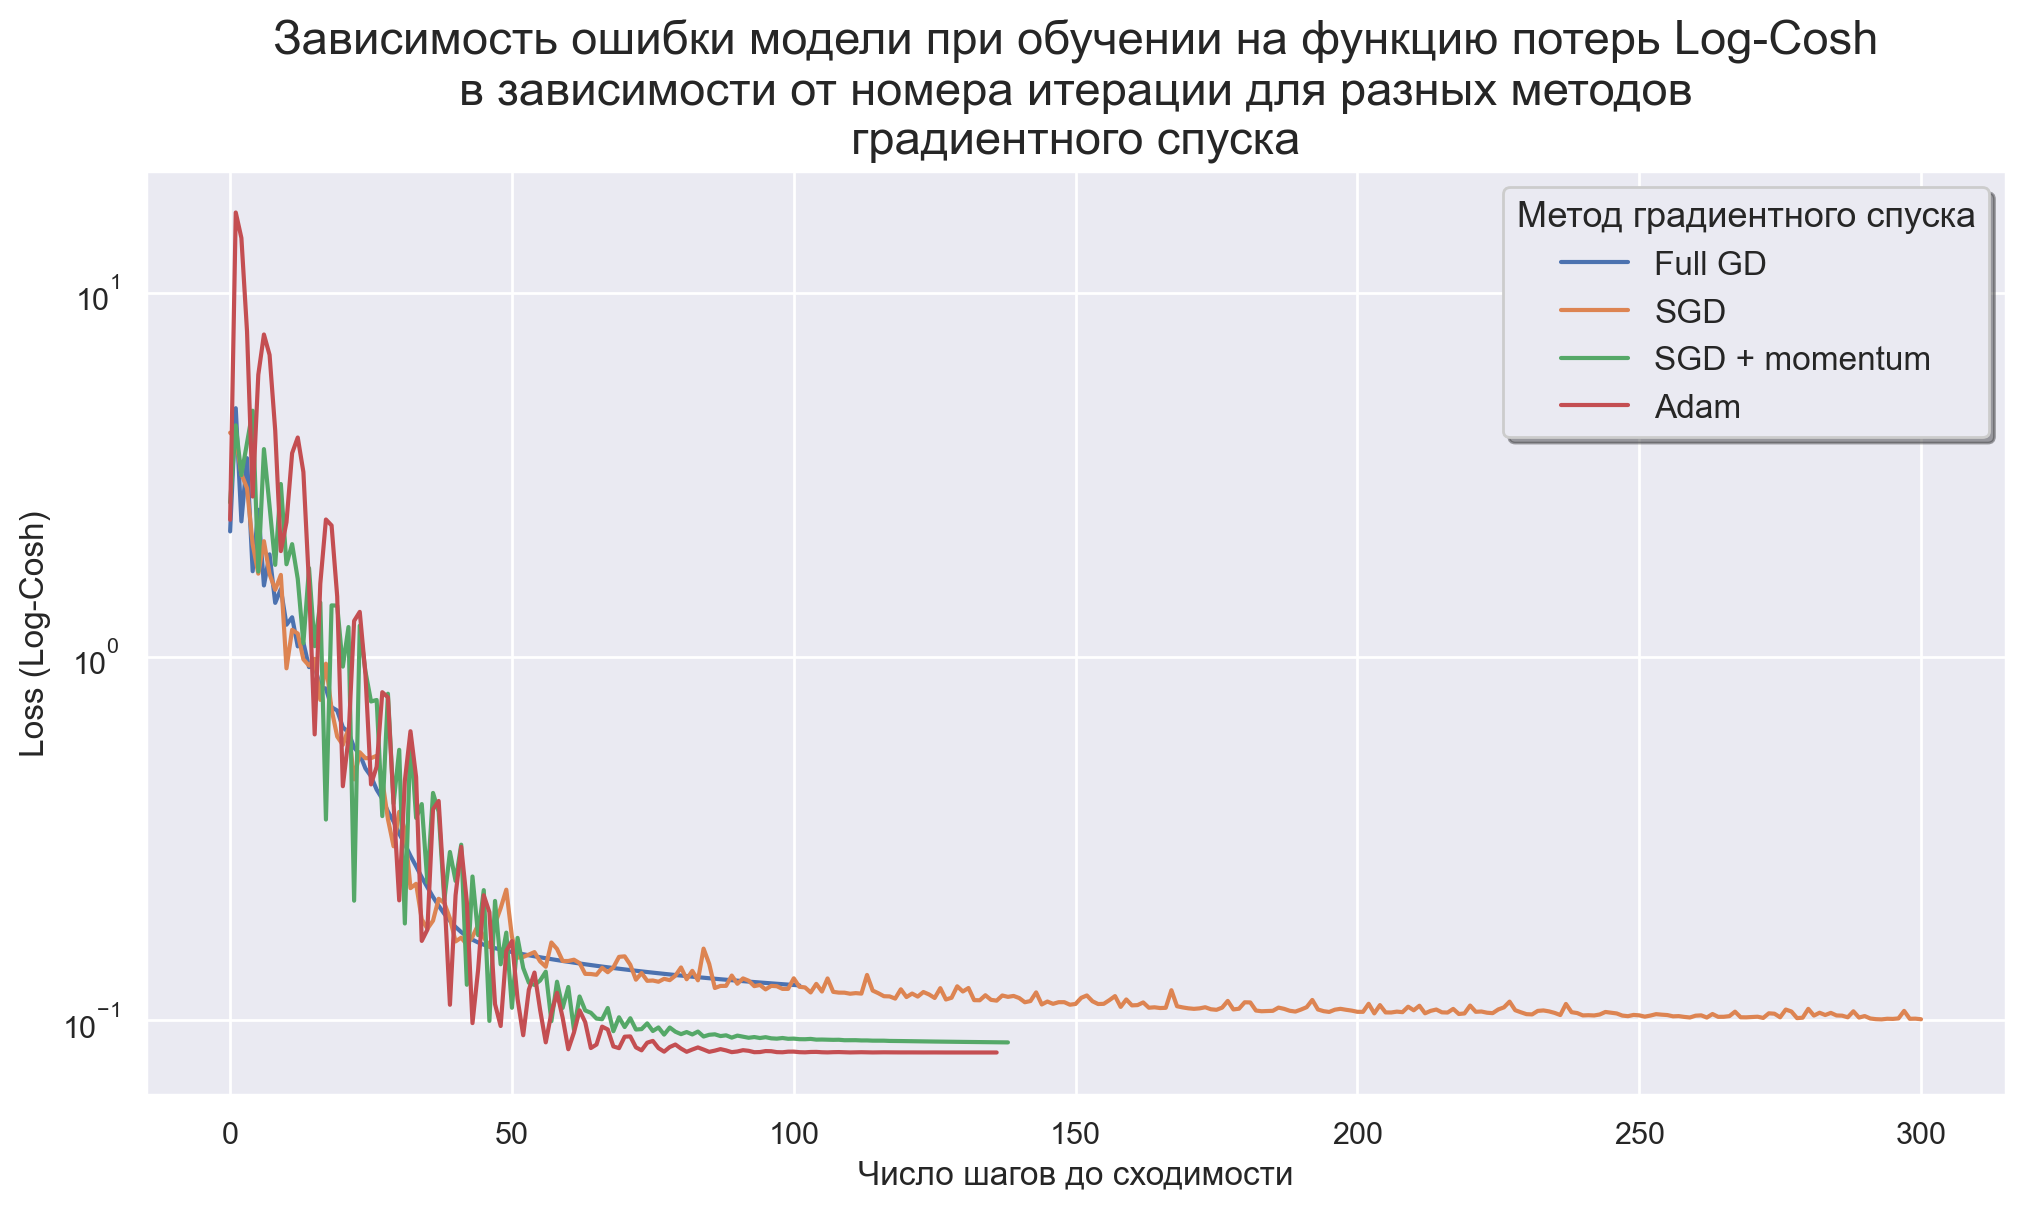

In [117]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Зависимость ошибки модели при обучении на функцию потерь Log-Cosh\nв зависимости от номера итерации для разных методов\nградиентного спуска', fontsize=17)

plt.plot(best_lambda_full_loss_log_cosh)
plt.plot(best_lambda_stochastic_loss_log_cosh)
plt.plot(best_lambda_momentum_loss_log_cosh)
plt.plot(best_lambda_adam_loss_log_cosh)

plt.yscale('log')
plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (Log-Cosh)')
plt.legend(title='Метод градиентного спуска', labels=['Full GD', 'SGD', 'SGD + momentum', 'Adam'], title_fontsize=13, fontsize=12, ncol=1, loc='best', shadow=True);

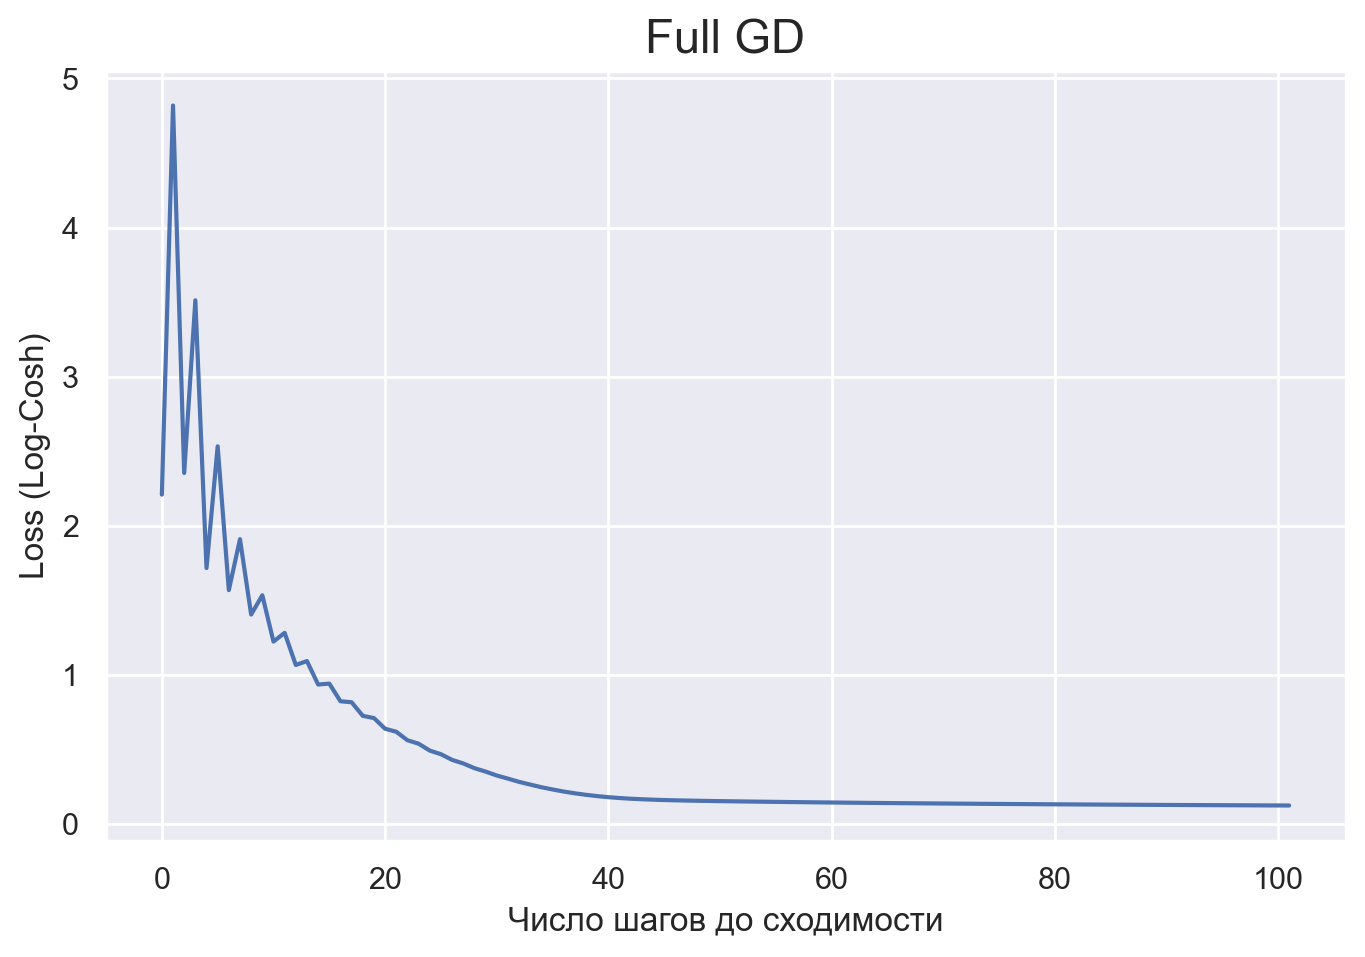

In [122]:
plt.title('Full GD', fontsize=17)

plt.plot(best_lambda_full_loss_log_cosh)

plt.xlabel('Число шагов до сходимости')
plt.ylabel('Loss (Log-Cosh)');

In [614]:
descent_df_reg

name    lambda        mu  loss_test   r2_test  loss_train  r2_train  \
0        full  1.623777  0.015283   0.547665  0.698618    0.471387  0.775804   
1  stochastic  0.428133  0.029764   0.590273  0.652900    0.522247  0.726751   
2    momentum  1.623777  0.002069   0.520935  0.739271    0.442201  0.810781   
3        adam  3.162278  0.000038   0.516180  0.746620    0.435517  0.817914   

   n_iters  
0      216  
1      248  
2      294  
3      231

In [615]:
descent_df

name    lambda  loss_test   r2_test  loss_train  r2_train  n_iters
0        full  0.833782   0.615590  0.622064    0.543194  0.704458       50
1  stochastic  0.428133   0.609448  0.657743    0.538368  0.733583      171
2    momentum  0.833782   0.548546  0.710450    0.468240  0.787031      128
3        adam  1.623777   0.516442  0.744931    0.435799  0.816650      146

In [115]:
descent_df_log_cosh

name    lambda  loss_test   r2_test  loss_train  r2_train  n_iters
0        full  3.162278   0.136527  0.628364    0.124821  0.705003      102
1  stochastic  3.162278   0.112293  0.696705    0.100749  0.771170      301
2    momentum  3.162278   0.098366  0.733744    0.087008  0.805429      139
3        adam  3.162278   0.093217  0.746544    0.081626  0.817657      137

Траектория обучения регрессии на **Log-Cosh** примерно такая же, как и на MSE, но более "дерганая" При этом интересно, что во время обучения даже на полном ГС лосс периодически "шатало", раньше он был плавным.

Видно, что Log-Cosh устойчивая ф.п.: даже при рандомной инициализации значения лосса не такие большие. Вероятно, функционал довольно сложный, либо изначально взят слишком большой lr.

В сравнении с регуляризованной MSE-моделью, при обучении на Log-Cosh на тесте по метрике $R^2$ получились лучше результаты для обычного SGD (но обучение шло дольше и не достигло критерия останова), а также такие же для Adam-а.

В сравнении с обычной MSE-моделью, при обучении на Log-Cosh на тесте результаты получились лучше для всех методов ГС, однако обучение заняло больше итераций (но меньше времени). Вероятно, этому способствовал тот факт, что Log-Cosh является робастной ф.п.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Мы с папой очень любим кофе - поэтому я решил сварить ему вкусный кофе из новой пачки Кении (мытой обработки зерна) и приготовить вафли с мороженым.

**Рецепт**: растереть 200 гр. сливочного масла со 100 гр. сахара, добавить 1 стакан молока и 3 яйца. Все перемешать, вымесить тесто, разогреть вафельницу и выпекать.

**Фотоотчет**:

<img src="https://www.dropbox.com/s/j5ibulgje8h95u8/20221123_221755.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/hmb7y4gqkc03qxa/20221123_221802.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/oolj7h8taf41p7c/20221124_212433.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/u2tnb8fwpcjxztp/20221124_213049.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/x58t7erou159ydf/20221124_213055.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/ltulywk2xgzd3h6/20221124_213139.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">
<img src="https://www.dropbox.com/s/b69oa0pa0olpzjf/20221124_213158.jpg?dl=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

Папе очень понравился кофе, ведь это редкий микролот с высокой оценкой! Кения получилась прекрасной - такой, какая должна быть - яркая, ягодно-кислая.

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [300]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [301]:
# YOUR CODE: